In [1]:
import loica as lc
import flapjack as fj
import matplotlib.pyplot as plt
import numpy as np
import getpass
from itertools import permutations 
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks

In [2]:
user = input()
passwd = getpass.getpass()
#flap = fj.flapjack.Flapjack('localhost:8000')
#flap = fj.flapjack.Flapjack('flapjack.rudge-lab.org:8000')
flap = fj.flapjack.Flapjack('flapjack.rudge-lab.org:8000')
flap.log_in(username=user, password=passwd)

In [3]:
study = flap.create('study', name='Repressilator behavior', description='Behavior of repressilator with different genetic circuits designs')
media = flap.create('media', name='M9Glucose', description='induction')
strain = flap.get('strain', name='E.coli T7')
strain = flap.create('strain', name='E.coli T7', description='E.coli T7')    
gfps = flap.create('signal', name='GFP', color='green', description='fluorescent')
biomass_signal = flap.create('signal', name='OD', color='black', description='biomass')

## Regulators

from https://www.embopress.org/doi/full/10.15252/msb.20199401 

In [10]:
#Regulators
amer = lc.Regulator(name='AmeR', degradation_rate=1)
lmera = lc.Regulator(name='LmerA', degradation_rate=1)
amtr = lc.Regulator(name='AmtR', degradation_rate=1)
hlyllr = lc.Regulator(name='HlyllR', degradation_rate=1)
phif = lc.Regulator(name='PhiF', degradation_rate=1)
srpr = lc.Regulator(name='SrpR', degradation_rate=1)
beti = lc.Regulator(name='BetI', degradation_rate=1)
bm3r1 = lc.Regulator(name='BM3R1', degradation_rate=1)
cymr = lc.Regulator(name='CymR', degradation_rate=1)
vanr = lc.Regulator(name='VanR', degradation_rate=1)

In [11]:
NOT_F1_AmeR = ([amer, 4.276875167, 0.289281104, 0.121548379, 1.542139516])
NOT_F2_AmeR = ([amer, 3.468235830, 0.206243141, 0.034613400, 1.314222122])
NOT_N1_LmrA = ([lmera, 1.188165807, 0.077273193, 0.093521178, 1.754564179])
NOT_A1_AmtR = ([amtr, 3.101389402, 0.035221608, 0.047427884, 1.656171138])
NOT_H1_HlyIIR = ([hlyllr, 2.051723191, 0.004353486, 0.130693758, 2.588160165])
NOT_P1_PhlF = ([phif, 6.869075907, 0.004337295, 0.042126721, 3.804263913])
NOT_P2_PhlF = ([phif, 7.480185697, 0.006679767, 0.203849960, 4.481560106])
NOT_P3_PhlF = ([phif, 7.083442096, 0.004656815, 0.116044457, 3.342819362])
NOT_S1_SrpR = ([srpr, 1.365149567, 0.001354520, 0.016906016, 3.095316853])
NOT_S2_SrpR = ([srpr, 3.165616099, 0.002829301, 0.062531512, 2.655303675])
NOT_S3_SrpR = ([srpr, 3.051477031, 0.004054680, 0.087385601, 2.657349101])
NOT_S4_SrpR = ([srpr, 3.161638671, 0.004347046, 0.110327837, 2.654076554])
NOT_E1_BetI = ([beti, 2.797014815, 0.040842627, 0.277844523, 2.880416695])
NOT_B1_BM3R1 = ([bm3r1, 0.574084351, 0.003721745, 0.055519757, 2.888263374])
NOT_B2_BM3R1 = ([bm3r1, 0.480763613, 0.005549518, 0.574115383, 3.842787839])
NOT_B3_BM3R1 = ([bm3r1, 0.579800495, 0.004958926, 0.211950504, 3.085977286])
NOT_C1_CymR = ([cymr, 2.994385285, 0.009785490, 0.100908709, 3.693304378])
NOT_V1_VanR = ([vanr, 6.130938128, 0.043503414, 0.049692514, 2.984652678])

In [13]:
perms = []
perm = permutations([NOT_F1_AmeR, 
                     NOT_F2_AmeR, 
                     NOT_N1_LmrA,
                     NOT_A1_AmtR,
                     NOT_H1_HlyIIR,
                     NOT_P1_PhlF,
                     NOT_P2_PhlF,
                     NOT_P3_PhlF,
                     NOT_S1_SrpR,
                     NOT_S2_SrpR,
                     NOT_S3_SrpR,
                     NOT_S4_SrpR,
                     NOT_E1_BetI,
                     NOT_B1_BM3R1,
                     NOT_B2_BM3R1,
                     NOT_B3_BM3R1,
                     NOT_C1_CymR,
                     NOT_V1_VanR],3)  #with a larger list then we can do ([NOT_1, NOT_2, NOT_3],3)
for i in list(perm):  
    perms.append(i) 

In [17]:
len(perms)

4896

In [8]:
perms = []
perm = permutations([NOT_F1_AmeR, 
                     NOT_P2_PhlF,
                     NOT_S1_SrpR,
                     NOT_S2_SrpR,
                    ],3)  #with a larger list then we can do ([NOT_1, NOT_2, NOT_3],3)
for i in list(perm):  
    perms.append(i) 

In [4]:
#test
perms = permutations([NOT_F1_AmeR, 
                     NOT_P2_PhlF,
                     NOT_S1_SrpR,
                    ],3)  #with a larger list then we can do ([NOT_1, NOT_2, NOT_3],3)

In [14]:
#Create the main df that will contain all the generated data
columns = {'Measurement':[], 'Sample':[], 'Signal':[], 'Signal_id':[], 'Time':[]}
repgen_df = pd.DataFrame(columns)

#build reporters
cfp_rep = lc.Reporter(name='CFP', degradation_rate=1, signal_id=0, color='cyan')
gfp_rep = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0, color='green')
rfp_rep = lc.Reporter(name='RFP', degradation_rate=1, signal_id=0, color='red')

def growth_rate(t):
    return lc.gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 4)

functional_reps = []

for op in perms:
  #GNC
    rep = lc.GeneticNetwork(vector=0) #add a propoer and identifiable name
    rep.add_regulator([op[0][0],op[1][0], op[2][0]]) #add regulators
    rep.add_reporter([cfp_rep, gfp_rep, rfp_rep]) 
    #build dynamics NOTs, 1000 times to do MEFL
    rep.add_operator([
                        lc.Hill1(name='NOT1', input=op[0][0], output=[op[1][0], cfp_rep], alpha=[op[0][1],op[0][2]], K=op[0][3], n=op[0][4]),
                        lc.Hill1(name='NOT2', input=op[1][0], output=[op[2][0], gfp_rep], alpha=[op[1][1],op[1][2]], K=op[1][3], n=op[1][4]),
                        lc.Hill1(name='NOT3', input=op[2][0], output=[op[0][0], rfp_rep], alpha=[op[2][1],op[2][2]], K=op[2][3], n=op[2][4])
                        ])
    
    #AS
    metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

    sample = lc.Sample(genetic_network=rep, 
                    metabolism=metab,
                    media=0,
                    strain=0
                )
    assay = lc.Assay([sample], 
                n_measurements=100, 
                interval=0.25,
                name=f'Loica repressilator rg_{op[0][0]}_{op[1][0]}_{op[2][0]}',
                description=f'Simulated repressilator generated by loica rg_{op[0][0]}_{op[1][0]}_{op[2][0]}',
                biomass_signal_id=0
                )
    assay.run()
    #assay.upload(flap, study.id[0])
    m = assay.measurements
    assay.measurements['Sample'] = f'rg_{op[0][0]}_{op[1][0]}_{op[2][0]}'
    peaks_cfp, _ = find_peaks(m[m.Signal=='CFP']['Measurement'].to_numpy(), height=0)
    peaks_gfp, _ = find_peaks(m[m.Signal=='GFP']['Measurement'].to_numpy(), height=0)
    peaks_rfp, _ = find_peaks(m[m.Signal=='RFP']['Measurement'].to_numpy(), height=0)
    assay.measurements['cfp_peaks'] = len(peaks_cfp)
    assay.measurements['gfp_peaks'] = len(peaks_gfp)
    assay.measurements['rfp_peaks'] = len(peaks_rfp)
    repgen_df = repgen_df.append(assay.measurements, ignore_index=True)
    '''
    plt.figure(figsize=(3,3), dpi=300)
    rep.draw()
    fig,ax = plt.subplots(1,1, figsize=(6,2.5), dpi=300)
    m[m.Signal=='CFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{op[0][0]}_{round(op[0][1],2)}', color='c')
    m[m.Signal=='GFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{op[1][0]}_{round(op[1][1],2)}', color='g')
    m[m.Signal=='RFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{op[2][0]}_{round(op[2][1],2)}', color='r')
    ax.set_xlabel("Time (h)", fontsize=12)
    ax.set_ylabel("Fluorescence (A.U.)", fontsize=12)
    plt.savefig(f'LOICARepressilator_{op[0][0]}_{op[1][0]}_{op[2][0]}.png', dpi=300)
    '''
    if len(peaks_cfp)> 2 or len(peaks_gfp)> 2 or len(peaks_rfp) > 2:
        print(f'Peaks found for {op[0][0]}_{op[1][0]}_{op[2][0]}')
        print(f'CFP: {len(peaks_cfp)}')
        print(f'GFP: {len(peaks_gfp)}')
        print(f'RFP: {len(peaks_rfp)}')
        functional_reps.append(rep)
    else:
        print(f'No peaks found for {op[0][0]}_{op[1][0]}_{op[2][0]}')

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100.0/100 [00:01<00:00, 96.14it/s]


No peaks found for AmeR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 113.35it/s]


No peaks found for AmeR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 120.53it/s]


No peaks found for AmeR_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 121.91it/s]


No peaks found for AmeR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.15it/s]


No peaks found for AmeR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.61it/s]


No peaks found for AmeR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.07it/s]


No peaks found for AmeR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.31it/s]


No peaks found for AmeR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.12it/s]


No peaks found for AmeR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.17it/s]


No peaks found for AmeR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.66it/s]


No peaks found for AmeR_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 116.22it/s]


No peaks found for AmeR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.06it/s]


No peaks found for AmeR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.52it/s]


No peaks found for AmeR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.79it/s]


No peaks found for AmeR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 121.60it/s]


No peaks found for AmeR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 120.58it/s]


No peaks found for AmeR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 121.95it/s]


No peaks found for AmeR_LmerA_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 122.80it/s]


No peaks found for AmeR_LmerA_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 121.61it/s]


No peaks found for AmeR_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.27it/s]


No peaks found for AmeR_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.52it/s]


No peaks found for AmeR_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.77it/s]


No peaks found for AmeR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.70it/s]


No peaks found for AmeR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.53it/s]


No peaks found for AmeR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.03it/s]


No peaks found for AmeR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.81it/s]


No peaks found for AmeR_LmerA_BetI


100%|██████████| 100.0/100 [00:00<00:00, 120.01it/s]


No peaks found for AmeR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.22it/s]


No peaks found for AmeR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.04it/s]


No peaks found for AmeR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.88it/s]


No peaks found for AmeR_LmerA_CymR


100%|██████████| 100.0/100 [00:00<00:00, 118.43it/s]


No peaks found for AmeR_LmerA_VanR


100%|██████████| 100.0/100 [00:00<00:00, 122.24it/s]


No peaks found for AmeR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.65it/s]


No peaks found for AmeR_AmtR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 121.50it/s]


No peaks found for AmeR_AmtR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 121.32it/s]


No peaks found for AmeR_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.10it/s]


No peaks found for AmeR_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.40it/s]


No peaks found for AmeR_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.57it/s]


No peaks found for AmeR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.29it/s]


No peaks found for AmeR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.84it/s]


No peaks found for AmeR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.99it/s]


No peaks found for AmeR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.73it/s]


No peaks found for AmeR_AmtR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 121.76it/s]


No peaks found for AmeR_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.92it/s]


No peaks found for AmeR_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.50it/s]


No peaks found for AmeR_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.26it/s]


No peaks found for AmeR_AmtR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 121.54it/s]


No peaks found for AmeR_AmtR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 120.14it/s]


No peaks found for AmeR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 122.41it/s]


No peaks found for AmeR_HlyllR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 114.80it/s]


No peaks found for AmeR_HlyllR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 117.86it/s]


Peaks found for AmeR_HlyllR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.34it/s]


No peaks found for AmeR_HlyllR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 121.17it/s]


No peaks found for AmeR_HlyllR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.30it/s]


Peaks found for AmeR_HlyllR_SrpR
CFP: 4
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.96it/s]


No peaks found for AmeR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.54it/s]


No peaks found for AmeR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.68it/s]


No peaks found for AmeR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.10it/s]


No peaks found for AmeR_HlyllR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 116.63it/s]


No peaks found for AmeR_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.60it/s]


No peaks found for AmeR_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.18it/s]


No peaks found for AmeR_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.30it/s]


No peaks found for AmeR_HlyllR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 117.38it/s]


Peaks found for AmeR_HlyllR_VanR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.40it/s]


No peaks found for AmeR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.91it/s]


No peaks found for AmeR_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 121.88it/s]


No peaks found for AmeR_PhiF_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 121.75it/s]


No peaks found for AmeR_PhiF_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 119.64it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 121.27it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.96it/s]


No peaks found for AmeR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.37it/s]


No peaks found for AmeR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.88it/s]


No peaks found for AmeR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.13it/s]


No peaks found for AmeR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.80it/s]


No peaks found for AmeR_PhiF_BetI


100%|██████████| 100.0/100 [00:00<00:00, 121.95it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.96it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.68it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.70it/s]


No peaks found for AmeR_PhiF_CymR


100%|██████████| 100.0/100 [00:00<00:00, 121.07it/s]


No peaks found for AmeR_PhiF_VanR


100%|██████████| 100.0/100 [00:00<00:00, 121.99it/s]


No peaks found for AmeR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 121.03it/s]


Peaks found for AmeR_PhiF_LmerA
CFP: 2
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 117.17it/s]


Peaks found for AmeR_PhiF_AmtR
CFP: 4
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.64it/s]


Peaks found for AmeR_PhiF_HlyllR
CFP: 4
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.18it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.60it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 121.23it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.86it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.24it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.08it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.48it/s]


Peaks found for AmeR_PhiF_BetI
CFP: 4
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.69it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.57it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.60it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.87it/s]


Peaks found for AmeR_PhiF_CymR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.26it/s]


Peaks found for AmeR_PhiF_VanR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.17it/s]


No peaks found for AmeR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.46it/s]


No peaks found for AmeR_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 121.92it/s]


Peaks found for AmeR_PhiF_AmtR
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 122.52it/s]


No peaks found for AmeR_PhiF_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 116.09it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 121.67it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.17it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.27it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 4
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.21it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 3
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 122.20it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 2
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.33it/s]


No peaks found for AmeR_PhiF_BetI


100%|██████████| 100.0/100 [00:00<00:00, 122.08it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.83it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.15it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.01it/s]


Peaks found for AmeR_PhiF_CymR
CFP: 4
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 123.94it/s]


Peaks found for AmeR_PhiF_VanR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.97it/s]


No peaks found for AmeR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.17it/s]


No peaks found for AmeR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 122.29it/s]


No peaks found for AmeR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 122.57it/s]


No peaks found for AmeR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 120.50it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 121.40it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.14it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.67it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.17it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.28it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.40it/s]


No peaks found for AmeR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 120.90it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.94it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.11it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.75it/s]


No peaks found for AmeR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 122.26it/s]


No peaks found for AmeR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 119.70it/s]


No peaks found for AmeR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.41it/s]


No peaks found for AmeR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 122.31it/s]


No peaks found for AmeR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 119.48it/s]


No peaks found for AmeR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 110.65it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.37it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 110.49it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.48it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.64it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.17it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.26it/s]


No peaks found for AmeR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 118.59it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.09it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.03it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.88it/s]


No peaks found for AmeR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 102.25it/s]


No peaks found for AmeR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 119.32it/s]


No peaks found for AmeR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.04it/s]


No peaks found for AmeR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 115.75it/s]


No peaks found for AmeR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 118.76it/s]


No peaks found for AmeR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 119.21it/s]


Peaks found for AmeR_SrpR_PhiF
CFP: 4
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.11it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.28it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.49it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.18it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.38it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.46it/s]


No peaks found for AmeR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 112.29it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.35it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.31it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.94it/s]


No peaks found for AmeR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 116.59it/s]


Peaks found for AmeR_SrpR_VanR
CFP: 1
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 113.90it/s]


No peaks found for AmeR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.11it/s]


No peaks found for AmeR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 118.31it/s]


No peaks found for AmeR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 115.11it/s]


No peaks found for AmeR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 102.00it/s]


Peaks found for AmeR_SrpR_PhiF
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.70it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.66it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.66it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.73it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.21it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.22it/s]


No peaks found for AmeR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 117.51it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.61it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.05it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.91it/s]


Peaks found for AmeR_SrpR_CymR
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 117.92it/s]


Peaks found for AmeR_SrpR_VanR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.59it/s]


No peaks found for AmeR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.53it/s]


No peaks found for AmeR_BetI_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.90it/s]


No peaks found for AmeR_BetI_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 117.80it/s]


Peaks found for AmeR_BetI_HlyllR
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.49it/s]


Peaks found for AmeR_BetI_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.93it/s]


Peaks found for AmeR_BetI_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.08it/s]


Peaks found for AmeR_BetI_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.18it/s]


No peaks found for AmeR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.24it/s]


Peaks found for AmeR_BetI_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.60it/s]


Peaks found for AmeR_BetI_SrpR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.31it/s]


Peaks found for AmeR_BetI_SrpR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.95it/s]


No peaks found for AmeR_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.32it/s]


No peaks found for AmeR_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.36it/s]


No peaks found for AmeR_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.34it/s]


Peaks found for AmeR_BetI_CymR
CFP: 5
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 117.19it/s]


Peaks found for AmeR_BetI_VanR
CFP: 4
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.94it/s]


No peaks found for AmeR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.87it/s]


No peaks found for AmeR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 116.77it/s]


No peaks found for AmeR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 104.79it/s]


No peaks found for AmeR_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 115.95it/s]


No peaks found for AmeR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.56it/s]


No peaks found for AmeR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.48it/s]


No peaks found for AmeR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.05it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.74it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.95it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.12it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.83it/s]


No peaks found for AmeR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 114.48it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.40it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.35it/s]


No peaks found for AmeR_BM3R1_CymR


100%|██████████| 100.0/100 [00:00<00:00, 110.11it/s]


No peaks found for AmeR_BM3R1_VanR


100%|██████████| 100.0/100 [00:00<00:00, 112.33it/s]


No peaks found for AmeR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.89it/s]


No peaks found for AmeR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 116.63it/s]


No peaks found for AmeR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 119.46it/s]


No peaks found for AmeR_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 113.93it/s]


Peaks found for AmeR_BM3R1_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.60it/s]


Peaks found for AmeR_BM3R1_PhiF
CFP: 2
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 118.12it/s]


Peaks found for AmeR_BM3R1_PhiF
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.89it/s]


Peaks found for AmeR_BM3R1_SrpR
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 114.61it/s]


Peaks found for AmeR_BM3R1_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 75.68it/s]


Peaks found for AmeR_BM3R1_SrpR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 79.73it/s]


Peaks found for AmeR_BM3R1_SrpR
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 104.14it/s]


No peaks found for AmeR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 111.89it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.43it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.60it/s]


Peaks found for AmeR_BM3R1_CymR
CFP: 5
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.13it/s]


Peaks found for AmeR_BM3R1_VanR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.14it/s]


No peaks found for AmeR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.74it/s]


No peaks found for AmeR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.87it/s]


No peaks found for AmeR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 114.67it/s]


No peaks found for AmeR_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 113.15it/s]


Peaks found for AmeR_BM3R1_PhiF
CFP: 4
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.42it/s]


No peaks found for AmeR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.64it/s]


No peaks found for AmeR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.14it/s]


Peaks found for AmeR_BM3R1_SrpR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.97it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.77it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.50it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.02it/s]


No peaks found for AmeR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 108.08it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.67it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.28it/s]


No peaks found for AmeR_BM3R1_CymR


100%|██████████| 100.0/100 [00:00<00:00, 118.62it/s]


Peaks found for AmeR_BM3R1_VanR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.15it/s]


No peaks found for AmeR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.03it/s]


No peaks found for AmeR_CymR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 114.60it/s]


No peaks found for AmeR_CymR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 120.13it/s]


No peaks found for AmeR_CymR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 113.67it/s]


Peaks found for AmeR_CymR_PhiF
CFP: 2
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.43it/s]


No peaks found for AmeR_CymR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.65it/s]


No peaks found for AmeR_CymR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.75it/s]


No peaks found for AmeR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.43it/s]


No peaks found for AmeR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.57it/s]


No peaks found for AmeR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.61it/s]


No peaks found for AmeR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.83it/s]


No peaks found for AmeR_CymR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 125.88it/s]


No peaks found for AmeR_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.17it/s]


No peaks found for AmeR_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 123.96it/s]


No peaks found for AmeR_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 123.52it/s]


Peaks found for AmeR_CymR_VanR
CFP: 1
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 104.92it/s]


No peaks found for AmeR_VanR_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 71.91it/s]


No peaks found for AmeR_VanR_LmerA


100%|██████████| 100.0/100 [00:01<00:00, 95.18it/s]


No peaks found for AmeR_VanR_AmtR


100%|██████████| 100.0/100 [00:01<00:00, 98.71it/s]


No peaks found for AmeR_VanR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 102.91it/s]


No peaks found for AmeR_VanR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.66it/s]


No peaks found for AmeR_VanR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 96.23it/s]


No peaks found for AmeR_VanR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 99.53it/s]


No peaks found for AmeR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.06it/s]


No peaks found for AmeR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.97it/s]


No peaks found for AmeR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.10it/s]


No peaks found for AmeR_VanR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 96.76it/s]


No peaks found for AmeR_VanR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 110.04it/s]


No peaks found for AmeR_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.20it/s]


No peaks found for AmeR_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.29it/s]


No peaks found for AmeR_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.00it/s]


No peaks found for AmeR_VanR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 125.77it/s]


No peaks found for AmeR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 124.54it/s]


No peaks found for AmeR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 125.09it/s]


No peaks found for AmeR_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 113.68it/s]


No peaks found for AmeR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.43it/s]


No peaks found for AmeR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 124.96it/s]


No peaks found for AmeR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 125.28it/s]


No peaks found for AmeR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.71it/s]


No peaks found for AmeR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.13it/s]


No peaks found for AmeR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.60it/s]


No peaks found for AmeR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.45it/s]


No peaks found for AmeR_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 125.50it/s]


No peaks found for AmeR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.24it/s]


No peaks found for AmeR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.94it/s]


No peaks found for AmeR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.89it/s]


No peaks found for AmeR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 118.04it/s]


No peaks found for AmeR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 115.59it/s]


No peaks found for AmeR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 123.23it/s]


No peaks found for AmeR_LmerA_AmtR


100%|██████████| 100.0/100 [00:01<00:00, 92.86it/s]


No peaks found for AmeR_LmerA_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 121.12it/s]


No peaks found for AmeR_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 124.38it/s]


No peaks found for AmeR_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 110.34it/s]


No peaks found for AmeR_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.18it/s]


No peaks found for AmeR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.17it/s]


No peaks found for AmeR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.33it/s]


No peaks found for AmeR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.84it/s]


No peaks found for AmeR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.49it/s]


No peaks found for AmeR_LmerA_BetI


100%|██████████| 100.0/100 [00:00<00:00, 113.36it/s]


No peaks found for AmeR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.90it/s]


No peaks found for AmeR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.20it/s]


No peaks found for AmeR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.18it/s]


No peaks found for AmeR_LmerA_CymR


100%|██████████| 100.0/100 [00:00<00:00, 127.18it/s]


No peaks found for AmeR_LmerA_VanR


100%|██████████| 100.0/100 [00:00<00:00, 123.77it/s]


No peaks found for AmeR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.96it/s]


No peaks found for AmeR_AmtR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 125.61it/s]


No peaks found for AmeR_AmtR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 124.61it/s]


Peaks found for AmeR_AmtR_PhiF
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 122.16it/s]


No peaks found for AmeR_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.16it/s]


No peaks found for AmeR_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.73it/s]


No peaks found for AmeR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.03it/s]


No peaks found for AmeR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.60it/s]


No peaks found for AmeR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.09it/s]


No peaks found for AmeR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.33it/s]


No peaks found for AmeR_AmtR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 121.34it/s]


No peaks found for AmeR_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.65it/s]


No peaks found for AmeR_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.43it/s]


No peaks found for AmeR_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.66it/s]


No peaks found for AmeR_AmtR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 126.09it/s]


No peaks found for AmeR_AmtR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 118.16it/s]


No peaks found for AmeR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 126.50it/s]


No peaks found for AmeR_HlyllR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 121.52it/s]


No peaks found for AmeR_HlyllR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 124.05it/s]


Peaks found for AmeR_HlyllR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 126.86it/s]


Peaks found for AmeR_HlyllR_PhiF
CFP: 2
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 126.39it/s]


Peaks found for AmeR_HlyllR_PhiF
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 126.75it/s]


Peaks found for AmeR_HlyllR_SrpR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.00it/s]


Peaks found for AmeR_HlyllR_SrpR
CFP: 3
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 122.62it/s]


Peaks found for AmeR_HlyllR_SrpR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.10it/s]


No peaks found for AmeR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.97it/s]


No peaks found for AmeR_HlyllR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 126.27it/s]


Peaks found for AmeR_HlyllR_BM3R1
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 127.15it/s]


No peaks found for AmeR_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.87it/s]


No peaks found for AmeR_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.93it/s]


Peaks found for AmeR_HlyllR_CymR
CFP: 3
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 123.66it/s]


Peaks found for AmeR_HlyllR_VanR
CFP: 3
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.81it/s]


No peaks found for AmeR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 126.08it/s]


No peaks found for AmeR_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 127.60it/s]


No peaks found for AmeR_PhiF_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 123.85it/s]


No peaks found for AmeR_PhiF_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 126.62it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 121.99it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 125.48it/s]


No peaks found for AmeR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.40it/s]


No peaks found for AmeR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.23it/s]


No peaks found for AmeR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.58it/s]


No peaks found for AmeR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.45it/s]


No peaks found for AmeR_PhiF_BetI


100%|██████████| 100.0/100 [00:00<00:00, 119.31it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.17it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.33it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.78it/s]


No peaks found for AmeR_PhiF_CymR


100%|██████████| 100.0/100 [00:00<00:00, 127.14it/s]


No peaks found for AmeR_PhiF_VanR


100%|██████████| 100.0/100 [00:00<00:00, 124.55it/s]


No peaks found for AmeR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 121.96it/s]


Peaks found for AmeR_PhiF_LmerA
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.04it/s]


Peaks found for AmeR_PhiF_AmtR
CFP: 4
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 126.70it/s]


Peaks found for AmeR_PhiF_HlyllR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.91it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.73it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 125.29it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.19it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.09it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.81it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 126.26it/s]


Peaks found for AmeR_PhiF_BetI
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 126.06it/s]


Peaks found for AmeR_PhiF_BM3R1
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.17it/s]


Peaks found for AmeR_PhiF_BM3R1
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 126.87it/s]


Peaks found for AmeR_PhiF_BM3R1
CFP: 5
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 123.93it/s]


Peaks found for AmeR_PhiF_CymR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.93it/s]


Peaks found for AmeR_PhiF_VanR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.95it/s]


No peaks found for AmeR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 121.53it/s]


No peaks found for AmeR_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 126.66it/s]


Peaks found for AmeR_PhiF_AmtR
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 123.62it/s]


Peaks found for AmeR_PhiF_HlyllR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 123.71it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 127.06it/s]


No peaks found for AmeR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 124.46it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.20it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.50it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 4
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.55it/s]


Peaks found for AmeR_PhiF_SrpR
CFP: 4
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.45it/s]


Peaks found for AmeR_PhiF_BetI
CFP: 1
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:01<00:00, 98.20it/s]


Peaks found for AmeR_PhiF_BM3R1
CFP: 4
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.87it/s]


No peaks found for AmeR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.84it/s]


Peaks found for AmeR_PhiF_BM3R1
CFP: 1
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 124.56it/s]


Peaks found for AmeR_PhiF_CymR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.36it/s]


Peaks found for AmeR_PhiF_VanR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.37it/s]


No peaks found for AmeR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.45it/s]


No peaks found for AmeR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 104.91it/s]


No peaks found for AmeR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 127.11it/s]


No peaks found for AmeR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 122.63it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.78it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 125.18it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 126.15it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.71it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.12it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.95it/s]


No peaks found for AmeR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 121.01it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.58it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.47it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.68it/s]


No peaks found for AmeR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 126.61it/s]


No peaks found for AmeR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 121.99it/s]


No peaks found for AmeR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 127.95it/s]


No peaks found for AmeR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 121.12it/s]


No peaks found for AmeR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 121.59it/s]


No peaks found for AmeR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 125.91it/s]


Peaks found for AmeR_SrpR_PhiF
CFP: 3
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 127.04it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 124.75it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.29it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.28it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.68it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.71it/s]


No peaks found for AmeR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 125.30it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.49it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 127.94it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.60it/s]


No peaks found for AmeR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 125.86it/s]


No peaks found for AmeR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 121.59it/s]


No peaks found for AmeR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 126.52it/s]


No peaks found for AmeR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 125.70it/s]


No peaks found for AmeR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 127.34it/s]


No peaks found for AmeR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 124.24it/s]


Peaks found for AmeR_SrpR_PhiF
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.57it/s]


No peaks found for AmeR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.34it/s]


Peaks found for AmeR_SrpR_PhiF
CFP: 1
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 105.83it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.76it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.44it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.61it/s]


No peaks found for AmeR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 116.30it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.94it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.95it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.09it/s]


Peaks found for AmeR_SrpR_CymR
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 121.27it/s]


Peaks found for AmeR_SrpR_VanR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 123.16it/s]


No peaks found for AmeR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.47it/s]


No peaks found for AmeR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 126.20it/s]


No peaks found for AmeR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 126.97it/s]


No peaks found for AmeR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 125.98it/s]


Peaks found for AmeR_SrpR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.09it/s]


Peaks found for AmeR_SrpR_PhiF
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.15it/s]


Peaks found for AmeR_SrpR_PhiF
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 126.14it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.65it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.44it/s]


No peaks found for AmeR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.61it/s]


No peaks found for AmeR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 122.84it/s]


Peaks found for AmeR_SrpR_BM3R1
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 123.79it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.14it/s]


No peaks found for AmeR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.97it/s]


Peaks found for AmeR_SrpR_CymR
CFP: 4
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.25it/s]


Peaks found for AmeR_SrpR_VanR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.23it/s]


No peaks found for AmeR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.20it/s]


No peaks found for AmeR_BetI_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 124.68it/s]


No peaks found for AmeR_BetI_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 126.06it/s]


Peaks found for AmeR_BetI_HlyllR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.66it/s]


Peaks found for AmeR_BetI_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 126.13it/s]


Peaks found for AmeR_BetI_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.14it/s]


Peaks found for AmeR_BetI_PhiF
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 127.11it/s]


No peaks found for AmeR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.71it/s]


Peaks found for AmeR_BetI_SrpR
CFP: 4
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.70it/s]


Peaks found for AmeR_BetI_SrpR
CFP: 4
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 126.68it/s]


Peaks found for AmeR_BetI_SrpR
CFP: 4
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.00it/s]


Peaks found for AmeR_BetI_BM3R1
CFP: 3
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 127.70it/s]


No peaks found for AmeR_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 123.80it/s]


Peaks found for AmeR_BetI_BM3R1
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.97it/s]


Peaks found for AmeR_BetI_CymR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.96it/s]


Peaks found for AmeR_BetI_VanR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 126.37it/s]


No peaks found for AmeR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.75it/s]


No peaks found for AmeR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 125.06it/s]


No peaks found for AmeR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 120.62it/s]


No peaks found for AmeR_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 126.09it/s]


No peaks found for AmeR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.98it/s]


No peaks found for AmeR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 126.55it/s]


No peaks found for AmeR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 126.78it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 127.41it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.11it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.56it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.74it/s]


No peaks found for AmeR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 127.32it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.45it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.11it/s]


No peaks found for AmeR_BM3R1_CymR


100%|██████████| 100.0/100 [00:00<00:00, 125.78it/s]


No peaks found for AmeR_BM3R1_VanR


100%|██████████| 100.0/100 [00:00<00:00, 121.67it/s]


No peaks found for AmeR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.90it/s]


No peaks found for AmeR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 126.04it/s]


No peaks found for AmeR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 126.43it/s]


No peaks found for AmeR_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 127.90it/s]


Peaks found for AmeR_BM3R1_PhiF
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 127.19it/s]


Peaks found for AmeR_BM3R1_PhiF
CFP: 2
GFP: 1
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 122.80it/s]


Peaks found for AmeR_BM3R1_PhiF
CFP: 2
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 125.39it/s]


Peaks found for AmeR_BM3R1_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.13it/s]


Peaks found for AmeR_BM3R1_SrpR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 126.91it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.55it/s]


Peaks found for AmeR_BM3R1_SrpR
CFP: 1
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 126.07it/s]


No peaks found for AmeR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 126.93it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.60it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.69it/s]


Peaks found for AmeR_BM3R1_CymR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 121.34it/s]


Peaks found for AmeR_BM3R1_VanR
CFP: 1
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 127.17it/s]


No peaks found for AmeR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 126.49it/s]


No peaks found for AmeR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 125.79it/s]


No peaks found for AmeR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 120.88it/s]


No peaks found for AmeR_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 125.05it/s]


Peaks found for AmeR_BM3R1_PhiF
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 126.72it/s]


No peaks found for AmeR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 120.68it/s]


No peaks found for AmeR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 127.93it/s]


Peaks found for AmeR_BM3R1_SrpR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 126.14it/s]


Peaks found for AmeR_BM3R1_SrpR
CFP: 1
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 126.16it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.78it/s]


No peaks found for AmeR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.78it/s]


No peaks found for AmeR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 125.20it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 127.19it/s]


No peaks found for AmeR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.84it/s]


Peaks found for AmeR_BM3R1_CymR
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 123.62it/s]


Peaks found for AmeR_BM3R1_VanR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 122.92it/s]


No peaks found for AmeR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 126.66it/s]


No peaks found for AmeR_CymR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 120.36it/s]


No peaks found for AmeR_CymR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 123.70it/s]


No peaks found for AmeR_CymR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 125.77it/s]


Peaks found for AmeR_CymR_PhiF
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.81it/s]


No peaks found for AmeR_CymR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.04it/s]


Peaks found for AmeR_CymR_PhiF
CFP: 1
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 124.70it/s]


Peaks found for AmeR_CymR_SrpR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 126.63it/s]


Peaks found for AmeR_CymR_SrpR
CFP: 2
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.82it/s]


No peaks found for AmeR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.90it/s]


No peaks found for AmeR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.26it/s]


No peaks found for AmeR_CymR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 123.94it/s]


No peaks found for AmeR_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.66it/s]


No peaks found for AmeR_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.56it/s]


No peaks found for AmeR_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.67it/s]


Peaks found for AmeR_CymR_VanR
CFP: 3
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.88it/s]


No peaks found for AmeR_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.90it/s]


No peaks found for AmeR_VanR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 125.24it/s]


No peaks found for AmeR_VanR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 123.71it/s]


No peaks found for AmeR_VanR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 126.41it/s]


Peaks found for AmeR_VanR_PhiF
CFP: 2
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 126.17it/s]


No peaks found for AmeR_VanR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 121.79it/s]


No peaks found for AmeR_VanR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 125.43it/s]


No peaks found for AmeR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.97it/s]


No peaks found for AmeR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.06it/s]


No peaks found for AmeR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.06it/s]


No peaks found for AmeR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 123.32it/s]


No peaks found for AmeR_VanR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 115.08it/s]


No peaks found for AmeR_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.46it/s]


No peaks found for AmeR_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 123.38it/s]


No peaks found for AmeR_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.06it/s]


No peaks found for AmeR_VanR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 125.05it/s]


No peaks found for LmerA_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 126.04it/s]


No peaks found for LmerA_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 126.22it/s]


No peaks found for LmerA_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 126.03it/s]


No peaks found for LmerA_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.28it/s]


Peaks found for LmerA_AmeR_PhiF
CFP: 2
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 124.61it/s]


No peaks found for LmerA_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 124.75it/s]


No peaks found for LmerA_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 123.20it/s]


No peaks found for LmerA_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.61it/s]


No peaks found for LmerA_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.69it/s]


No peaks found for LmerA_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.00it/s]


No peaks found for LmerA_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 125.64it/s]


No peaks found for LmerA_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.43it/s]


No peaks found for LmerA_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.14it/s]


No peaks found for LmerA_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.68it/s]


No peaks found for LmerA_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 125.60it/s]


No peaks found for LmerA_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 118.86it/s]


No peaks found for LmerA_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.24it/s]


No peaks found for LmerA_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 124.78it/s]


No peaks found for LmerA_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 125.92it/s]


No peaks found for LmerA_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 125.24it/s]


Peaks found for LmerA_AmeR_PhiF
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 124.62it/s]


No peaks found for LmerA_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.63it/s]


No peaks found for LmerA_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.97it/s]


No peaks found for LmerA_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.99it/s]


No peaks found for LmerA_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.63it/s]


No peaks found for LmerA_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.66it/s]


No peaks found for LmerA_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 125.77it/s]


No peaks found for LmerA_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.43it/s]


No peaks found for LmerA_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.33it/s]


No peaks found for LmerA_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.04it/s]


No peaks found for LmerA_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 125.58it/s]


No peaks found for LmerA_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 124.96it/s]


No peaks found for LmerA_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.29it/s]


No peaks found for LmerA_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 126.85it/s]


No peaks found for LmerA_AmtR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 119.41it/s]


Peaks found for LmerA_AmtR_PhiF
CFP: 4
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.63it/s]


Peaks found for LmerA_AmtR_PhiF
CFP: 4
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.49it/s]


Peaks found for LmerA_AmtR_PhiF
CFP: 4
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.44it/s]


No peaks found for LmerA_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.17it/s]


Peaks found for LmerA_AmtR_SrpR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 123.52it/s]


Peaks found for LmerA_AmtR_SrpR
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.66it/s]


Peaks found for LmerA_AmtR_SrpR
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.84it/s]


No peaks found for LmerA_AmtR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 123.55it/s]


No peaks found for LmerA_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.76it/s]


No peaks found for LmerA_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.09it/s]


No peaks found for LmerA_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.13it/s]


Peaks found for LmerA_AmtR_CymR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.73it/s]


Peaks found for LmerA_AmtR_VanR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 125.97it/s]


No peaks found for LmerA_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.76it/s]


No peaks found for LmerA_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 126.76it/s]


Peaks found for LmerA_HlyllR_AmtR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 125.71it/s]


Peaks found for LmerA_HlyllR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.32it/s]


Peaks found for LmerA_HlyllR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.77it/s]


Peaks found for LmerA_HlyllR_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.54it/s]


Peaks found for LmerA_HlyllR_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.67it/s]


Peaks found for LmerA_HlyllR_SrpR
CFP: 5
GFP: 6
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 125.16it/s]


Peaks found for LmerA_HlyllR_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.23it/s]


Peaks found for LmerA_HlyllR_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 123.49it/s]


Peaks found for LmerA_HlyllR_BetI
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.64it/s]


Peaks found for LmerA_HlyllR_BM3R1
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.73it/s]


No peaks found for LmerA_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.91it/s]


Peaks found for LmerA_HlyllR_BM3R1
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 125.80it/s]


Peaks found for LmerA_HlyllR_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.86it/s]


Peaks found for LmerA_HlyllR_VanR
CFP: 5
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.14it/s]


No peaks found for LmerA_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.91it/s]


No peaks found for LmerA_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.66it/s]


Peaks found for LmerA_PhiF_AmtR
CFP: 4
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 125.49it/s]


Peaks found for LmerA_PhiF_HlyllR
CFP: 4
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.97it/s]


No peaks found for LmerA_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 124.64it/s]


No peaks found for LmerA_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.01it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.09it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.18it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 5
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.75it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 5
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 126.65it/s]


Peaks found for LmerA_PhiF_BetI
CFP: 3
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 124.69it/s]


Peaks found for LmerA_PhiF_BM3R1
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 125.09it/s]


No peaks found for LmerA_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.81it/s]


No peaks found for LmerA_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.91it/s]


Peaks found for LmerA_PhiF_CymR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.81it/s]


Peaks found for LmerA_PhiF_VanR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.53it/s]


No peaks found for LmerA_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 123.68it/s]


No peaks found for LmerA_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.00it/s]


Peaks found for LmerA_PhiF_AmtR
CFP: 4
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.02it/s]


Peaks found for LmerA_PhiF_HlyllR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.14it/s]


No peaks found for LmerA_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 124.41it/s]


No peaks found for LmerA_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 125.23it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.02it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.85it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.06it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.23it/s]


Peaks found for LmerA_PhiF_BetI
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.11it/s]


Peaks found for LmerA_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.41it/s]


Peaks found for LmerA_PhiF_BM3R1
CFP: 5
GFP: 8
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 124.35it/s]


Peaks found for LmerA_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 121.23it/s]


Peaks found for LmerA_PhiF_CymR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 122.73it/s]


Peaks found for LmerA_PhiF_VanR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.65it/s]


No peaks found for LmerA_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.37it/s]


No peaks found for LmerA_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.56it/s]


Peaks found for LmerA_PhiF_AmtR
CFP: 4
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.03it/s]


Peaks found for LmerA_PhiF_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.00it/s]


No peaks found for LmerA_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.64it/s]


No peaks found for LmerA_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.00it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.81it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.41it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.48it/s]


Peaks found for LmerA_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.78it/s]


Peaks found for LmerA_PhiF_BetI
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 123.15it/s]


Peaks found for LmerA_PhiF_BM3R1
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.30it/s]


Peaks found for LmerA_PhiF_BM3R1
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.75it/s]


Peaks found for LmerA_PhiF_BM3R1
CFP: 5
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 120.33it/s]


Peaks found for LmerA_PhiF_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.62it/s]


Peaks found for LmerA_PhiF_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.53it/s]


No peaks found for LmerA_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.31it/s]


No peaks found for LmerA_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.27it/s]


No peaks found for LmerA_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 125.21it/s]


No peaks found for LmerA_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 123.69it/s]


No peaks found for LmerA_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 124.72it/s]


No peaks found for LmerA_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 121.94it/s]


No peaks found for LmerA_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.59it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.29it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.53it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.44it/s]


No peaks found for LmerA_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 124.29it/s]


No peaks found for LmerA_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.65it/s]


No peaks found for LmerA_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.28it/s]


No peaks found for LmerA_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.04it/s]


No peaks found for LmerA_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 122.84it/s]


No peaks found for LmerA_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 123.00it/s]


No peaks found for LmerA_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.04it/s]


No peaks found for LmerA_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.31it/s]


Peaks found for LmerA_SrpR_AmtR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.38it/s]


Peaks found for LmerA_SrpR_HlyllR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 122.51it/s]


Peaks found for LmerA_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.79it/s]


Peaks found for LmerA_SrpR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.02it/s]


Peaks found for LmerA_SrpR_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.02it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.22it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.38it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.61it/s]


Peaks found for LmerA_SrpR_BetI
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 123.52it/s]


Peaks found for LmerA_SrpR_BM3R1
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 124.82it/s]


No peaks found for LmerA_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.63it/s]


No peaks found for LmerA_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 123.75it/s]


Peaks found for LmerA_SrpR_CymR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 120.59it/s]


Peaks found for LmerA_SrpR_VanR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.08it/s]


No peaks found for LmerA_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.02it/s]


No peaks found for LmerA_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.12it/s]


Peaks found for LmerA_SrpR_AmtR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 124.91it/s]


Peaks found for LmerA_SrpR_HlyllR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.78it/s]


Peaks found for LmerA_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.64it/s]


Peaks found for LmerA_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.21it/s]


Peaks found for LmerA_SrpR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.01it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.50it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.54it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 123.52it/s]


Peaks found for LmerA_SrpR_BetI
CFP: 3
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 122.95it/s]


Peaks found for LmerA_SrpR_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.33it/s]


No peaks found for LmerA_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.55it/s]


Peaks found for LmerA_SrpR_BM3R1
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.08it/s]


Peaks found for LmerA_SrpR_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 127.22it/s]


Peaks found for LmerA_SrpR_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.50it/s]


No peaks found for LmerA_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 121.15it/s]


No peaks found for LmerA_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.78it/s]


Peaks found for LmerA_SrpR_AmtR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 123.53it/s]


Peaks found for LmerA_SrpR_HlyllR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.39it/s]


Peaks found for LmerA_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.39it/s]


Peaks found for LmerA_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.98it/s]


Peaks found for LmerA_SrpR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.73it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.61it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.56it/s]


No peaks found for LmerA_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.41it/s]


Peaks found for LmerA_SrpR_BetI
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.69it/s]


Peaks found for LmerA_SrpR_BM3R1
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.86it/s]


No peaks found for LmerA_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.15it/s]


Peaks found for LmerA_SrpR_BM3R1
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.52it/s]


Peaks found for LmerA_SrpR_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.04it/s]


Peaks found for LmerA_SrpR_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.47it/s]


No peaks found for LmerA_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 123.81it/s]


No peaks found for LmerA_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.64it/s]


No peaks found for LmerA_BetI_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 125.58it/s]


Peaks found for LmerA_BetI_HlyllR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.74it/s]


Peaks found for LmerA_BetI_PhiF
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 125.43it/s]


Peaks found for LmerA_BetI_PhiF
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.98it/s]


Peaks found for LmerA_BetI_PhiF
CFP: 4
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.65it/s]


No peaks found for LmerA_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.15it/s]


Peaks found for LmerA_BetI_SrpR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.61it/s]


Peaks found for LmerA_BetI_SrpR
CFP: 4
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.65it/s]


Peaks found for LmerA_BetI_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.39it/s]


No peaks found for LmerA_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.91it/s]


Peaks found for LmerA_BetI_BM3R1
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 124.46it/s]


Peaks found for LmerA_BetI_BM3R1
CFP: 3
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.45it/s]


Peaks found for LmerA_BetI_CymR
CFP: 4
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 123.59it/s]


No peaks found for LmerA_BetI_VanR


100%|██████████| 100.0/100 [00:00<00:00, 123.41it/s]


No peaks found for LmerA_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.27it/s]


No peaks found for LmerA_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 121.18it/s]


No peaks found for LmerA_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 124.72it/s]


No peaks found for LmerA_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 125.41it/s]


Peaks found for LmerA_BM3R1_PhiF
CFP: 4
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.55it/s]


No peaks found for LmerA_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.44it/s]


No peaks found for LmerA_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.28it/s]


Peaks found for LmerA_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 126.04it/s]


No peaks found for LmerA_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 123.91it/s]


No peaks found for LmerA_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.13it/s]


No peaks found for LmerA_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.26it/s]


No peaks found for LmerA_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 122.75it/s]


No peaks found for LmerA_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.52it/s]


No peaks found for LmerA_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.71it/s]


No peaks found for LmerA_BM3R1_CymR


100%|██████████| 100.0/100 [00:00<00:00, 123.89it/s]


Peaks found for LmerA_BM3R1_VanR
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 124.37it/s]


No peaks found for LmerA_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.01it/s]


No peaks found for LmerA_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.41it/s]


No peaks found for LmerA_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 121.74it/s]


Peaks found for LmerA_BM3R1_HlyllR
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.24it/s]


Peaks found for LmerA_BM3R1_PhiF
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.31it/s]


Peaks found for LmerA_BM3R1_PhiF
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 119.88it/s]


Peaks found for LmerA_BM3R1_PhiF
CFP: 3
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 124.59it/s]


Peaks found for LmerA_BM3R1_SrpR
CFP: 2
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 123.80it/s]


Peaks found for LmerA_BM3R1_SrpR
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 124.01it/s]


Peaks found for LmerA_BM3R1_SrpR
CFP: 1
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 120.68it/s]


Peaks found for LmerA_BM3R1_SrpR
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.04it/s]


No peaks found for LmerA_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 125.64it/s]


No peaks found for LmerA_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.22it/s]


No peaks found for LmerA_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.08it/s]


Peaks found for LmerA_BM3R1_CymR
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 121.86it/s]


No peaks found for LmerA_BM3R1_VanR


100%|██████████| 100.0/100 [00:00<00:00, 123.79it/s]


No peaks found for LmerA_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.45it/s]


No peaks found for LmerA_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.67it/s]


No peaks found for LmerA_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 120.85it/s]


Peaks found for LmerA_BM3R1_HlyllR
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 122.94it/s]


Peaks found for LmerA_BM3R1_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.31it/s]


Peaks found for LmerA_BM3R1_PhiF
CFP: 2
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 125.05it/s]


Peaks found for LmerA_BM3R1_PhiF
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 121.02it/s]


Peaks found for LmerA_BM3R1_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.02it/s]


Peaks found for LmerA_BM3R1_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.44it/s]


Peaks found for LmerA_BM3R1_SrpR
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 121.97it/s]


Peaks found for LmerA_BM3R1_SrpR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 121.54it/s]


No peaks found for LmerA_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 119.45it/s]


No peaks found for LmerA_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.81it/s]


No peaks found for LmerA_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.54it/s]


Peaks found for LmerA_BM3R1_CymR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.43it/s]


Peaks found for LmerA_BM3R1_VanR
CFP: 4
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.26it/s]


No peaks found for LmerA_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.63it/s]


No peaks found for LmerA_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.92it/s]


Peaks found for LmerA_CymR_AmtR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.66it/s]


Peaks found for LmerA_CymR_HlyllR
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 120.25it/s]


Peaks found for LmerA_CymR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.70it/s]


Peaks found for LmerA_CymR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.48it/s]


Peaks found for LmerA_CymR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 122.58it/s]


Peaks found for LmerA_CymR_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.73it/s]


Peaks found for LmerA_CymR_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.21it/s]


Peaks found for LmerA_CymR_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.84it/s]


Peaks found for LmerA_CymR_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.67it/s]


Peaks found for LmerA_CymR_BetI
CFP: 5
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.58it/s]


Peaks found for LmerA_CymR_BM3R1
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 126.14it/s]


No peaks found for LmerA_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.40it/s]


Peaks found for LmerA_CymR_BM3R1
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 126.77it/s]


Peaks found for LmerA_CymR_VanR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.65it/s]


No peaks found for LmerA_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.44it/s]


No peaks found for LmerA_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 122.80it/s]


Peaks found for LmerA_VanR_AmtR
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 125.38it/s]


Peaks found for LmerA_VanR_HlyllR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.37it/s]


Peaks found for LmerA_VanR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.21it/s]


Peaks found for LmerA_VanR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.29it/s]


Peaks found for LmerA_VanR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.57it/s]


No peaks found for LmerA_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.82it/s]


Peaks found for LmerA_VanR_SrpR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.98it/s]


Peaks found for LmerA_VanR_SrpR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.22it/s]


Peaks found for LmerA_VanR_SrpR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.64it/s]


Peaks found for LmerA_VanR_BetI
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 121.39it/s]


Peaks found for LmerA_VanR_BM3R1
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 123.68it/s]


No peaks found for LmerA_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 123.06it/s]


No peaks found for LmerA_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.10it/s]


Peaks found for LmerA_VanR_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.99it/s]


No peaks found for AmtR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.44it/s]


No peaks found for AmtR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 125.16it/s]


No peaks found for AmtR_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 125.58it/s]


No peaks found for AmtR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.80it/s]


Peaks found for AmtR_AmeR_PhiF
CFP: 5
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.19it/s]


Peaks found for AmtR_AmeR_PhiF
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.63it/s]


No peaks found for AmtR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.76it/s]


No peaks found for AmtR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.06it/s]


No peaks found for AmtR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.49it/s]


No peaks found for AmtR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.46it/s]


No peaks found for AmtR_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 123.95it/s]


No peaks found for AmtR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.20it/s]


No peaks found for AmtR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.05it/s]


No peaks found for AmtR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.85it/s]


No peaks found for AmtR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 125.46it/s]


No peaks found for AmtR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 124.02it/s]


No peaks found for AmtR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.56it/s]


No peaks found for AmtR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 124.05it/s]


No peaks found for AmtR_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 125.60it/s]


No peaks found for AmtR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 125.88it/s]


Peaks found for AmtR_AmeR_PhiF
CFP: 6
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.68it/s]


Peaks found for AmtR_AmeR_PhiF
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.15it/s]


No peaks found for AmtR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.68it/s]


No peaks found for AmtR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.70it/s]


No peaks found for AmtR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.91it/s]


No peaks found for AmtR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.29it/s]


No peaks found for AmtR_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 121.65it/s]


No peaks found for AmtR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.84it/s]


No peaks found for AmtR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.40it/s]


No peaks found for AmtR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.33it/s]


No peaks found for AmtR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 115.05it/s]


No peaks found for AmtR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 126.14it/s]


No peaks found for AmtR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 121.02it/s]


No peaks found for AmtR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.23it/s]


Peaks found for AmtR_LmerA_HlyllR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 123.16it/s]


Peaks found for AmtR_LmerA_PhiF
CFP: 4
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 122.20it/s]


Peaks found for AmtR_LmerA_PhiF
CFP: 6
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.31it/s]


Peaks found for AmtR_LmerA_PhiF
CFP: 5
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.79it/s]


No peaks found for AmtR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.18it/s]


Peaks found for AmtR_LmerA_SrpR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 125.15it/s]


Peaks found for AmtR_LmerA_SrpR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.16it/s]


Peaks found for AmtR_LmerA_SrpR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 125.73it/s]


No peaks found for AmtR_LmerA_BetI


100%|██████████| 100.0/100 [00:00<00:00, 125.28it/s]


No peaks found for AmtR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.06it/s]


No peaks found for AmtR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.12it/s]


No peaks found for AmtR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.81it/s]


Peaks found for AmtR_LmerA_CymR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 123.64it/s]


Peaks found for AmtR_LmerA_VanR
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 120.99it/s]


No peaks found for AmtR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 122.01it/s]


No peaks found for AmtR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.45it/s]


No peaks found for AmtR_HlyllR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 124.94it/s]


Peaks found for AmtR_HlyllR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 126.75it/s]


Peaks found for AmtR_HlyllR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.32it/s]


Peaks found for AmtR_HlyllR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.04it/s]


Peaks found for AmtR_HlyllR_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 126.01it/s]


Peaks found for AmtR_HlyllR_SrpR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 125.71it/s]


Peaks found for AmtR_HlyllR_SrpR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 120.56it/s]


Peaks found for AmtR_HlyllR_SrpR
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 125.39it/s]


Peaks found for AmtR_HlyllR_BetI
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.93it/s]


Peaks found for AmtR_HlyllR_BM3R1
CFP: 5
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 127.02it/s]


Peaks found for AmtR_HlyllR_BM3R1
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 117.12it/s]


Peaks found for AmtR_HlyllR_BM3R1
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.05it/s]


Peaks found for AmtR_HlyllR_CymR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.92it/s]


Peaks found for AmtR_HlyllR_VanR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.08it/s]


No peaks found for AmtR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.18it/s]


Peaks found for AmtR_PhiF_AmeR
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 125.69it/s]


Peaks found for AmtR_PhiF_LmerA
CFP: 4
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.03it/s]


Peaks found for AmtR_PhiF_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.22it/s]


No peaks found for AmtR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.30it/s]


No peaks found for AmtR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.98it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 122.39it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 122.86it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 122.45it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.05it/s]


Peaks found for AmtR_PhiF_BetI
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.59it/s]


Peaks found for AmtR_PhiF_BM3R1
CFP: 4
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.69it/s]


No peaks found for AmtR_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.12it/s]


Peaks found for AmtR_PhiF_BM3R1
CFP: 3
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 125.66it/s]


Peaks found for AmtR_PhiF_CymR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.58it/s]


Peaks found for AmtR_PhiF_VanR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.86it/s]


No peaks found for AmtR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.35it/s]


No peaks found for AmtR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.04it/s]


Peaks found for AmtR_PhiF_LmerA
CFP: 5
GFP: 7
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 122.26it/s]


Peaks found for AmtR_PhiF_HlyllR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.71it/s]


No peaks found for AmtR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.50it/s]


No peaks found for AmtR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 125.27it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.19it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.05it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.00it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.72it/s]


Peaks found for AmtR_PhiF_BetI
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.75it/s]


Peaks found for AmtR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.13it/s]


Peaks found for AmtR_PhiF_BM3R1
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.52it/s]


Peaks found for AmtR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.73it/s]


Peaks found for AmtR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 122.34it/s]


Peaks found for AmtR_PhiF_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.85it/s]


No peaks found for AmtR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.74it/s]


No peaks found for AmtR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 123.72it/s]


Peaks found for AmtR_PhiF_LmerA
CFP: 4
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.98it/s]


Peaks found for AmtR_PhiF_HlyllR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.30it/s]


No peaks found for AmtR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 122.55it/s]


No peaks found for AmtR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 124.83it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.76it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.10it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.70it/s]


Peaks found for AmtR_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 126.88it/s]


Peaks found for AmtR_PhiF_BetI
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 122.25it/s]


Peaks found for AmtR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.96it/s]


Peaks found for AmtR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 122.14it/s]


Peaks found for AmtR_PhiF_BM3R1
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.05it/s]


Peaks found for AmtR_PhiF_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.93it/s]


Peaks found for AmtR_PhiF_VanR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.76it/s]


No peaks found for AmtR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 122.36it/s]


No peaks found for AmtR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.82it/s]


No peaks found for AmtR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 125.08it/s]


No peaks found for AmtR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 120.92it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 4
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.29it/s]


No peaks found for AmtR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 125.36it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 1
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 124.04it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.48it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.78it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.78it/s]


No peaks found for AmtR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 125.07it/s]


No peaks found for AmtR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.36it/s]


No peaks found for AmtR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 123.10it/s]


No peaks found for AmtR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 125.65it/s]


No peaks found for AmtR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 124.76it/s]


Peaks found for AmtR_SrpR_VanR
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 120.32it/s]


No peaks found for AmtR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.10it/s]


No peaks found for AmtR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.83it/s]


Peaks found for AmtR_SrpR_LmerA
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.88it/s]


Peaks found for AmtR_SrpR_HlyllR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.36it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.63it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.36it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.37it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.90it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.73it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 126.62it/s]


Peaks found for AmtR_SrpR_BetI
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 122.09it/s]


Peaks found for AmtR_SrpR_BM3R1
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.33it/s]


No peaks found for AmtR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 126.51it/s]


Peaks found for AmtR_SrpR_BM3R1
CFP: 4
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.50it/s]


Peaks found for AmtR_SrpR_CymR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.30it/s]


Peaks found for AmtR_SrpR_VanR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 124.61it/s]


No peaks found for AmtR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 122.87it/s]


No peaks found for AmtR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.13it/s]


Peaks found for AmtR_SrpR_LmerA
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 121.38it/s]


Peaks found for AmtR_SrpR_HlyllR
CFP: 3
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.01it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 122.26it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.61it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.17it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.83it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.11it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.42it/s]


Peaks found for AmtR_SrpR_BetI
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.71it/s]


Peaks found for AmtR_SrpR_BM3R1
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.89it/s]


Peaks found for AmtR_SrpR_BM3R1
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 126.25it/s]


Peaks found for AmtR_SrpR_BM3R1
CFP: 4
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.25it/s]


Peaks found for AmtR_SrpR_CymR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.14it/s]


Peaks found for AmtR_SrpR_VanR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.54it/s]


No peaks found for AmtR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.57it/s]


No peaks found for AmtR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.22it/s]


Peaks found for AmtR_SrpR_LmerA
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 125.29it/s]


Peaks found for AmtR_SrpR_HlyllR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.49it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.80it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.68it/s]


Peaks found for AmtR_SrpR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.25it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.83it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.26it/s]


No peaks found for AmtR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.61it/s]


Peaks found for AmtR_SrpR_BetI
CFP: 6
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.54it/s]


Peaks found for AmtR_SrpR_BM3R1
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.14it/s]


Peaks found for AmtR_SrpR_BM3R1
CFP: 4
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 123.19it/s]


Peaks found for AmtR_SrpR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.28it/s]


Peaks found for AmtR_SrpR_CymR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.55it/s]


Peaks found for AmtR_SrpR_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 125.25it/s]


No peaks found for AmtR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 126.53it/s]


No peaks found for AmtR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.36it/s]


No peaks found for AmtR_BetI_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 117.97it/s]


Peaks found for AmtR_BetI_HlyllR
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 124.64it/s]


Peaks found for AmtR_BetI_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.80it/s]


Peaks found for AmtR_BetI_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.71it/s]


Peaks found for AmtR_BetI_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.41it/s]


No peaks found for AmtR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.53it/s]


Peaks found for AmtR_BetI_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.24it/s]


Peaks found for AmtR_BetI_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.90it/s]


Peaks found for AmtR_BetI_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.49it/s]


Peaks found for AmtR_BetI_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 125.81it/s]


Peaks found for AmtR_BetI_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.60it/s]


Peaks found for AmtR_BetI_BM3R1
CFP: 5
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.04it/s]


Peaks found for AmtR_BetI_CymR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.33it/s]


Peaks found for AmtR_BetI_VanR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.33it/s]


No peaks found for AmtR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.97it/s]


No peaks found for AmtR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.30it/s]


No peaks found for AmtR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 118.20it/s]


Peaks found for AmtR_BM3R1_HlyllR
CFP: 2
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.31it/s]


Peaks found for AmtR_BM3R1_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.23it/s]


Peaks found for AmtR_BM3R1_PhiF
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 124.97it/s]


Peaks found for AmtR_BM3R1_PhiF
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 120.48it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.74it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.66it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 120.46it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 121.91it/s]


No peaks found for AmtR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 125.91it/s]


No peaks found for AmtR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.81it/s]


No peaks found for AmtR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.05it/s]


Peaks found for AmtR_BM3R1_CymR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.66it/s]


Peaks found for AmtR_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.10it/s]


No peaks found for AmtR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 122.22it/s]


No peaks found for AmtR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 121.33it/s]


No peaks found for AmtR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 123.49it/s]


Peaks found for AmtR_BM3R1_HlyllR
CFP: 3
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 124.96it/s]


Peaks found for AmtR_BM3R1_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 92.61it/s]


Peaks found for AmtR_BM3R1_PhiF
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 105.46it/s]


Peaks found for AmtR_BM3R1_PhiF
CFP: 4
GFP: 2
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.55it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.02it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.66it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.75it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.09it/s]


No peaks found for AmtR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 104.40it/s]


No peaks found for AmtR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.81it/s]


No peaks found for AmtR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.40it/s]


Peaks found for AmtR_BM3R1_CymR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.62it/s]


Peaks found for AmtR_BM3R1_VanR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.54it/s]


No peaks found for AmtR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 104.69it/s]


No peaks found for AmtR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 107.34it/s]


No peaks found for AmtR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 110.79it/s]


Peaks found for AmtR_BM3R1_HlyllR
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.31it/s]


Peaks found for AmtR_BM3R1_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.68it/s]


Peaks found for AmtR_BM3R1_PhiF
CFP: 6
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.40it/s]


Peaks found for AmtR_BM3R1_PhiF
CFP: 5
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.13it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.60it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 6
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 106.37it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.34it/s]


Peaks found for AmtR_BM3R1_SrpR
CFP: 5
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.34it/s]


Peaks found for AmtR_BM3R1_BetI
CFP: 1
GFP: 0
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 104.50it/s]


No peaks found for AmtR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.99it/s]


No peaks found for AmtR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.28it/s]


Peaks found for AmtR_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 104.02it/s]


Peaks found for AmtR_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.25it/s]


No peaks found for AmtR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.38it/s]


No peaks found for AmtR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.34it/s]


Peaks found for AmtR_CymR_LmerA
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 109.69it/s]


Peaks found for AmtR_CymR_HlyllR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.11it/s]


Peaks found for AmtR_CymR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.44it/s]


Peaks found for AmtR_CymR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.45it/s]


Peaks found for AmtR_CymR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.35it/s]


Peaks found for AmtR_CymR_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.77it/s]


Peaks found for AmtR_CymR_SrpR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 97.42it/s]


Peaks found for AmtR_CymR_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 98.41it/s]


Peaks found for AmtR_CymR_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 98.99it/s]


Peaks found for AmtR_CymR_BetI
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 102.85it/s]


Peaks found for AmtR_CymR_BM3R1
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.86it/s]


Peaks found for AmtR_CymR_BM3R1
CFP: 3
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 98.16it/s]


Peaks found for AmtR_CymR_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.60it/s]


Peaks found for AmtR_CymR_VanR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 97.93it/s]


No peaks found for AmtR_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 101.77it/s]


No peaks found for AmtR_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 102.54it/s]


Peaks found for AmtR_VanR_LmerA
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 95.33it/s]


Peaks found for AmtR_VanR_HlyllR
CFP: 6
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.19it/s]


Peaks found for AmtR_VanR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.09it/s]


Peaks found for AmtR_VanR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.09it/s]


Peaks found for AmtR_VanR_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.72it/s]


No peaks found for AmtR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.77it/s]


Peaks found for AmtR_VanR_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.63it/s]


Peaks found for AmtR_VanR_SrpR
CFP: 6
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.68it/s]


Peaks found for AmtR_VanR_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.10it/s]


Peaks found for AmtR_VanR_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.35it/s]


Peaks found for AmtR_VanR_BM3R1
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 101.85it/s]


No peaks found for AmtR_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.24it/s]


Peaks found for AmtR_VanR_BM3R1
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 102.15it/s]


Peaks found for AmtR_VanR_CymR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.88it/s]


No peaks found for HlyllR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.75it/s]


No peaks found for HlyllR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 104.09it/s]


No peaks found for HlyllR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 106.60it/s]


No peaks found for HlyllR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.67it/s]


Peaks found for HlyllR_AmeR_PhiF
CFP: 6
GFP: 4
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.23it/s]


No peaks found for HlyllR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.60it/s]


No peaks found for HlyllR_AmeR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 98.59it/s]


No peaks found for HlyllR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.82it/s]


No peaks found for HlyllR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 100.64it/s]


No peaks found for HlyllR_AmeR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 97.94it/s]


Peaks found for HlyllR_AmeR_BetI
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.03it/s]


No peaks found for HlyllR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 100.24it/s]


No peaks found for HlyllR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.46it/s]


No peaks found for HlyllR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 101.37it/s]


No peaks found for HlyllR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 104.34it/s]


No peaks found for HlyllR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 102.03it/s]


No peaks found for HlyllR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 101.81it/s]


No peaks found for HlyllR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 106.11it/s]


No peaks found for HlyllR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 102.13it/s]


No peaks found for HlyllR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.83it/s]


Peaks found for HlyllR_AmeR_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.29it/s]


Peaks found for HlyllR_AmeR_PhiF
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.11it/s]


No peaks found for HlyllR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.99it/s]


No peaks found for HlyllR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 100.29it/s]


No peaks found for HlyllR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.17it/s]


No peaks found for HlyllR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.30it/s]


Peaks found for HlyllR_AmeR_BetI
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.04it/s]


No peaks found for HlyllR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.12it/s]


No peaks found for HlyllR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 100.97it/s]


No peaks found for HlyllR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 105.91it/s]


No peaks found for HlyllR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 101.76it/s]


No peaks found for HlyllR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 104.83it/s]


No peaks found for HlyllR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 107.08it/s]


No peaks found for HlyllR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 104.57it/s]


No peaks found for HlyllR_LmerA_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 107.16it/s]


Peaks found for HlyllR_LmerA_PhiF
CFP: 6
GFP: 4
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.59it/s]


Peaks found for HlyllR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.04it/s]


Peaks found for HlyllR_LmerA_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 100.22it/s]


No peaks found for HlyllR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.04it/s]


Peaks found for HlyllR_LmerA_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 99.66it/s]


Peaks found for HlyllR_LmerA_SrpR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.12it/s]


Peaks found for HlyllR_LmerA_SrpR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.97it/s]


Peaks found for HlyllR_LmerA_BetI
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.22it/s]


No peaks found for HlyllR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.34it/s]


Peaks found for HlyllR_LmerA_BM3R1
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:01<00:00, 96.88it/s]


Peaks found for HlyllR_LmerA_BM3R1
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 103.22it/s]


Peaks found for HlyllR_LmerA_CymR
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.08it/s]


Peaks found for HlyllR_LmerA_VanR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.85it/s]


No peaks found for HlyllR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.88it/s]


No peaks found for HlyllR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 101.18it/s]


Peaks found for HlyllR_AmtR_LmerA
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 109.76it/s]


Peaks found for HlyllR_AmtR_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 109.82it/s]


Peaks found for HlyllR_AmtR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.35it/s]


Peaks found for HlyllR_AmtR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.41it/s]


No peaks found for HlyllR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.08it/s]


Peaks found for HlyllR_AmtR_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.44it/s]


Peaks found for HlyllR_AmtR_SrpR
CFP: 5
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.97it/s]


Peaks found for HlyllR_AmtR_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.01it/s]


Peaks found for HlyllR_AmtR_BetI
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.63it/s]


Peaks found for HlyllR_AmtR_BM3R1
CFP: 3
GFP: 2
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 107.29it/s]


Peaks found for HlyllR_AmtR_BM3R1
CFP: 4
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 110.15it/s]


Peaks found for HlyllR_AmtR_BM3R1
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.58it/s]


Peaks found for HlyllR_AmtR_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.65it/s]


Peaks found for HlyllR_AmtR_VanR
CFP: 7
GFP: 6
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 109.49it/s]


Peaks found for HlyllR_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 98.07it/s]


Peaks found for HlyllR_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.71it/s]


Peaks found for HlyllR_PhiF_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.70it/s]


Peaks found for HlyllR_PhiF_AmtR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.62it/s]


No peaks found for HlyllR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.49it/s]


No peaks found for HlyllR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.30it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.36it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.13it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.58it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.50it/s]


Peaks found for HlyllR_PhiF_BetI
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.43it/s]


Peaks found for HlyllR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.18it/s]


Peaks found for HlyllR_PhiF_BM3R1
CFP: 4
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 105.91it/s]


Peaks found for HlyllR_PhiF_BM3R1
CFP: 4
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.74it/s]


Peaks found for HlyllR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 99.23it/s]


Peaks found for HlyllR_PhiF_VanR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.62it/s]


No peaks found for HlyllR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 102.60it/s]


Peaks found for HlyllR_PhiF_AmeR
CFP: 3
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 106.08it/s]


Peaks found for HlyllR_PhiF_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.11it/s]


Peaks found for HlyllR_PhiF_AmtR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.82it/s]


No peaks found for HlyllR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.01it/s]


No peaks found for HlyllR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.19it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.98it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.73it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.29it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.98it/s]


Peaks found for HlyllR_PhiF_BetI
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 98.08it/s]


Peaks found for HlyllR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.03it/s]


Peaks found for HlyllR_PhiF_BM3R1
CFP: 6
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 106.35it/s]


Peaks found for HlyllR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.85it/s]


Peaks found for HlyllR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.09it/s]


Peaks found for HlyllR_PhiF_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 98.23it/s]


No peaks found for HlyllR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.33it/s]


Peaks found for HlyllR_PhiF_AmeR
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 108.31it/s]


Peaks found for HlyllR_PhiF_LmerA
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 101.66it/s]


Peaks found for HlyllR_PhiF_AmtR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.58it/s]


No peaks found for HlyllR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.44it/s]


No peaks found for HlyllR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 101.50it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.72it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.34it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.35it/s]


Peaks found for HlyllR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 98.55it/s]


Peaks found for HlyllR_PhiF_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.71it/s]


Peaks found for HlyllR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.29it/s]


Peaks found for HlyllR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.48it/s]


Peaks found for HlyllR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.25it/s]


Peaks found for HlyllR_PhiF_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.79it/s]


Peaks found for HlyllR_PhiF_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.11it/s]


Peaks found for HlyllR_SrpR_AmeR
CFP: 4
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 102.32it/s]


Peaks found for HlyllR_SrpR_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.11it/s]


Peaks found for HlyllR_SrpR_LmerA
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.99it/s]


Peaks found for HlyllR_SrpR_AmtR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.58it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.82it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.74it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.40it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.76it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.27it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.91it/s]


Peaks found for HlyllR_SrpR_BetI
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 98.87it/s]


Peaks found for HlyllR_SrpR_BM3R1
CFP: 4
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 102.41it/s]


No peaks found for HlyllR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.28it/s]


No peaks found for HlyllR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 96.18it/s]


Peaks found for HlyllR_SrpR_CymR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.94it/s]


Peaks found for HlyllR_SrpR_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.11it/s]


No peaks found for HlyllR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 102.52it/s]


Peaks found for HlyllR_SrpR_AmeR
CFP: 3
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 107.48it/s]


Peaks found for HlyllR_SrpR_LmerA
CFP: 6
GFP: 8
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.08it/s]


Peaks found for HlyllR_SrpR_AmtR
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.04it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.59it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.62it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.93it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.06it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 99.28it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.09it/s]


Peaks found for HlyllR_SrpR_BetI
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 97.25it/s]


Peaks found for HlyllR_SrpR_BM3R1
CFP: 5
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.87it/s]


Peaks found for HlyllR_SrpR_BM3R1
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 100.76it/s]


Peaks found for HlyllR_SrpR_BM3R1
CFP: 4
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.91it/s]


Peaks found for HlyllR_SrpR_CymR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.97it/s]


Peaks found for HlyllR_SrpR_VanR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.79it/s]


No peaks found for HlyllR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.87it/s]


Peaks found for HlyllR_SrpR_AmeR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 107.20it/s]


Peaks found for HlyllR_SrpR_LmerA
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.79it/s]


Peaks found for HlyllR_SrpR_AmtR
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.96it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.06it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.04it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.81it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 98.96it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.73it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.62it/s]


Peaks found for HlyllR_SrpR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.22it/s]


Peaks found for HlyllR_SrpR_BM3R1
CFP: 6
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.72it/s]


Peaks found for HlyllR_SrpR_BM3R1
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.40it/s]


Peaks found for HlyllR_SrpR_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.96it/s]


Peaks found for HlyllR_SrpR_CymR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.27it/s]


Peaks found for HlyllR_SrpR_VanR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.76it/s]


No peaks found for HlyllR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 101.34it/s]


No peaks found for HlyllR_SrpR_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 99.07it/s]


Peaks found for HlyllR_SrpR_LmerA
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.96it/s]


Peaks found for HlyllR_SrpR_AmtR
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.44it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.80it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.93it/s]


Peaks found for HlyllR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.58it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 100.75it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.90it/s]


No peaks found for HlyllR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.12it/s]


Peaks found for HlyllR_SrpR_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 104.08it/s]


Peaks found for HlyllR_SrpR_BM3R1
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 98.55it/s]


Peaks found for HlyllR_SrpR_BM3R1
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.96it/s]


Peaks found for HlyllR_SrpR_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.38it/s]


Peaks found for HlyllR_SrpR_CymR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 92.72it/s]


Peaks found for HlyllR_SrpR_VanR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.10it/s]


No peaks found for HlyllR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 101.51it/s]


No peaks found for HlyllR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.53it/s]


Peaks found for HlyllR_BetI_LmerA
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 100.71it/s]


Peaks found for HlyllR_BetI_AmtR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.79it/s]


Peaks found for HlyllR_BetI_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.11it/s]


Peaks found for HlyllR_BetI_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 99.09it/s]


Peaks found for HlyllR_BetI_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.63it/s]


No peaks found for HlyllR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.16it/s]


Peaks found for HlyllR_BetI_SrpR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 103.23it/s]


Peaks found for HlyllR_BetI_SrpR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 105.41it/s]


Peaks found for HlyllR_BetI_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 101.26it/s]


Peaks found for HlyllR_BetI_BM3R1
CFP: 3
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.37it/s]


Peaks found for HlyllR_BetI_BM3R1
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.00it/s]


Peaks found for HlyllR_BetI_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.49it/s]


Peaks found for HlyllR_BetI_CymR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 104.77it/s]


Peaks found for HlyllR_BetI_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 95.74it/s]


No peaks found for HlyllR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.79it/s]


Peaks found for HlyllR_BM3R1_AmeR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 104.70it/s]


Peaks found for HlyllR_BM3R1_LmerA
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.99it/s]


Peaks found for HlyllR_BM3R1_AmtR
CFP: 8
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.89it/s]


Peaks found for HlyllR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.75it/s]


Peaks found for HlyllR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.97it/s]


Peaks found for HlyllR_BM3R1_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 99.64it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.44it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.33it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 100.79it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.93it/s]


Peaks found for HlyllR_BM3R1_BetI
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 107.78it/s]


No peaks found for HlyllR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.69it/s]


No peaks found for HlyllR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.09it/s]


Peaks found for HlyllR_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.94it/s]


Peaks found for HlyllR_BM3R1_VanR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.50it/s]


No peaks found for HlyllR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.10it/s]


No peaks found for HlyllR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.57it/s]


No peaks found for HlyllR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 100.33it/s]


Peaks found for HlyllR_BM3R1_AmtR
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 105.79it/s]


Peaks found for HlyllR_BM3R1_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 106.50it/s]


Peaks found for HlyllR_BM3R1_PhiF
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.58it/s]


Peaks found for HlyllR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.99it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 5
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.72it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 109.87it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.22it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 101.62it/s]


No peaks found for HlyllR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 105.98it/s]


No peaks found for HlyllR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 104.93it/s]


No peaks found for HlyllR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 105.63it/s]


Peaks found for HlyllR_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 95.03it/s] 


Peaks found for HlyllR_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 106.07it/s]


No peaks found for HlyllR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 103.26it/s]


No peaks found for HlyllR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 104.95it/s]


Peaks found for HlyllR_BM3R1_LmerA
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 101.77it/s]


Peaks found for HlyllR_BM3R1_AmtR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.64it/s]


Peaks found for HlyllR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.14it/s]


Peaks found for HlyllR_BM3R1_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.21it/s]


Peaks found for HlyllR_BM3R1_PhiF
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.05it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.70it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 97.71it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 8
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 106.87it/s]


Peaks found for HlyllR_BM3R1_SrpR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 99.99it/s]


Peaks found for HlyllR_BM3R1_BetI
CFP: 3
GFP: 1
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.15it/s]


No peaks found for HlyllR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 104.64it/s]


No peaks found for HlyllR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 100.26it/s]


Peaks found for HlyllR_BM3R1_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 101.53it/s]


Peaks found for HlyllR_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.42it/s]


No peaks found for HlyllR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 104.43it/s]


Peaks found for HlyllR_CymR_AmeR
CFP: 5
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 103.28it/s]


Peaks found for HlyllR_CymR_LmerA
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 94.56it/s]


Peaks found for HlyllR_CymR_AmtR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.63it/s]


Peaks found for HlyllR_CymR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.61it/s]


Peaks found for HlyllR_CymR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.82it/s]


Peaks found for HlyllR_CymR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.38it/s]


Peaks found for HlyllR_CymR_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.11it/s]


Peaks found for HlyllR_CymR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.50it/s]


Peaks found for HlyllR_CymR_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.45it/s]


Peaks found for HlyllR_CymR_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.69it/s]


Peaks found for HlyllR_CymR_BetI
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.20it/s]


Peaks found for HlyllR_CymR_BM3R1
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 98.37it/s]


Peaks found for HlyllR_CymR_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.40it/s]


Peaks found for HlyllR_CymR_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.50it/s]


Peaks found for HlyllR_CymR_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.29it/s]


Peaks found for HlyllR_VanR_AmeR
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 105.42it/s]


Peaks found for HlyllR_VanR_AmeR
CFP: 4
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 94.40it/s]


Peaks found for HlyllR_VanR_LmerA
CFP: 5
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.16it/s]


Peaks found for HlyllR_VanR_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 106.05it/s]


Peaks found for HlyllR_VanR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.46it/s]


Peaks found for HlyllR_VanR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.29it/s]


Peaks found for HlyllR_VanR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 99.53it/s]


No peaks found for HlyllR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.01it/s]


Peaks found for HlyllR_VanR_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.66it/s]


Peaks found for HlyllR_VanR_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.11it/s]


Peaks found for HlyllR_VanR_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.83it/s]


Peaks found for HlyllR_VanR_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 97.31it/s]


Peaks found for HlyllR_VanR_BM3R1
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 108.67it/s]


Peaks found for HlyllR_VanR_BM3R1
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 109.42it/s]


Peaks found for HlyllR_VanR_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.50it/s]


Peaks found for HlyllR_VanR_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.99it/s]


No peaks found for PhiF_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 102.71it/s]


No peaks found for PhiF_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 109.46it/s]


No peaks found for PhiF_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 104.82it/s]


Peaks found for PhiF_AmeR_HlyllR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 96.96it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.04it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.61it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.66it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.59it/s]


Peaks found for PhiF_AmeR_SrpR
CFP: 7
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.37it/s]


Peaks found for PhiF_AmeR_SrpR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.91it/s]


Peaks found for PhiF_AmeR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.16it/s]


No peaks found for PhiF_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.40it/s]


Peaks found for PhiF_AmeR_BM3R1
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 109.69it/s]


Peaks found for PhiF_AmeR_BM3R1
CFP: 7
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.50it/s]


Peaks found for PhiF_AmeR_CymR
CFP: 5
GFP: 2
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.76it/s]


No peaks found for PhiF_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 109.98it/s]


No peaks found for PhiF_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 101.74it/s]


No peaks found for PhiF_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 106.28it/s]


Peaks found for PhiF_AmeR_AmtR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 108.97it/s]


Peaks found for PhiF_AmeR_HlyllR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.16it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.40it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 98.35it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.16it/s]


Peaks found for PhiF_AmeR_SrpR
CFP: 6
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 109.40it/s]


Peaks found for PhiF_AmeR_SrpR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 104.00it/s]


Peaks found for PhiF_AmeR_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 109.55it/s]


Peaks found for PhiF_AmeR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.64it/s]


No peaks found for PhiF_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 105.81it/s]


Peaks found for PhiF_AmeR_BM3R1
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.24it/s]


Peaks found for PhiF_AmeR_BM3R1
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.69it/s]


Peaks found for PhiF_AmeR_CymR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.81it/s]


Peaks found for PhiF_AmeR_VanR
CFP: 4
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 101.64it/s]


No peaks found for PhiF_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.39it/s]


No peaks found for PhiF_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.54it/s]


Peaks found for PhiF_LmerA_AmtR
CFP: 6
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.13it/s]


Peaks found for PhiF_LmerA_HlyllR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 104.21it/s]


No peaks found for PhiF_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.22it/s]


No peaks found for PhiF_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.90it/s]


No peaks found for PhiF_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.91it/s]


Peaks found for PhiF_LmerA_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.68it/s]


Peaks found for PhiF_LmerA_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.72it/s]


Peaks found for PhiF_LmerA_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.02it/s]


Peaks found for PhiF_LmerA_BetI
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 102.29it/s]


Peaks found for PhiF_LmerA_BM3R1
CFP: 7
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.20it/s]


Peaks found for PhiF_LmerA_BM3R1
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.78it/s]


Peaks found for PhiF_LmerA_BM3R1
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.52it/s]


Peaks found for PhiF_LmerA_CymR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.07it/s]


Peaks found for PhiF_LmerA_VanR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.65it/s]


No peaks found for PhiF_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.72it/s]


No peaks found for PhiF_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.11it/s]


Peaks found for PhiF_AmtR_LmerA
CFP: 6
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.16it/s]


Peaks found for PhiF_AmtR_HlyllR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.63it/s]


No peaks found for PhiF_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 106.50it/s]


No peaks found for PhiF_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.09it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 6
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.47it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.47it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.12it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.12it/s]


Peaks found for PhiF_AmtR_BetI
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.49it/s]


Peaks found for PhiF_AmtR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.52it/s]


Peaks found for PhiF_AmtR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.05it/s]


Peaks found for PhiF_AmtR_BM3R1
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.89it/s]


Peaks found for PhiF_AmtR_CymR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.69it/s]


Peaks found for PhiF_AmtR_VanR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.54it/s]


No peaks found for PhiF_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.94it/s]


No peaks found for PhiF_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 103.19it/s]


Peaks found for PhiF_HlyllR_LmerA
CFP: 7
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.43it/s]


Peaks found for PhiF_HlyllR_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.45it/s]


No peaks found for PhiF_HlyllR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 106.37it/s]


No peaks found for PhiF_HlyllR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 106.87it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.44it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.16it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.33it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.80it/s]


Peaks found for PhiF_HlyllR_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.58it/s]


Peaks found for PhiF_HlyllR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.02it/s]


Peaks found for PhiF_HlyllR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.76it/s]


Peaks found for PhiF_HlyllR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.44it/s]


Peaks found for PhiF_HlyllR_CymR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.60it/s]


Peaks found for PhiF_HlyllR_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.88it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.14it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.81it/s]


No peaks found for PhiF_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 110.74it/s]


No peaks found for PhiF_PhiF_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 108.68it/s]


No peaks found for PhiF_PhiF_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 101.40it/s]


No peaks found for PhiF_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.22it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.77it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.87it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.97it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.86it/s]


No peaks found for PhiF_PhiF_BetI


100%|██████████| 100.0/100 [00:00<00:00, 100.19it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.99it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.31it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.68it/s]


No peaks found for PhiF_PhiF_CymR


100%|██████████| 100.0/100 [00:00<00:00, 106.93it/s]


No peaks found for PhiF_PhiF_VanR


100%|██████████| 100.0/100 [00:00<00:00, 102.45it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.25it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.86it/s]


No peaks found for PhiF_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 103.94it/s]


No peaks found for PhiF_PhiF_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 101.65it/s]


No peaks found for PhiF_PhiF_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 104.72it/s]


No peaks found for PhiF_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.13it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.52it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.65it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 97.41it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.65it/s]


No peaks found for PhiF_PhiF_BetI


100%|██████████| 100.0/100 [00:00<00:00, 106.94it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.09it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 104.34it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 100.67it/s]


No peaks found for PhiF_PhiF_CymR


100%|██████████| 100.0/100 [00:00<00:00, 101.02it/s]


No peaks found for PhiF_PhiF_VanR


100%|██████████| 100.0/100 [00:00<00:00, 106.46it/s]


No peaks found for PhiF_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.57it/s]


No peaks found for PhiF_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 102.13it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.04it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 98.48it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.26it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.85it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.42it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 99.40it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.22it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 100.96it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.12it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.61it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.20it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 92.87it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.22it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.01it/s]


No peaks found for PhiF_SrpR_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 98.15it/s]


No peaks found for PhiF_SrpR_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 96.64it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.15it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.80it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.60it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.46it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.83it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 96.81it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.99it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.79it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.67it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 99.79it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.74it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.27it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.74it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.87it/s]


No peaks found for PhiF_SrpR_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 97.50it/s]


No peaks found for PhiF_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 102.37it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 7
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.74it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.37it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.46it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.91it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 99.46it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.91it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.56it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.77it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.48it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 102.22it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.85it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.78it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.66it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.29it/s]


No peaks found for PhiF_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 103.78it/s]


No peaks found for PhiF_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 103.96it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 7
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.57it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 101.65it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.95it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 99.62it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.63it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.70it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.45it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.57it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.47it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 101.45it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.04it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.74it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 98.29it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.70it/s]


No peaks found for PhiF_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.32it/s]


No peaks found for PhiF_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 101.57it/s]


Peaks found for PhiF_BetI_LmerA
CFP: 4
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 105.79it/s]


Peaks found for PhiF_BetI_AmtR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 101.27it/s]


Peaks found for PhiF_BetI_HlyllR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.90it/s]


No peaks found for PhiF_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.18it/s]


No peaks found for PhiF_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.59it/s]


Peaks found for PhiF_BetI_SrpR
CFP: 6
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 99.35it/s]


Peaks found for PhiF_BetI_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.61it/s]


Peaks found for PhiF_BetI_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.73it/s]


Peaks found for PhiF_BetI_SrpR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.46it/s]


Peaks found for PhiF_BetI_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.99it/s]


Peaks found for PhiF_BetI_BM3R1
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.26it/s]


Peaks found for PhiF_BetI_BM3R1
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 95.70it/s]


Peaks found for PhiF_BetI_CymR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.79it/s]


Peaks found for PhiF_BetI_VanR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.25it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 97.61it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 97.35it/s]


Peaks found for PhiF_BM3R1_LmerA
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:01<00:00, 98.52it/s]


Peaks found for PhiF_BM3R1_AmtR
CFP: 6
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 93.65it/s]


Peaks found for PhiF_BM3R1_HlyllR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 98.97it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.78it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 92.69it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 99.60it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.43it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 95.45it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.68it/s]


No peaks found for PhiF_BM3R1_BetI


100%|██████████| 100.0/100 [00:01<00:00, 96.68it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 96.25it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 101.66it/s]


Peaks found for PhiF_BM3R1_CymR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.28it/s]


Peaks found for PhiF_BM3R1_VanR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.56it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 101.38it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 100.06it/s]


No peaks found for PhiF_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 105.90it/s]


No peaks found for PhiF_BM3R1_AmtR


100%|██████████| 100.0/100 [00:01<00:00, 98.59it/s]


Peaks found for PhiF_BM3R1_HlyllR
CFP: 5
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.66it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.08it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 96.98it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 73.16it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 96.83it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 98.78it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 5
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.50it/s]


No peaks found for PhiF_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 107.40it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 104.22it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 108.46it/s]


Peaks found for PhiF_BM3R1_CymR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.73it/s]


Peaks found for PhiF_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.33it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.72it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.20it/s]


No peaks found for PhiF_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 110.07it/s]


Peaks found for PhiF_BM3R1_AmtR
CFP: 4
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.00it/s]


Peaks found for PhiF_BM3R1_HlyllR
CFP: 6
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 101.06it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.97it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.52it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.18it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.22it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.85it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.22it/s]


No peaks found for PhiF_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 106.80it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.20it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 105.02it/s]


Peaks found for PhiF_BM3R1_CymR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.26it/s]


Peaks found for PhiF_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.22it/s]


No peaks found for PhiF_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.00it/s]


No peaks found for PhiF_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.40it/s]


Peaks found for PhiF_CymR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.39it/s]


Peaks found for PhiF_CymR_AmtR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.99it/s]


Peaks found for PhiF_CymR_HlyllR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.03it/s]


No peaks found for PhiF_CymR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.72it/s]


No peaks found for PhiF_CymR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.16it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.69it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.50it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.26it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.78it/s]


Peaks found for PhiF_CymR_BetI
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.29it/s]


Peaks found for PhiF_CymR_BM3R1
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.90it/s]


Peaks found for PhiF_CymR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.30it/s]


Peaks found for PhiF_CymR_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.72it/s]


Peaks found for PhiF_CymR_VanR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.60it/s]


No peaks found for PhiF_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.20it/s]


No peaks found for PhiF_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.57it/s]


Peaks found for PhiF_VanR_LmerA
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.17it/s]


Peaks found for PhiF_VanR_AmtR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.16it/s]


Peaks found for PhiF_VanR_HlyllR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.33it/s]


No peaks found for PhiF_VanR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.86it/s]


No peaks found for PhiF_VanR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.44it/s]


Peaks found for PhiF_VanR_SrpR
CFP: 4
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.63it/s]


Peaks found for PhiF_VanR_SrpR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.72it/s]


Peaks found for PhiF_VanR_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.75it/s]


Peaks found for PhiF_VanR_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 101.26it/s]


Peaks found for PhiF_VanR_BetI
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.10it/s]


Peaks found for PhiF_VanR_BM3R1
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.79it/s]


Peaks found for PhiF_VanR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.27it/s]


Peaks found for PhiF_VanR_BM3R1
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.59it/s]


Peaks found for PhiF_VanR_CymR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.74it/s]


No peaks found for PhiF_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.92it/s]


No peaks found for PhiF_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 109.04it/s]


No peaks found for PhiF_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 101.20it/s]


No peaks found for PhiF_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 109.64it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.50it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.10it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.91it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.07it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.27it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.48it/s]


Peaks found for PhiF_AmeR_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 106.09it/s]


No peaks found for PhiF_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.25it/s]


Peaks found for PhiF_AmeR_BM3R1
CFP: 4
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 101.68it/s]


No peaks found for PhiF_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.51it/s]


No peaks found for PhiF_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 103.37it/s]


No peaks found for PhiF_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 104.31it/s]


No peaks found for PhiF_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.48it/s]


No peaks found for PhiF_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 100.57it/s]


No peaks found for PhiF_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 106.16it/s]


Peaks found for PhiF_AmeR_HlyllR
CFP: 4
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 103.27it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 106.32it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 101.33it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.97it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.75it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.11it/s]


Peaks found for PhiF_AmeR_SrpR
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 102.20it/s]


Peaks found for PhiF_AmeR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 100.99it/s]


No peaks found for PhiF_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.00it/s]


Peaks found for PhiF_AmeR_BM3R1
CFP: 4
GFP: 2
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 105.15it/s]


No peaks found for PhiF_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 103.04it/s]


No peaks found for PhiF_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 106.49it/s]


No peaks found for PhiF_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 104.02it/s]


Peaks found for PhiF_LmerA_AmeR
CFP: 4
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:01<00:00, 97.52it/s]


Peaks found for PhiF_LmerA_AmeR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 108.61it/s]


Peaks found for PhiF_LmerA_AmtR
CFP: 7
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.60it/s]


Peaks found for PhiF_LmerA_HlyllR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.79it/s]


No peaks found for PhiF_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 106.27it/s]


No peaks found for PhiF_LmerA_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 97.68it/s]


No peaks found for PhiF_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.28it/s]


Peaks found for PhiF_LmerA_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 99.89it/s]


Peaks found for PhiF_LmerA_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 99.79it/s]


Peaks found for PhiF_LmerA_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.01it/s]


Peaks found for PhiF_LmerA_BetI
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 93.58it/s]


No peaks found for PhiF_LmerA_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 98.17it/s]


Peaks found for PhiF_LmerA_BM3R1
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:01<00:00, 94.58it/s]


Peaks found for PhiF_LmerA_BM3R1
CFP: 4
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 96.84it/s]


Peaks found for PhiF_LmerA_CymR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 99.26it/s]


Peaks found for PhiF_LmerA_VanR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 93.32it/s]


Peaks found for PhiF_AmtR_AmeR
CFP: 6
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 101.60it/s]


Peaks found for PhiF_AmtR_AmeR
CFP: 6
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 99.89it/s]


Peaks found for PhiF_AmtR_LmerA
CFP: 6
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 97.69it/s]


Peaks found for PhiF_AmtR_HlyllR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.12it/s]


No peaks found for PhiF_AmtR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 94.16it/s]


No peaks found for PhiF_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.61it/s]


No peaks found for PhiF_AmtR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 95.48it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.20it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 93.17it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 90.73it/s]


Peaks found for PhiF_AmtR_BetI
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 93.73it/s]


Peaks found for PhiF_AmtR_BM3R1
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:01<00:00, 89.05it/s]


Peaks found for PhiF_AmtR_BM3R1
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:01<00:00, 93.35it/s]


Peaks found for PhiF_AmtR_BM3R1
CFP: 5
GFP: 6
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 94.15it/s]


Peaks found for PhiF_AmtR_CymR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 93.09it/s]


Peaks found for PhiF_AmtR_VanR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 97.07it/s]


Peaks found for PhiF_HlyllR_AmeR
CFP: 7
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 99.88it/s]


Peaks found for PhiF_HlyllR_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.61it/s]


Peaks found for PhiF_HlyllR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.18it/s]


Peaks found for PhiF_HlyllR_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.85it/s]


No peaks found for PhiF_HlyllR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.23it/s]


No peaks found for PhiF_HlyllR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.34it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.36it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 96.73it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.01it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.49it/s]


Peaks found for PhiF_HlyllR_BetI
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.18it/s]


Peaks found for PhiF_HlyllR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.61it/s]


Peaks found for PhiF_HlyllR_BM3R1
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 106.33it/s]


Peaks found for PhiF_HlyllR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 97.37it/s]


Peaks found for PhiF_HlyllR_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.40it/s]


Peaks found for PhiF_HlyllR_VanR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.33it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.21it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.09it/s]


No peaks found for PhiF_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 106.03it/s]


No peaks found for PhiF_PhiF_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 109.37it/s]


No peaks found for PhiF_PhiF_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 102.01it/s]


No peaks found for PhiF_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.11it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.21it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.42it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.01it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.71it/s]


No peaks found for PhiF_PhiF_BetI


100%|██████████| 100.0/100 [00:00<00:00, 109.34it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.16it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 108.77it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.25it/s]


No peaks found for PhiF_PhiF_CymR


100%|██████████| 100.0/100 [00:00<00:00, 103.12it/s]


No peaks found for PhiF_PhiF_VanR


100%|██████████| 100.0/100 [00:00<00:00, 109.23it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.21it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.32it/s]


No peaks found for PhiF_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 109.26it/s]


No peaks found for PhiF_PhiF_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 109.34it/s]


No peaks found for PhiF_PhiF_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 103.97it/s]


No peaks found for PhiF_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.33it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 108.80it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.66it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.15it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.78it/s]


No peaks found for PhiF_PhiF_BetI


100%|██████████| 100.0/100 [00:00<00:00, 109.12it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 94.35it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.28it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.05it/s]


No peaks found for PhiF_PhiF_CymR


100%|██████████| 100.0/100 [00:00<00:00, 106.54it/s]


No peaks found for PhiF_PhiF_VanR


100%|██████████| 100.0/100 [00:00<00:00, 109.16it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.42it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.28it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.50it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.81it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.98it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.25it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.50it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.05it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.15it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.62it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.79it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 3
GFP: 1
RFP: 0


100%|██████████| 100.0/100 [00:00<00:00, 110.10it/s]


No peaks found for PhiF_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.17it/s]


No peaks found for PhiF_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.17it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.84it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 96.84it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.36it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.32it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 99.89it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.17it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.49it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.89it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.37it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 97.51it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.59it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 98.87it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.68it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.83it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 3
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 101.71it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.46it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 94.88it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.71it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 99.80it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.26it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.70it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 95.52it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.32it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.52it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 97.55it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.19it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 100.48it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.04it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.26it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 96.14it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 4
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 103.93it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.35it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 102.33it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.67it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.55it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.33it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.75it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.45it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.57it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 97.64it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.89it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 96.26it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.77it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.43it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.93it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.34it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 4
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 99.70it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.84it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.47it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 102.38it/s]


Peaks found for PhiF_BetI_AmeR
CFP: 7
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.65it/s]


Peaks found for PhiF_BetI_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.87it/s]


Peaks found for PhiF_BetI_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.50it/s]


Peaks found for PhiF_BetI_AmtR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.66it/s]


Peaks found for PhiF_BetI_HlyllR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.65it/s]


No peaks found for PhiF_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.11it/s]


No peaks found for PhiF_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 101.16it/s]


No peaks found for PhiF_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.29it/s]


Peaks found for PhiF_BetI_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.09it/s]


Peaks found for PhiF_BetI_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.79it/s]


Peaks found for PhiF_BetI_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.52it/s]


Peaks found for PhiF_BetI_BM3R1
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 98.02it/s]


Peaks found for PhiF_BetI_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.02it/s]


Peaks found for PhiF_BetI_BM3R1
CFP: 4
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.86it/s]


Peaks found for PhiF_BetI_CymR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.30it/s]


Peaks found for PhiF_BetI_VanR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.46it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 96.15it/s]


Peaks found for PhiF_BM3R1_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.89it/s]


Peaks found for PhiF_BM3R1_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.33it/s]


Peaks found for PhiF_BM3R1_AmtR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.13it/s]


Peaks found for PhiF_BM3R1_HlyllR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.70it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 98.16it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.72it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 93.72it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.27it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.33it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.04it/s]


Peaks found for PhiF_BM3R1_BetI
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.71it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 101.38it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 105.37it/s]


Peaks found for PhiF_BM3R1_CymR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 97.56it/s]


Peaks found for PhiF_BM3R1_VanR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 96.97it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 104.57it/s]


Peaks found for PhiF_BM3R1_AmeR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 102.06it/s]


Peaks found for PhiF_BM3R1_LmerA
CFP: 8
GFP: 8
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.47it/s]


Peaks found for PhiF_BM3R1_AmtR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.01it/s]


Peaks found for PhiF_BM3R1_HlyllR
CFP: 8
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 95.69it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.36it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.64it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.30it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 98.85it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 95.86it/s] 


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 100.79it/s]


No peaks found for PhiF_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 105.52it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 101.51it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 103.04it/s]


Peaks found for PhiF_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 99.93it/s]


Peaks found for PhiF_BM3R1_VanR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.84it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.39it/s]


Peaks found for PhiF_BM3R1_AmeR
CFP: 7
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 98.15it/s]


Peaks found for PhiF_BM3R1_LmerA
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.37it/s]


Peaks found for PhiF_BM3R1_AmtR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.53it/s]


Peaks found for PhiF_BM3R1_HlyllR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.48it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.79it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 101.51it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.29it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.20it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.14it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 99.20it/s]


Peaks found for PhiF_BM3R1_BetI
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 99.26it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 98.44it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 98.71it/s]


Peaks found for PhiF_BM3R1_CymR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.73it/s]


Peaks found for PhiF_BM3R1_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.65it/s]


Peaks found for PhiF_CymR_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.96it/s]


Peaks found for PhiF_CymR_AmeR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.28it/s]


Peaks found for PhiF_CymR_LmerA
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.12it/s]


Peaks found for PhiF_CymR_AmtR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.85it/s]


Peaks found for PhiF_CymR_HlyllR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.95it/s]


No peaks found for PhiF_CymR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 99.32it/s]


No peaks found for PhiF_CymR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 101.33it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.22it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.00it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 98.23it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.20it/s]


Peaks found for PhiF_CymR_BetI
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.81it/s]


Peaks found for PhiF_CymR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.89it/s]


Peaks found for PhiF_CymR_BM3R1
CFP: 3
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 104.05it/s]


Peaks found for PhiF_CymR_BM3R1
CFP: 6
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.87it/s]


Peaks found for PhiF_CymR_VanR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 94.68it/s]


Peaks found for PhiF_VanR_AmeR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 98.46it/s]


Peaks found for PhiF_VanR_AmeR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.10it/s]


Peaks found for PhiF_VanR_LmerA
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.15it/s]


Peaks found for PhiF_VanR_AmtR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.88it/s]


Peaks found for PhiF_VanR_HlyllR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 65.97it/s]


No peaks found for PhiF_VanR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 86.91it/s]


No peaks found for PhiF_VanR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 85.90it/s]


No peaks found for PhiF_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.22it/s]


Peaks found for PhiF_VanR_SrpR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.03it/s]


Peaks found for PhiF_VanR_SrpR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 93.53it/s]


Peaks found for PhiF_VanR_SrpR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.41it/s]


Peaks found for PhiF_VanR_BetI
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.80it/s]


No peaks found for PhiF_VanR_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 95.33it/s]


Peaks found for PhiF_VanR_BM3R1
CFP: 3
GFP: 2
RFP: 0


100%|██████████| 100.0/100 [00:00<00:00, 102.57it/s]


Peaks found for PhiF_VanR_BM3R1
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 98.62it/s]


Peaks found for PhiF_VanR_CymR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.14it/s]


No peaks found for PhiF_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.67it/s]


No peaks found for PhiF_AmeR_LmerA


100%|██████████| 100.0/100 [00:01<00:00, 97.52it/s]


No peaks found for PhiF_AmeR_AmtR


100%|██████████| 100.0/100 [00:01<00:00, 93.46it/s]


No peaks found for PhiF_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 101.35it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.52it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.49it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.58it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 100.28it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.15it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.71it/s]


Peaks found for PhiF_AmeR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 98.19it/s]


No peaks found for PhiF_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 104.09it/s]


Peaks found for PhiF_AmeR_BM3R1
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 99.10it/s]


No peaks found for PhiF_AmeR_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 99.12it/s]


No peaks found for PhiF_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 105.72it/s]


No peaks found for PhiF_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 103.83it/s]


No peaks found for PhiF_AmeR_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 99.66it/s]


No peaks found for PhiF_AmeR_LmerA


100%|██████████| 100.0/100 [00:01<00:00, 97.85it/s]


No peaks found for PhiF_AmeR_AmtR


100%|██████████| 100.0/100 [00:01<00:00, 99.98it/s]


Peaks found for PhiF_AmeR_HlyllR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 103.29it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 97.69it/s]


No peaks found for PhiF_AmeR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 99.00it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 100.58it/s]


No peaks found for PhiF_AmeR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 95.27it/s] 


Peaks found for PhiF_AmeR_SrpR
CFP: 3
GFP: 1
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 101.44it/s]


Peaks found for PhiF_AmeR_SrpR
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 97.17it/s]


Peaks found for PhiF_AmeR_BetI
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 101.98it/s]


No peaks found for PhiF_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.97it/s]


Peaks found for PhiF_AmeR_BM3R1
CFP: 4
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:01<00:00, 93.63it/s]


No peaks found for PhiF_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 101.74it/s]


Peaks found for PhiF_AmeR_CymR
CFP: 2
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 98.86it/s]


No peaks found for PhiF_AmeR_VanR


100%|██████████| 100.0/100 [00:01<00:00, 97.04it/s]


No peaks found for PhiF_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 104.97it/s]


No peaks found for PhiF_LmerA_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 96.90it/s]


Peaks found for PhiF_LmerA_AmtR
CFP: 6
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.27it/s]


Peaks found for PhiF_LmerA_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 106.45it/s]


No peaks found for PhiF_LmerA_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 95.71it/s]


No peaks found for PhiF_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 103.00it/s]


No peaks found for PhiF_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 100.41it/s]


Peaks found for PhiF_LmerA_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.18it/s]


Peaks found for PhiF_LmerA_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.85it/s]


Peaks found for PhiF_LmerA_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 94.30it/s]


Peaks found for PhiF_LmerA_BetI
CFP: 7
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.20it/s]


No peaks found for PhiF_LmerA_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 97.15it/s]


Peaks found for PhiF_LmerA_BM3R1
CFP: 4
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 105.60it/s]


Peaks found for PhiF_LmerA_BM3R1
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 105.01it/s]


Peaks found for PhiF_LmerA_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 96.96it/s]


Peaks found for PhiF_LmerA_VanR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.28it/s]


Peaks found for PhiF_AmtR_AmeR
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 100.71it/s]


Peaks found for PhiF_AmtR_AmeR
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 102.57it/s]


Peaks found for PhiF_AmtR_LmerA
CFP: 6
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 97.38it/s]


Peaks found for PhiF_AmtR_HlyllR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 96.57it/s]


No peaks found for PhiF_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.88it/s]


No peaks found for PhiF_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 101.11it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 1
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 100.37it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.79it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 99.50it/s]


Peaks found for PhiF_AmtR_SrpR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.39it/s]


Peaks found for PhiF_AmtR_BetI
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.79it/s]


Peaks found for PhiF_AmtR_BM3R1
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.46it/s]


Peaks found for PhiF_AmtR_BM3R1
CFP: 5
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 102.57it/s]


Peaks found for PhiF_AmtR_BM3R1
CFP: 4
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 95.46it/s]


Peaks found for PhiF_AmtR_CymR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.27it/s]


Peaks found for PhiF_AmtR_VanR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 100.51it/s]


No peaks found for PhiF_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 103.69it/s]


Peaks found for PhiF_HlyllR_AmeR
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 105.17it/s]


Peaks found for PhiF_HlyllR_LmerA
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 97.08it/s]


Peaks found for PhiF_HlyllR_AmtR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.03it/s]


No peaks found for PhiF_HlyllR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 103.01it/s]


No peaks found for PhiF_HlyllR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.35it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.15it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 96.39it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.93it/s]


Peaks found for PhiF_HlyllR_SrpR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.21it/s]


Peaks found for PhiF_HlyllR_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.08it/s]


Peaks found for PhiF_HlyllR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.36it/s]


Peaks found for PhiF_HlyllR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.26it/s]


Peaks found for PhiF_HlyllR_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.95it/s]


Peaks found for PhiF_HlyllR_CymR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.42it/s]


Peaks found for PhiF_HlyllR_VanR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.57it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 101.17it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 96.42it/s]


No peaks found for PhiF_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 104.71it/s]


No peaks found for PhiF_PhiF_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 104.64it/s]


No peaks found for PhiF_PhiF_HlyllR


100%|██████████| 100.0/100 [00:01<00:00, 99.97it/s] 


No peaks found for PhiF_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 101.51it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.57it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.35it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.56it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.31it/s]


No peaks found for PhiF_PhiF_BetI


100%|██████████| 100.0/100 [00:01<00:00, 95.48it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 100.47it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 105.16it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.34it/s]


No peaks found for PhiF_PhiF_CymR


100%|██████████| 100.0/100 [00:00<00:00, 102.91it/s]


No peaks found for PhiF_PhiF_VanR


100%|██████████| 100.0/100 [00:01<00:00, 95.17it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 104.74it/s]


No peaks found for PhiF_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 100.02it/s]


No peaks found for PhiF_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 100.00it/s]


No peaks found for PhiF_PhiF_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 103.78it/s]


No peaks found for PhiF_PhiF_HlyllR


100%|██████████| 100.0/100 [00:01<00:00, 92.47it/s]


No peaks found for PhiF_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.12it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.17it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 97.24it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.01it/s]


No peaks found for PhiF_PhiF_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 96.97it/s]


No peaks found for PhiF_PhiF_BetI


100%|██████████| 100.0/100 [00:00<00:00, 104.41it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.79it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 103.50it/s]


No peaks found for PhiF_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 105.82it/s]


No peaks found for PhiF_PhiF_CymR


100%|██████████| 100.0/100 [00:00<00:00, 100.02it/s]


No peaks found for PhiF_PhiF_VanR


100%|██████████| 100.0/100 [00:00<00:00, 109.10it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.39it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 98.18it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.43it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.06it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.03it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.01it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 103.34it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 106.78it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 98.08it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.41it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.85it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 109.46it/s]


No peaks found for PhiF_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 101.76it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 3
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 100.64it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.62it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.95it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 6
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.88it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.87it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 94.67it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.41it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.69it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 103.68it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 103.74it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 97.84it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.22it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 97.08it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.49it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.26it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 82.96it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 97.60it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 96.98it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.65it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 5
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 98.68it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 7
GFP: 7
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 98.97it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.68it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.09it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.82it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 101.73it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 97.85it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.25it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.77it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.24it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.63it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.54it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.54it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.90it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.95it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.52it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 4
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 100.85it/s]


Peaks found for PhiF_SrpR_AmeR
CFP: 7
GFP: 7
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.79it/s]


Peaks found for PhiF_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.77it/s]


Peaks found for PhiF_SrpR_AmtR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.83it/s]


Peaks found for PhiF_SrpR_HlyllR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.27it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 100.30it/s]


No peaks found for PhiF_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.76it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.72it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.96it/s]


No peaks found for PhiF_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.44it/s]


Peaks found for PhiF_SrpR_BetI
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.74it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.38it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.38it/s]


Peaks found for PhiF_SrpR_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.39it/s]


Peaks found for PhiF_SrpR_CymR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.81it/s]


Peaks found for PhiF_SrpR_VanR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 94.99it/s]


No peaks found for PhiF_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.33it/s]


Peaks found for PhiF_BetI_AmeR
CFP: 3
GFP: 2
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 109.90it/s]


Peaks found for PhiF_BetI_LmerA
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.94it/s]


Peaks found for PhiF_BetI_AmtR
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 99.28it/s]


Peaks found for PhiF_BetI_HlyllR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 94.97it/s]


No peaks found for PhiF_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.68it/s]


No peaks found for PhiF_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 103.02it/s]


No peaks found for PhiF_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.00it/s]


Peaks found for PhiF_BetI_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.58it/s]


Peaks found for PhiF_BetI_SrpR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.10it/s]


Peaks found for PhiF_BetI_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 98.17it/s]


Peaks found for PhiF_BetI_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.03it/s]


Peaks found for PhiF_BetI_BM3R1
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 99.82it/s]


Peaks found for PhiF_BetI_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 98.87it/s]


Peaks found for PhiF_BetI_CymR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 96.31it/s]


Peaks found for PhiF_BetI_VanR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.79it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 103.13it/s]


Peaks found for PhiF_BM3R1_AmeR
CFP: 6
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.28it/s]


Peaks found for PhiF_BM3R1_LmerA
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 100.84it/s]


Peaks found for PhiF_BM3R1_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 94.51it/s]


Peaks found for PhiF_BM3R1_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 85.40it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.46it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.45it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 96.12it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.89it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 94.94it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.91it/s]


Peaks found for PhiF_BM3R1_BetI
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 99.59it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 92.05it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 103.93it/s]


Peaks found for PhiF_BM3R1_CymR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.51it/s]


Peaks found for PhiF_BM3R1_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.44it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 97.96it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 102.09it/s]


Peaks found for PhiF_BM3R1_LmerA
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.46it/s]


Peaks found for PhiF_BM3R1_AmtR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 100.00it/s]


Peaks found for PhiF_BM3R1_HlyllR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.81it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 96.97it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.69it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.11it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 101.71it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.51it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 96.38it/s]


No peaks found for PhiF_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 102.52it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 104.77it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 104.20it/s]


Peaks found for PhiF_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.17it/s]


Peaks found for PhiF_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.34it/s]


No peaks found for PhiF_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 104.07it/s]


Peaks found for PhiF_BM3R1_AmeR
CFP: 3
GFP: 2
RFP: 1


100%|██████████| 100.0/100 [00:01<00:00, 96.79it/s]


Peaks found for PhiF_BM3R1_LmerA
CFP: 7
GFP: 8
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.41it/s]


Peaks found for PhiF_BM3R1_AmtR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 101.95it/s]


Peaks found for PhiF_BM3R1_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 99.60it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 102.17it/s]


No peaks found for PhiF_BM3R1_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 97.13it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.88it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.09it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 97.55it/s]


Peaks found for PhiF_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.72it/s]


Peaks found for PhiF_BM3R1_BetI
CFP: 3
GFP: 1
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 101.95it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 104.76it/s]


No peaks found for PhiF_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 97.75it/s]


Peaks found for PhiF_BM3R1_CymR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.09it/s]


Peaks found for PhiF_BM3R1_VanR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.35it/s]


Peaks found for PhiF_CymR_AmeR
CFP: 6
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 101.84it/s]


Peaks found for PhiF_CymR_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.38it/s]


Peaks found for PhiF_CymR_LmerA
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 96.47it/s]


Peaks found for PhiF_CymR_AmtR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.88it/s]


Peaks found for PhiF_CymR_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.86it/s]


No peaks found for PhiF_CymR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 101.78it/s]


No peaks found for PhiF_CymR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 105.32it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 96.15it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.31it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 102.64it/s]


Peaks found for PhiF_CymR_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 101.32it/s]


Peaks found for PhiF_CymR_BetI
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.17it/s]


Peaks found for PhiF_CymR_BM3R1
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 96.99it/s]


Peaks found for PhiF_CymR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.06it/s]


Peaks found for PhiF_CymR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 103.76it/s]


Peaks found for PhiF_CymR_VanR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 102.06it/s]


Peaks found for PhiF_VanR_AmeR
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.07it/s]


Peaks found for PhiF_VanR_AmeR
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.75it/s]


Peaks found for PhiF_VanR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.01it/s]


Peaks found for PhiF_VanR_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.47it/s]


Peaks found for PhiF_VanR_HlyllR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 101.38it/s]


No peaks found for PhiF_VanR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.41it/s]


No peaks found for PhiF_VanR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.49it/s]


No peaks found for PhiF_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 108.77it/s]


Peaks found for PhiF_VanR_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.14it/s]


Peaks found for PhiF_VanR_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 97.82it/s]


Peaks found for PhiF_VanR_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.84it/s]


Peaks found for PhiF_VanR_BetI
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 90.06it/s]


Peaks found for PhiF_VanR_BM3R1
CFP: 4
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 109.38it/s]


Peaks found for PhiF_VanR_BM3R1
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.47it/s]


Peaks found for PhiF_VanR_BM3R1
CFP: 5
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 92.56it/s]


Peaks found for PhiF_VanR_CymR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 100.03it/s]


No peaks found for SrpR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.32it/s]


No peaks found for SrpR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.14it/s]


No peaks found for SrpR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 113.83it/s]


Peaks found for SrpR_AmeR_HlyllR
CFP: 6
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.82it/s]


No peaks found for SrpR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.35it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.33it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.55it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.25it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.73it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.18it/s]


No peaks found for SrpR_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 114.32it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.26it/s]


Peaks found for SrpR_AmeR_BM3R1
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.78it/s]


Peaks found for SrpR_AmeR_BM3R1
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.03it/s]


No peaks found for SrpR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 120.47it/s]


No peaks found for SrpR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 119.72it/s]


No peaks found for SrpR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.71it/s]


No peaks found for SrpR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 115.82it/s]


No peaks found for SrpR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 113.11it/s]


Peaks found for SrpR_AmeR_HlyllR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.43it/s]


No peaks found for SrpR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.94it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.94it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.67it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.34it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.35it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.03it/s]


No peaks found for SrpR_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 112.70it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.37it/s]


Peaks found for SrpR_AmeR_BM3R1
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.54it/s]


Peaks found for SrpR_AmeR_BM3R1
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.69it/s]


Peaks found for SrpR_AmeR_CymR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.65it/s]


No peaks found for SrpR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 118.55it/s]


No peaks found for SrpR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.46it/s]


No peaks found for SrpR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.14it/s]


No peaks found for SrpR_LmerA_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 114.17it/s]


Peaks found for SrpR_LmerA_HlyllR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.14it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.10it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.80it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.04it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.44it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.90it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.03it/s]


No peaks found for SrpR_LmerA_BetI


100%|██████████| 100.0/100 [00:00<00:00, 114.95it/s]


Peaks found for SrpR_LmerA_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.54it/s]


Peaks found for SrpR_LmerA_BM3R1
CFP: 4
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.45it/s]


Peaks found for SrpR_LmerA_BM3R1
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.49it/s]


Peaks found for SrpR_LmerA_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.62it/s]


No peaks found for SrpR_LmerA_VanR


100%|██████████| 100.0/100 [00:00<00:00, 110.96it/s]


No peaks found for SrpR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.21it/s]


No peaks found for SrpR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.10it/s]


No peaks found for SrpR_AmtR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 118.16it/s]


Peaks found for SrpR_AmtR_HlyllR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.04it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.94it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.34it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.61it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.91it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.06it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.86it/s]


No peaks found for SrpR_AmtR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 114.80it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 119.72it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.87it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.87it/s]


Peaks found for SrpR_AmtR_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.95it/s]


No peaks found for SrpR_AmtR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 117.39it/s]


No peaks found for SrpR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.23it/s]


No peaks found for SrpR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.09it/s]


No peaks found for SrpR_HlyllR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 113.38it/s]


No peaks found for SrpR_HlyllR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 117.94it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.07it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.69it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.07it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.70it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.54it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.15it/s]


No peaks found for SrpR_HlyllR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 108.84it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.99it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 7
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.71it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.66it/s]


Peaks found for SrpR_HlyllR_CymR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.06it/s]


No peaks found for SrpR_HlyllR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 120.19it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.63it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 107.17it/s]


No peaks found for SrpR_PhiF_LmerA


100%|██████████| 100.0/100 [00:01<00:00, 86.72it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 5
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 95.84it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.69it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 99.85it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 121.15it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 93.74it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.61it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.80it/s]


Peaks found for SrpR_PhiF_BetI
CFP: 7
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.12it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.29it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.08it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.56it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.85it/s]


Peaks found for SrpR_PhiF_VanR
CFP: 5
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 125.50it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 123.48it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 123.92it/s]


No peaks found for SrpR_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 124.13it/s]


No peaks found for SrpR_PhiF_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 116.66it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.29it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.57it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 82.86it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 108.14it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.51it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.64it/s]


No peaks found for SrpR_PhiF_BetI


100%|██████████| 100.0/100 [00:00<00:00, 119.93it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.02it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.30it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.16it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.86it/s]


No peaks found for SrpR_PhiF_VanR


100%|██████████| 100.0/100 [00:00<00:00, 116.63it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.45it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.78it/s]


No peaks found for SrpR_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 116.38it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 3
GFP: 1
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 118.77it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.98it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.97it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.01it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.21it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.33it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.29it/s]


No peaks found for SrpR_PhiF_BetI


100%|██████████| 100.0/100 [00:00<00:00, 120.12it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.39it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.25it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.90it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.37it/s]


No peaks found for SrpR_PhiF_VanR


100%|██████████| 100.0/100 [00:00<00:00, 114.76it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.71it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.49it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 117.91it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 104.07it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 116.70it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.34it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.59it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.71it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.28it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.29it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 120.03it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.22it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.08it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.00it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 116.51it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 112.79it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.01it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.15it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 119.58it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 111.68it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 116.38it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.96it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.52it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.68it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.03it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.78it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 116.69it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.01it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.03it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.51it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 118.97it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 112.61it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 122.79it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 121.15it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.93it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 119.37it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 113.22it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.63it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.54it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.20it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.87it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.14it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 104.81it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.66it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.81it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.77it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 113.91it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 118.58it/s]


No peaks found for SrpR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.61it/s]


No peaks found for SrpR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.23it/s]


No peaks found for SrpR_BetI_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 114.86it/s]


No peaks found for SrpR_BetI_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 118.60it/s]


Peaks found for SrpR_BetI_HlyllR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.22it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.59it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.95it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.18it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.95it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.14it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.71it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.91it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.49it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.08it/s]


Peaks found for SrpR_BetI_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.77it/s]


No peaks found for SrpR_BetI_VanR


100%|██████████| 100.0/100 [00:00<00:00, 117.91it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 103.13it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.44it/s]


No peaks found for SrpR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 116.48it/s]


No peaks found for SrpR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 106.42it/s]


Peaks found for SrpR_BM3R1_HlyllR
CFP: 3
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.28it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.15it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 1
GFP: 0
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.67it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.80it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.64it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.19it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.61it/s]


No peaks found for SrpR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 105.98it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.34it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.06it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.64it/s]


No peaks found for SrpR_BM3R1_VanR


100%|██████████| 100.0/100 [00:00<00:00, 104.96it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.93it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.10it/s]


No peaks found for SrpR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 113.53it/s]


No peaks found for SrpR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 117.66it/s]


No peaks found for SrpR_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 114.34it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.35it/s]


No peaks found for SrpR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 104.81it/s]


No peaks found for SrpR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.16it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.84it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.36it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.89it/s]


No peaks found for SrpR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 115.23it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.58it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.80it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.64it/s]


No peaks found for SrpR_BM3R1_VanR


100%|██████████| 100.0/100 [00:00<00:00, 119.02it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.31it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.54it/s]


No peaks found for SrpR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.01it/s]


No peaks found for SrpR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 119.96it/s]


No peaks found for SrpR_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 113.78it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.93it/s]


No peaks found for SrpR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.17it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 4
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 119.68it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.02it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.49it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.56it/s]


No peaks found for SrpR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 119.63it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.45it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.52it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 6
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 104.19it/s]


No peaks found for SrpR_BM3R1_VanR


100%|██████████| 100.0/100 [00:00<00:00, 112.98it/s]


No peaks found for SrpR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 107.22it/s]


No peaks found for SrpR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.17it/s]


No peaks found for SrpR_CymR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 111.43it/s]


No peaks found for SrpR_CymR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 115.26it/s]


Peaks found for SrpR_CymR_HlyllR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.71it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.75it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.20it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 102.88it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.79it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.04it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.68it/s]


No peaks found for SrpR_CymR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 113.82it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.10it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.75it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.40it/s]


No peaks found for SrpR_CymR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 113.57it/s]


No peaks found for SrpR_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.44it/s]


No peaks found for SrpR_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.27it/s]


No peaks found for SrpR_VanR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 114.10it/s]


Peaks found for SrpR_VanR_AmtR
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 114.73it/s]


Peaks found for SrpR_VanR_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.34it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.89it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 118.21it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.74it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.35it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.92it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.59it/s]


Peaks found for SrpR_VanR_BetI
CFP: 6
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.42it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.38it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.91it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.23it/s]


Peaks found for SrpR_VanR_CymR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.43it/s]


No peaks found for SrpR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.27it/s]


No peaks found for SrpR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 110.41it/s]


No peaks found for SrpR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 118.27it/s]


No peaks found for SrpR_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 110.42it/s]


No peaks found for SrpR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 120.16it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.57it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 6
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.88it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.19it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.12it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.44it/s]


Peaks found for SrpR_AmeR_BetI
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.41it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.72it/s]


Peaks found for SrpR_AmeR_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.96it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.05it/s]


No peaks found for SrpR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 113.57it/s]


No peaks found for SrpR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 116.49it/s]


No peaks found for SrpR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.72it/s]


No peaks found for SrpR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 119.76it/s]


No peaks found for SrpR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 113.37it/s]


Peaks found for SrpR_AmeR_HlyllR
CFP: 5
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.61it/s]


No peaks found for SrpR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.15it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.27it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.91it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.62it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.52it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.46it/s]


Peaks found for SrpR_AmeR_BetI
CFP: 7
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.84it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.84it/s]


Peaks found for SrpR_AmeR_BM3R1
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 113.99it/s]


Peaks found for SrpR_AmeR_BM3R1
CFP: 2
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.74it/s]


Peaks found for SrpR_AmeR_CymR
CFP: 3
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.73it/s]


No peaks found for SrpR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 118.92it/s]


No peaks found for SrpR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.66it/s]


No peaks found for SrpR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.05it/s]


Peaks found for SrpR_LmerA_AmtR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 112.30it/s]


Peaks found for SrpR_LmerA_HlyllR
CFP: 8
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.28it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.75it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.59it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.98it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.12it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.55it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.45it/s]


Peaks found for SrpR_LmerA_BetI
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 117.35it/s]


No peaks found for SrpR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.66it/s]


Peaks found for SrpR_LmerA_BM3R1
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.85it/s]


Peaks found for SrpR_LmerA_BM3R1
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.98it/s]


Peaks found for SrpR_LmerA_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.96it/s]


Peaks found for SrpR_LmerA_VanR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.58it/s]


No peaks found for SrpR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.11it/s]


No peaks found for SrpR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.24it/s]


Peaks found for SrpR_AmtR_LmerA
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 120.65it/s]


Peaks found for SrpR_AmtR_HlyllR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.60it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.28it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.36it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.77it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.12it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.62it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.57it/s]


Peaks found for SrpR_AmtR_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.36it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.34it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.62it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 7
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.20it/s]


Peaks found for SrpR_AmtR_CymR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.76it/s]


Peaks found for SrpR_AmtR_VanR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.67it/s]


No peaks found for SrpR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.86it/s]


No peaks found for SrpR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.51it/s]


Peaks found for SrpR_HlyllR_LmerA
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 118.21it/s]


Peaks found for SrpR_HlyllR_AmtR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.01it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.73it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.32it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.53it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.70it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.79it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.34it/s]


Peaks found for SrpR_HlyllR_BetI
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.10it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.12it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.94it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.69it/s]


Peaks found for SrpR_HlyllR_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.60it/s]


Peaks found for SrpR_HlyllR_VanR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.68it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.00it/s]


Peaks found for SrpR_PhiF_AmeR
CFP: 4
GFP: 6
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 119.45it/s]


Peaks found for SrpR_PhiF_LmerA
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.52it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.74it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.94it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 110.54it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.32it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.26it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.03it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.70it/s]


Peaks found for SrpR_PhiF_BetI
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.75it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.02it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.74it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.90it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.17it/s]


Peaks found for SrpR_PhiF_VanR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.50it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.03it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.48it/s]


Peaks found for SrpR_PhiF_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.08it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.96it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.52it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.86it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.01it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.68it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.52it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.66it/s]


Peaks found for SrpR_PhiF_BetI
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.15it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.40it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.20it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.12it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.55it/s]


Peaks found for SrpR_PhiF_VanR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.79it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.77it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.36it/s]


Peaks found for SrpR_PhiF_LmerA
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.67it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.21it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.81it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.94it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.76it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.57it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.42it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.67it/s]


Peaks found for SrpR_PhiF_BetI
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.97it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.17it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.13it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.62it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.88it/s]


Peaks found for SrpR_PhiF_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.17it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.23it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 107.91it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 114.89it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 113.84it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 118.66it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.57it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.40it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 121.65it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.94it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.71it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 111.19it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.72it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.69it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.02it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 122.42it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 112.51it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.10it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.29it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 117.70it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 114.19it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 119.78it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.57it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.02it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.41it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.18it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.38it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 114.42it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.65it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.48it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.51it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 114.35it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 119.24it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.84it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 122.73it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 110.36it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 117.25it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 115.12it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 120.64it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.19it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.64it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.56it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.96it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 114.00it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.01it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.36it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.01it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 118.65it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 114.65it/s]


No peaks found for SrpR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.42it/s]


No peaks found for SrpR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.64it/s]


Peaks found for SrpR_BetI_LmerA
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.36it/s]


Peaks found for SrpR_BetI_AmtR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.93it/s]


Peaks found for SrpR_BetI_HlyllR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.44it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.59it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.28it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.63it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.14it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.47it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.52it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 119.52it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.34it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.18it/s]


Peaks found for SrpR_BetI_CymR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.94it/s]


Peaks found for SrpR_BetI_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.50it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.32it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.32it/s]


Peaks found for SrpR_BM3R1_LmerA
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.70it/s]


Peaks found for SrpR_BM3R1_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.73it/s]


Peaks found for SrpR_BM3R1_HlyllR
CFP: 8
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.18it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.52it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.92it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.73it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 108.47it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.33it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.88it/s]


Peaks found for SrpR_BM3R1_BetI
CFP: 3
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 117.53it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.23it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.67it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.38it/s]


Peaks found for SrpR_BM3R1_VanR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.46it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.17it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.12it/s]


No peaks found for SrpR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 114.65it/s]


No peaks found for SrpR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 119.60it/s]


Peaks found for SrpR_BM3R1_HlyllR
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.05it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.15it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 3
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 114.85it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.15it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.43it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.24it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.84it/s]


No peaks found for SrpR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 121.03it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.54it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.99it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.38it/s]


Peaks found for SrpR_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.09it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.00it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.53it/s]


No peaks found for SrpR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 114.77it/s]


Peaks found for SrpR_BM3R1_AmtR
CFP: 5
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.00it/s]


Peaks found for SrpR_BM3R1_HlyllR
CFP: 6
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 109.51it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.36it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.77it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.98it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.40it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.72it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.13it/s]


No peaks found for SrpR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 118.38it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.25it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.87it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.65it/s]


Peaks found for SrpR_BM3R1_VanR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.74it/s]


No peaks found for SrpR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.22it/s]


No peaks found for SrpR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.55it/s]


Peaks found for SrpR_CymR_LmerA
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.68it/s]


Peaks found for SrpR_CymR_AmtR
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.31it/s]


Peaks found for SrpR_CymR_HlyllR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.73it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.86it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.83it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.98it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.36it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.40it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.98it/s]


Peaks found for SrpR_CymR_BetI
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.82it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.25it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.21it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.01it/s]


Peaks found for SrpR_CymR_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.93it/s]


No peaks found for SrpR_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.63it/s]


No peaks found for SrpR_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.77it/s]


Peaks found for SrpR_VanR_LmerA
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.91it/s]


Peaks found for SrpR_VanR_AmtR
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.58it/s]


Peaks found for SrpR_VanR_HlyllR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.23it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.87it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.16it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.78it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.33it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.50it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.98it/s]


Peaks found for SrpR_VanR_BetI
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.79it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.31it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.42it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.42it/s]


Peaks found for SrpR_VanR_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.33it/s]


No peaks found for SrpR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.70it/s]


No peaks found for SrpR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 113.60it/s]


No peaks found for SrpR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 116.59it/s]


No peaks found for SrpR_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 109.42it/s]


No peaks found for SrpR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.00it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.64it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 3
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.31it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.43it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.59it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.38it/s]


Peaks found for SrpR_AmeR_BetI
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.74it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 108.52it/s]


Peaks found for SrpR_AmeR_BM3R1
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.24it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.31it/s]


No peaks found for SrpR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 118.49it/s]


No peaks found for SrpR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 112.71it/s]


No peaks found for SrpR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.58it/s]


No peaks found for SrpR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 116.58it/s]


No peaks found for SrpR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 113.17it/s]


Peaks found for SrpR_AmeR_HlyllR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.98it/s]


No peaks found for SrpR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.69it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.79it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 4
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.84it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.77it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.95it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.17it/s]


Peaks found for SrpR_AmeR_BetI
CFP: 6
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.23it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.27it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.49it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.32it/s]


No peaks found for SrpR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 116.80it/s]


No peaks found for SrpR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 114.74it/s]


No peaks found for SrpR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.27it/s]


No peaks found for SrpR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.21it/s]


Peaks found for SrpR_LmerA_AmtR
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 117.98it/s]


Peaks found for SrpR_LmerA_HlyllR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.52it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 6
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.61it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.67it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.29it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.77it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.55it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.43it/s]


Peaks found for SrpR_LmerA_BetI
CFP: 5
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 111.86it/s]


No peaks found for SrpR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.71it/s]


Peaks found for SrpR_LmerA_BM3R1
CFP: 3
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 109.60it/s]


Peaks found for SrpR_LmerA_BM3R1
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.82it/s]


Peaks found for SrpR_LmerA_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.11it/s]


Peaks found for SrpR_LmerA_VanR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.49it/s]


No peaks found for SrpR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.79it/s]


No peaks found for SrpR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.52it/s]


Peaks found for SrpR_AmtR_LmerA
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 113.92it/s]


Peaks found for SrpR_AmtR_HlyllR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.15it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.12it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.16it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.56it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.58it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.47it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.81it/s]


Peaks found for SrpR_AmtR_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.17it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.86it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.90it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.18it/s]


Peaks found for SrpR_AmtR_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.72it/s]


Peaks found for SrpR_AmtR_VanR
CFP: 7
GFP: 6
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 114.91it/s]


No peaks found for SrpR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.52it/s]


No peaks found for SrpR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.36it/s]


Peaks found for SrpR_HlyllR_LmerA
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.82it/s]


Peaks found for SrpR_HlyllR_AmtR
CFP: 5
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 113.77it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.11it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.66it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.03it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.28it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.69it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.75it/s]


Peaks found for SrpR_HlyllR_BetI
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.57it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.25it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.99it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 8
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.44it/s]


Peaks found for SrpR_HlyllR_CymR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.76it/s]


Peaks found for SrpR_HlyllR_VanR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.71it/s]


Peaks found for SrpR_PhiF_AmeR
CFP: 5
GFP: 7
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.13it/s]


Peaks found for SrpR_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.43it/s]


Peaks found for SrpR_PhiF_LmerA
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.82it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.87it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 118.88it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.95it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.42it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.67it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.52it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.09it/s]


Peaks found for SrpR_PhiF_BetI
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.09it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.46it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.81it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.75it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.08it/s]


Peaks found for SrpR_PhiF_VanR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 112.84it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.52it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.05it/s]


Peaks found for SrpR_PhiF_LmerA
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.26it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.25it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.04it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.04it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.13it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.38it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.02it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.70it/s]


Peaks found for SrpR_PhiF_BetI
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.23it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.59it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.10it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.15it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.14it/s]


Peaks found for SrpR_PhiF_VanR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.08it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.44it/s]


Peaks found for SrpR_PhiF_AmeR
CFP: 2
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 115.83it/s]


Peaks found for SrpR_PhiF_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.70it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.12it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.55it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.18it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 120.37it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.33it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.84it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.06it/s]


Peaks found for SrpR_PhiF_BetI
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.36it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.49it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 109.61it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.96it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.63it/s]


Peaks found for SrpR_PhiF_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.01it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.38it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.81it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 118.52it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 114.02it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 118.48it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.43it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.59it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.84it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.16it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.68it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 115.60it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.69it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.09it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.93it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 115.71it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 118.74it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.88it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 104.71it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.34it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 117.91it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 116.54it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.23it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.14it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.46it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.53it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.45it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 111.77it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.03it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.09it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.61it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 116.38it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 118.55it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.17it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.55it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 113.10it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 109.55it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 108.45it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.48it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.72it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.73it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.56it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.31it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 114.92it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.63it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.11it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.81it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 117.60it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 109.16it/s]


No peaks found for SrpR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.44it/s]


No peaks found for SrpR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.88it/s]


Peaks found for SrpR_BetI_LmerA
CFP: 4
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.55it/s]


Peaks found for SrpR_BetI_AmtR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.12it/s]


Peaks found for SrpR_BetI_HlyllR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.35it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.79it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.81it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.93it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.00it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.99it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 108.58it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 5
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.45it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 117.43it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.70it/s]


Peaks found for SrpR_BetI_CymR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.20it/s]


Peaks found for SrpR_BetI_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.42it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.35it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.40it/s]


Peaks found for SrpR_BM3R1_LmerA
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.08it/s]


Peaks found for SrpR_BM3R1_AmtR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.76it/s]


Peaks found for SrpR_BM3R1_HlyllR
CFP: 8
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.62it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.24it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 7
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.14it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.36it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.21it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.52it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.83it/s]


Peaks found for SrpR_BM3R1_BetI
CFP: 4
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.32it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.91it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.11it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.98it/s]


Peaks found for SrpR_BM3R1_VanR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.00it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.85it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.01it/s]


No peaks found for SrpR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 116.79it/s]


Peaks found for SrpR_BM3R1_AmtR
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 110.25it/s]


Peaks found for SrpR_BM3R1_HlyllR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.27it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.95it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 4
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.66it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.92it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 82.29it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 100.67it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 95.76it/s]


No peaks found for SrpR_BM3R1_BetI


100%|██████████| 100.0/100 [00:01<00:00, 98.66it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 97.76it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 100.79it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 92.44it/s]


Peaks found for SrpR_BM3R1_VanR
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 101.12it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 93.45it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 103.92it/s]


Peaks found for SrpR_BM3R1_LmerA
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 99.34it/s]


Peaks found for SrpR_BM3R1_AmtR
CFP: 6
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 90.94it/s]


Peaks found for SrpR_BM3R1_HlyllR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 96.96it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 83.18it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 90.32it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 101.38it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.11it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.14it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.79it/s]


Peaks found for SrpR_BM3R1_BetI
CFP: 2
GFP: 0
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 119.00it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.46it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.54it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.10it/s]


Peaks found for SrpR_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.13it/s]


No peaks found for SrpR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.84it/s]


Peaks found for SrpR_CymR_AmeR
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 120.28it/s]


Peaks found for SrpR_CymR_LmerA
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.53it/s]


Peaks found for SrpR_CymR_AmtR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.31it/s]


Peaks found for SrpR_CymR_HlyllR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.05it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 122.00it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.41it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.94it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.99it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.19it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.22it/s]


Peaks found for SrpR_CymR_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 126.30it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.52it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 124.27it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 60.98it/s]


Peaks found for SrpR_CymR_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 65.89it/s]


Peaks found for SrpR_VanR_AmeR
CFP: 3
GFP: 2
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 100.88it/s]


Peaks found for SrpR_VanR_AmeR
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 63.48it/s]


Peaks found for SrpR_VanR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.96it/s]


Peaks found for SrpR_VanR_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.88it/s]


Peaks found for SrpR_VanR_HlyllR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.09it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.85it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.93it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 98.67it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 92.88it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 87.53it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.29it/s]


Peaks found for SrpR_VanR_BetI
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.52it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.80it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 64.73it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.36it/s]


Peaks found for SrpR_VanR_CymR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.74it/s]


No peaks found for SrpR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.91it/s]


No peaks found for SrpR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.73it/s]


No peaks found for SrpR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 108.68it/s]


No peaks found for SrpR_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 117.64it/s]


No peaks found for SrpR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.37it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 105.38it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 3
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 102.34it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.11it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.06it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.13it/s]


Peaks found for SrpR_AmeR_BetI
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.37it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.64it/s]


Peaks found for SrpR_AmeR_BM3R1
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.74it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.04it/s]


No peaks found for SrpR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 118.30it/s]


No peaks found for SrpR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 116.30it/s]


No peaks found for SrpR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.64it/s]


No peaks found for SrpR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 118.83it/s]


No peaks found for SrpR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 119.15it/s]


No peaks found for SrpR_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 112.49it/s]


No peaks found for SrpR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.30it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.07it/s]


Peaks found for SrpR_AmeR_PhiF
CFP: 7
GFP: 4
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.26it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.20it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.09it/s]


No peaks found for SrpR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.14it/s]


Peaks found for SrpR_AmeR_BetI
CFP: 6
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.71it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.40it/s]


Peaks found for SrpR_AmeR_BM3R1
CFP: 3
GFP: 1
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 119.05it/s]


No peaks found for SrpR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.91it/s]


No peaks found for SrpR_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 112.66it/s]


No peaks found for SrpR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 109.95it/s]


No peaks found for SrpR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.73it/s]


No peaks found for SrpR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.15it/s]


Peaks found for SrpR_LmerA_AmtR
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 119.08it/s]


Peaks found for SrpR_LmerA_HlyllR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.40it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 6
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.74it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.30it/s]


Peaks found for SrpR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.82it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.03it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.85it/s]


No peaks found for SrpR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.23it/s]


Peaks found for SrpR_LmerA_BetI
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 103.10it/s]


No peaks found for SrpR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.38it/s]


Peaks found for SrpR_LmerA_BM3R1
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 116.01it/s]


Peaks found for SrpR_LmerA_BM3R1
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 111.95it/s]


Peaks found for SrpR_LmerA_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.03it/s]


Peaks found for SrpR_LmerA_VanR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.55it/s]


No peaks found for SrpR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.89it/s]


No peaks found for SrpR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.46it/s]


Peaks found for SrpR_AmtR_LmerA
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.34it/s]


Peaks found for SrpR_AmtR_HlyllR
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.12it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.86it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.82it/s]


Peaks found for SrpR_AmtR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.34it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.75it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.44it/s]


No peaks found for SrpR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.50it/s]


Peaks found for SrpR_AmtR_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.82it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 114.22it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.50it/s]


Peaks found for SrpR_AmtR_BM3R1
CFP: 4
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.06it/s]


Peaks found for SrpR_AmtR_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.27it/s]


Peaks found for SrpR_AmtR_VanR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.37it/s]


No peaks found for SrpR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.52it/s]


No peaks found for SrpR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.39it/s]


Peaks found for SrpR_HlyllR_LmerA
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.07it/s]


Peaks found for SrpR_HlyllR_AmtR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.35it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.78it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.28it/s]


Peaks found for SrpR_HlyllR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.45it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.65it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.21it/s]


No peaks found for SrpR_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.17it/s]


Peaks found for SrpR_HlyllR_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.52it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.80it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.48it/s]


Peaks found for SrpR_HlyllR_BM3R1
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.27it/s]


Peaks found for SrpR_HlyllR_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.00it/s]


Peaks found for SrpR_HlyllR_VanR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.95it/s]


Peaks found for SrpR_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.45it/s]


Peaks found for SrpR_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.61it/s]


Peaks found for SrpR_PhiF_LmerA
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.56it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.89it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.47it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.21it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.40it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.83it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.65it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.91it/s]


Peaks found for SrpR_PhiF_BetI
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.97it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.70it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 111.86it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.00it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 112.86it/s]


Peaks found for SrpR_PhiF_VanR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 118.35it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.44it/s]


Peaks found for SrpR_PhiF_AmeR
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.39it/s]


Peaks found for SrpR_PhiF_LmerA
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.56it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.42it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.19it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.28it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.58it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.16it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.21it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.83it/s]


Peaks found for SrpR_PhiF_BetI
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.26it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.83it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.48it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.53it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.84it/s]


Peaks found for SrpR_PhiF_VanR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.34it/s]


No peaks found for SrpR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.75it/s]


Peaks found for SrpR_PhiF_AmeR
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 109.55it/s]


Peaks found for SrpR_PhiF_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.75it/s]


Peaks found for SrpR_PhiF_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.53it/s]


Peaks found for SrpR_PhiF_HlyllR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.78it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.45it/s]


No peaks found for SrpR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.90it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.47it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.05it/s]


No peaks found for SrpR_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.69it/s]


Peaks found for SrpR_PhiF_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.41it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.34it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.11it/s]


Peaks found for SrpR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.24it/s]


Peaks found for SrpR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.70it/s]


Peaks found for SrpR_PhiF_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.55it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.03it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.64it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 117.47it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 110.37it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 114.20it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.41it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.04it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.72it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.36it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.62it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 113.31it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.73it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.44it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.60it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 109.50it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 113.76it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.85it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.37it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 111.32it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 117.65it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 117.75it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.66it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.27it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.66it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 108.34it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 73.05it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:01<00:00, 86.62it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.58it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.87it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.26it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 118.08it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 114.90it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.20it/s]


No peaks found for SrpR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.72it/s]


No peaks found for SrpR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 117.14it/s]


No peaks found for SrpR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 113.18it/s]


No peaks found for SrpR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 112.66it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.91it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.18it/s]


No peaks found for SrpR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 118.21it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.30it/s]


No peaks found for SrpR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.51it/s]


No peaks found for SrpR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 113.34it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.69it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.12it/s]


No peaks found for SrpR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.97it/s]


No peaks found for SrpR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 113.23it/s]


No peaks found for SrpR_SrpR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 115.44it/s]


No peaks found for SrpR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.03it/s]


No peaks found for SrpR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.71it/s]


Peaks found for SrpR_BetI_LmerA
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.04it/s]


Peaks found for SrpR_BetI_AmtR
CFP: 5
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.55it/s]


Peaks found for SrpR_BetI_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.77it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.29it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.64it/s]


Peaks found for SrpR_BetI_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.23it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.48it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.48it/s]


No peaks found for SrpR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.47it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.10it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.37it/s]


Peaks found for SrpR_BetI_BM3R1
CFP: 8
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.92it/s]


Peaks found for SrpR_BetI_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.66it/s]


Peaks found for SrpR_BetI_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.68it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.34it/s]


Peaks found for SrpR_BM3R1_AmeR
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 117.45it/s]


Peaks found for SrpR_BM3R1_LmerA
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.80it/s]


Peaks found for SrpR_BM3R1_AmtR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.44it/s]


Peaks found for SrpR_BM3R1_HlyllR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.52it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.03it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.40it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.17it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.13it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.42it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.12it/s]


Peaks found for SrpR_BM3R1_BetI
CFP: 3
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.97it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.19it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.34it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.23it/s]


Peaks found for SrpR_BM3R1_VanR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.98it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.81it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.94it/s]


No peaks found for SrpR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 117.85it/s]


Peaks found for SrpR_BM3R1_AmtR
CFP: 5
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.90it/s]


Peaks found for SrpR_BM3R1_HlyllR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.44it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.94it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 5
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 112.04it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.48it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.35it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.99it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.42it/s]


No peaks found for SrpR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 109.86it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.20it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.70it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.45it/s]


Peaks found for SrpR_BM3R1_VanR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.02it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.18it/s]


No peaks found for SrpR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.34it/s]


Peaks found for SrpR_BM3R1_LmerA
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.33it/s]


Peaks found for SrpR_BM3R1_AmtR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.44it/s]


Peaks found for SrpR_BM3R1_HlyllR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.84it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.37it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.49it/s]


Peaks found for SrpR_BM3R1_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.88it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.56it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.12it/s]


No peaks found for SrpR_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.54it/s]


Peaks found for SrpR_BM3R1_BetI
CFP: 3
GFP: 1
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.53it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.91it/s]


No peaks found for SrpR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.53it/s]


Peaks found for SrpR_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.72it/s]


Peaks found for SrpR_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.16it/s]


Peaks found for SrpR_CymR_AmeR
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 112.80it/s]


Peaks found for SrpR_CymR_AmeR
CFP: 5
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 112.53it/s]


Peaks found for SrpR_CymR_LmerA
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.47it/s]


Peaks found for SrpR_CymR_AmtR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.55it/s]


Peaks found for SrpR_CymR_HlyllR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.86it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.38it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.18it/s]


Peaks found for SrpR_CymR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.48it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.19it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.34it/s]


No peaks found for SrpR_CymR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.85it/s]


Peaks found for SrpR_CymR_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.42it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.09it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.60it/s]


Peaks found for SrpR_CymR_BM3R1
CFP: 6
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.20it/s]


Peaks found for SrpR_CymR_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.34it/s]


Peaks found for SrpR_VanR_AmeR
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 112.68it/s]


Peaks found for SrpR_VanR_AmeR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.53it/s]


Peaks found for SrpR_VanR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.51it/s]


Peaks found for SrpR_VanR_AmtR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.99it/s]


Peaks found for SrpR_VanR_HlyllR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.25it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.89it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.07it/s]


Peaks found for SrpR_VanR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.83it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.94it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.19it/s]


No peaks found for SrpR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.69it/s]


Peaks found for SrpR_VanR_BetI
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.74it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 4
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 116.53it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 4
GFP: 6
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 109.33it/s]


Peaks found for SrpR_VanR_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.06it/s]


Peaks found for SrpR_VanR_CymR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.29it/s]


No peaks found for BetI_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.83it/s]


No peaks found for BetI_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 106.73it/s]


No peaks found for BetI_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 117.44it/s]


No peaks found for BetI_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 112.60it/s]


No peaks found for BetI_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.05it/s]


Peaks found for BetI_AmeR_PhiF
CFP: 5
GFP: 4
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.57it/s]


No peaks found for BetI_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.11it/s]


No peaks found for BetI_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.88it/s]


No peaks found for BetI_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.81it/s]


No peaks found for BetI_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.39it/s]


No peaks found for BetI_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.17it/s]


No peaks found for BetI_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 108.91it/s]


No peaks found for BetI_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.47it/s]


No peaks found for BetI_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.65it/s]


No peaks found for BetI_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 119.37it/s]


No peaks found for BetI_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 112.84it/s]


No peaks found for BetI_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.60it/s]


No peaks found for BetI_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 110.23it/s]


No peaks found for BetI_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 113.84it/s]


No peaks found for BetI_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 113.33it/s]


No peaks found for BetI_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.90it/s]


Peaks found for BetI_AmeR_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.76it/s]


Peaks found for BetI_AmeR_PhiF
CFP: 2
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.83it/s]


No peaks found for BetI_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.31it/s]


No peaks found for BetI_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.17it/s]


No peaks found for BetI_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.00it/s]


No peaks found for BetI_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.92it/s]


No peaks found for BetI_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.46it/s]


No peaks found for BetI_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.72it/s]


No peaks found for BetI_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.91it/s]


No peaks found for BetI_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 116.86it/s]


No peaks found for BetI_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 109.28it/s]


No peaks found for BetI_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.44it/s]


No peaks found for BetI_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 107.29it/s]


No peaks found for BetI_LmerA_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 115.04it/s]


Peaks found for BetI_LmerA_HlyllR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 112.55it/s]


Peaks found for BetI_LmerA_PhiF
CFP: 2
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.72it/s]


Peaks found for BetI_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.74it/s]


Peaks found for BetI_LmerA_PhiF
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.95it/s]


No peaks found for BetI_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.67it/s]


Peaks found for BetI_LmerA_SrpR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 115.85it/s]


Peaks found for BetI_LmerA_SrpR
CFP: 5
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.93it/s]


Peaks found for BetI_LmerA_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.92it/s]


No peaks found for BetI_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.44it/s]


No peaks found for BetI_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 108.49it/s]


No peaks found for BetI_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.33it/s]


Peaks found for BetI_LmerA_CymR
CFP: 7
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.94it/s]


Peaks found for BetI_LmerA_VanR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.85it/s]


No peaks found for BetI_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.42it/s]


No peaks found for BetI_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.21it/s]


No peaks found for BetI_AmtR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.95it/s]


Peaks found for BetI_AmtR_HlyllR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.97it/s]


Peaks found for BetI_AmtR_PhiF
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 113.32it/s]


Peaks found for BetI_AmtR_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.07it/s]


Peaks found for BetI_AmtR_PhiF
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.90it/s]


No peaks found for BetI_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.14it/s]


Peaks found for BetI_AmtR_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.66it/s]


Peaks found for BetI_AmtR_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.65it/s]


Peaks found for BetI_AmtR_SrpR
CFP: 7
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.75it/s]


No peaks found for BetI_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.98it/s]


No peaks found for BetI_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 102.98it/s]


Peaks found for BetI_AmtR_BM3R1
CFP: 3
GFP: 1
RFP: 0


100%|██████████| 100.0/100 [00:00<00:00, 118.42it/s]


Peaks found for BetI_AmtR_CymR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.33it/s]


Peaks found for BetI_AmtR_VanR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.62it/s]


Peaks found for BetI_HlyllR_AmeR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 107.67it/s]


Peaks found for BetI_HlyllR_AmeR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 109.18it/s]


Peaks found for BetI_HlyllR_LmerA
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.35it/s]


Peaks found for BetI_HlyllR_AmtR
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.81it/s]


Peaks found for BetI_HlyllR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.76it/s]


Peaks found for BetI_HlyllR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.52it/s]


Peaks found for BetI_HlyllR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.89it/s]


Peaks found for BetI_HlyllR_SrpR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 116.90it/s]


Peaks found for BetI_HlyllR_SrpR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.70it/s]


Peaks found for BetI_HlyllR_SrpR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.76it/s]


Peaks found for BetI_HlyllR_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.62it/s]


Peaks found for BetI_HlyllR_BM3R1
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 113.55it/s]


No peaks found for BetI_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.90it/s]


Peaks found for BetI_HlyllR_BM3R1
CFP: 4
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 117.31it/s]


Peaks found for BetI_HlyllR_CymR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.23it/s]


Peaks found for BetI_HlyllR_VanR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.19it/s]


Peaks found for BetI_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.84it/s]


Peaks found for BetI_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.03it/s]


Peaks found for BetI_PhiF_LmerA
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 107.74it/s]


Peaks found for BetI_PhiF_AmtR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.83it/s]


Peaks found for BetI_PhiF_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.34it/s]


No peaks found for BetI_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.41it/s]


No peaks found for BetI_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.83it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.50it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.20it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.27it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.16it/s]


No peaks found for BetI_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.80it/s]


No peaks found for BetI_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.77it/s]


No peaks found for BetI_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.71it/s]


Peaks found for BetI_PhiF_CymR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.51it/s]


Peaks found for BetI_PhiF_VanR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.35it/s]


Peaks found for BetI_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.60it/s]


Peaks found for BetI_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.05it/s]


Peaks found for BetI_PhiF_LmerA
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.52it/s]


Peaks found for BetI_PhiF_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.77it/s]


Peaks found for BetI_PhiF_HlyllR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.07it/s]


No peaks found for BetI_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.83it/s]


No peaks found for BetI_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.66it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.62it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.49it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.69it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.10it/s]


Peaks found for BetI_PhiF_BM3R1
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.26it/s]


No peaks found for BetI_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.00it/s]


Peaks found for BetI_PhiF_BM3R1
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.93it/s]


Peaks found for BetI_PhiF_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.45it/s]


Peaks found for BetI_PhiF_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.80it/s]


Peaks found for BetI_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.69it/s]


Peaks found for BetI_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.73it/s]


Peaks found for BetI_PhiF_LmerA
CFP: 5
GFP: 7
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.96it/s]


Peaks found for BetI_PhiF_AmtR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.79it/s]


Peaks found for BetI_PhiF_HlyllR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.52it/s]


No peaks found for BetI_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.55it/s]


No peaks found for BetI_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.27it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.14it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.47it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.94it/s]


Peaks found for BetI_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.02it/s]


Peaks found for BetI_PhiF_BM3R1
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 112.85it/s]


No peaks found for BetI_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.00it/s]


Peaks found for BetI_PhiF_BM3R1
CFP: 4
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 115.58it/s]


Peaks found for BetI_PhiF_CymR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.21it/s]


Peaks found for BetI_PhiF_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.60it/s]


No peaks found for BetI_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.40it/s]


No peaks found for BetI_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.52it/s]


No peaks found for BetI_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 111.34it/s]


No peaks found for BetI_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 120.08it/s]


No peaks found for BetI_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 116.13it/s]


Peaks found for BetI_SrpR_PhiF
CFP: 5
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.78it/s]


No peaks found for BetI_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.90it/s]


No peaks found for BetI_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.77it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.38it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.88it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.04it/s]


No peaks found for BetI_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.11it/s]


No peaks found for BetI_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.54it/s]


No peaks found for BetI_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.23it/s]


No peaks found for BetI_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 113.77it/s]


Peaks found for BetI_SrpR_VanR
CFP: 4
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.91it/s]


Peaks found for BetI_SrpR_AmeR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 118.74it/s]


Peaks found for BetI_SrpR_AmeR
CFP: 5
GFP: 7
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.07it/s]


Peaks found for BetI_SrpR_LmerA
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.58it/s]


Peaks found for BetI_SrpR_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.37it/s]


Peaks found for BetI_SrpR_HlyllR
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.57it/s]


Peaks found for BetI_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.59it/s]


Peaks found for BetI_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.79it/s]


Peaks found for BetI_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.81it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.33it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.09it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.70it/s]


Peaks found for BetI_SrpR_BM3R1
CFP: 3
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 114.52it/s]


No peaks found for BetI_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.26it/s]


No peaks found for BetI_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.62it/s]


Peaks found for BetI_SrpR_CymR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.37it/s]


Peaks found for BetI_SrpR_VanR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.77it/s]


Peaks found for BetI_SrpR_AmeR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.29it/s]


Peaks found for BetI_SrpR_AmeR
CFP: 5
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 109.47it/s]


Peaks found for BetI_SrpR_LmerA
CFP: 3
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.08it/s]


Peaks found for BetI_SrpR_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.36it/s]


Peaks found for BetI_SrpR_HlyllR
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.26it/s]


Peaks found for BetI_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.66it/s]


Peaks found for BetI_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.59it/s]


Peaks found for BetI_SrpR_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.37it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.17it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.88it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.44it/s]


Peaks found for BetI_SrpR_BM3R1
CFP: 3
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 111.46it/s]


No peaks found for BetI_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.35it/s]


Peaks found for BetI_SrpR_BM3R1
CFP: 3
GFP: 2
RFP: 0


100%|██████████| 100.0/100 [00:00<00:00, 116.40it/s]


Peaks found for BetI_SrpR_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.00it/s]


Peaks found for BetI_SrpR_VanR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.62it/s]


Peaks found for BetI_SrpR_AmeR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.91it/s]


Peaks found for BetI_SrpR_AmeR
CFP: 5
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.25it/s]


Peaks found for BetI_SrpR_LmerA
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.60it/s]


Peaks found for BetI_SrpR_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.73it/s]


Peaks found for BetI_SrpR_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.62it/s]


Peaks found for BetI_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.05it/s]


Peaks found for BetI_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.39it/s]


Peaks found for BetI_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.64it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.20it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.92it/s]


No peaks found for BetI_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.39it/s]


Peaks found for BetI_SrpR_BM3R1
CFP: 4
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 114.30it/s]


No peaks found for BetI_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.80it/s]


Peaks found for BetI_SrpR_BM3R1
CFP: 4
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 116.52it/s]


Peaks found for BetI_SrpR_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.55it/s]


Peaks found for BetI_SrpR_VanR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.27it/s]


No peaks found for BetI_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.01it/s]


Peaks found for BetI_BM3R1_AmeR
CFP: 3
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 108.94it/s]


No peaks found for BetI_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 108.38it/s]


Peaks found for BetI_BM3R1_AmtR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.75it/s]


Peaks found for BetI_BM3R1_HlyllR
CFP: 3
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 112.11it/s]


Peaks found for BetI_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.63it/s]


Peaks found for BetI_BM3R1_PhiF
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.08it/s]


Peaks found for BetI_BM3R1_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.98it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.45it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.05it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 5
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.05it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.82it/s]


No peaks found for BetI_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.26it/s]


No peaks found for BetI_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 108.34it/s]


Peaks found for BetI_BM3R1_CymR
CFP: 6
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.22it/s]


Peaks found for BetI_BM3R1_VanR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.22it/s]


No peaks found for BetI_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.92it/s]


No peaks found for BetI_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.72it/s]


Peaks found for BetI_BM3R1_LmerA
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.71it/s]


Peaks found for BetI_BM3R1_AmtR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.97it/s]


Peaks found for BetI_BM3R1_HlyllR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.93it/s]


Peaks found for BetI_BM3R1_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.07it/s]


Peaks found for BetI_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.23it/s]


Peaks found for BetI_BM3R1_PhiF
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.76it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 111.47it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 108.46it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.25it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.33it/s]


No peaks found for BetI_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.74it/s]


No peaks found for BetI_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.68it/s]


Peaks found for BetI_BM3R1_CymR
CFP: 8
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 112.00it/s]


Peaks found for BetI_BM3R1_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.21it/s]


No peaks found for BetI_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.88it/s]


Peaks found for BetI_BM3R1_AmeR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 114.42it/s]


Peaks found for BetI_BM3R1_LmerA
CFP: 4
GFP: 5
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.01it/s]


Peaks found for BetI_BM3R1_AmtR
CFP: 7
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.18it/s]


Peaks found for BetI_BM3R1_HlyllR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.99it/s]


Peaks found for BetI_BM3R1_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.12it/s]


Peaks found for BetI_BM3R1_PhiF
CFP: 6
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.21it/s]


Peaks found for BetI_BM3R1_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.40it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 116.91it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 98.29it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.29it/s]


Peaks found for BetI_BM3R1_SrpR
CFP: 8
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 107.97it/s]


No peaks found for BetI_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 123.91it/s]


No peaks found for BetI_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.64it/s]


Peaks found for BetI_BM3R1_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.91it/s]


Peaks found for BetI_BM3R1_VanR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.83it/s]


Peaks found for BetI_CymR_AmeR
CFP: 7
GFP: 8
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.86it/s]


Peaks found for BetI_CymR_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.30it/s]


Peaks found for BetI_CymR_LmerA
CFP: 5
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.06it/s]


Peaks found for BetI_CymR_AmtR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.54it/s]


Peaks found for BetI_CymR_HlyllR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.22it/s]


Peaks found for BetI_CymR_PhiF
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.44it/s]


Peaks found for BetI_CymR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.33it/s]


Peaks found for BetI_CymR_PhiF
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.36it/s]


Peaks found for BetI_CymR_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.54it/s]


Peaks found for BetI_CymR_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 106.25it/s]


Peaks found for BetI_CymR_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.15it/s]


Peaks found for BetI_CymR_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 104.22it/s]


Peaks found for BetI_CymR_BM3R1
CFP: 3
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 116.13it/s]


No peaks found for BetI_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.15it/s]


No peaks found for BetI_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.54it/s]


Peaks found for BetI_CymR_VanR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 112.17it/s]


Peaks found for BetI_VanR_AmeR
CFP: 5
GFP: 7
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 109.56it/s]


Peaks found for BetI_VanR_AmeR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 109.18it/s]


No peaks found for BetI_VanR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 117.21it/s]


Peaks found for BetI_VanR_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.98it/s]


Peaks found for BetI_VanR_HlyllR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.84it/s]


Peaks found for BetI_VanR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.68it/s]


Peaks found for BetI_VanR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.57it/s]


Peaks found for BetI_VanR_PhiF
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.03it/s]


No peaks found for BetI_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.92it/s]


Peaks found for BetI_VanR_SrpR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.11it/s]


Peaks found for BetI_VanR_SrpR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.48it/s]


Peaks found for BetI_VanR_SrpR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.75it/s]


No peaks found for BetI_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.96it/s]


No peaks found for BetI_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.07it/s]


No peaks found for BetI_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.02it/s]


Peaks found for BetI_VanR_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.90it/s]


No peaks found for BM3R1_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.02it/s]


No peaks found for BM3R1_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 115.97it/s]


No peaks found for BM3R1_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 110.93it/s]


No peaks found for BM3R1_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 115.87it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 106.81it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.28it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.40it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.15it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.74it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.54it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.60it/s]


No peaks found for BM3R1_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 114.83it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 108.04it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.45it/s]


No peaks found for BM3R1_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 106.66it/s]


No peaks found for BM3R1_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 115.73it/s]


No peaks found for BM3R1_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 100.19it/s]


No peaks found for BM3R1_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 115.13it/s]


No peaks found for BM3R1_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 112.42it/s]


Peaks found for BM3R1_AmeR_HlyllR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 117.33it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.93it/s]


Peaks found for BM3R1_AmeR_PhiF
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.53it/s]


Peaks found for BM3R1_AmeR_PhiF
CFP: 6
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.81it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.68it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.69it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.96it/s]


Peaks found for BM3R1_AmeR_SrpR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 108.28it/s]


Peaks found for BM3R1_AmeR_BetI
CFP: 5
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 115.55it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.18it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.72it/s]


No peaks found for BM3R1_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 110.79it/s]


No peaks found for BM3R1_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 115.27it/s]


No peaks found for BM3R1_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 107.91it/s]


No peaks found for BM3R1_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.96it/s]


No peaks found for BM3R1_LmerA_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 108.37it/s]


Peaks found for BM3R1_LmerA_HlyllR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.08it/s]


Peaks found for BM3R1_LmerA_PhiF
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.85it/s]


Peaks found for BM3R1_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 109.77it/s]


Peaks found for BM3R1_LmerA_PhiF
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.16it/s]


No peaks found for BM3R1_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.91it/s]


Peaks found for BM3R1_LmerA_SrpR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.03it/s]


Peaks found for BM3R1_LmerA_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.24it/s]


Peaks found for BM3R1_LmerA_SrpR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.52it/s]


No peaks found for BM3R1_LmerA_BetI


100%|██████████| 100.0/100 [00:00<00:00, 113.20it/s]


No peaks found for BM3R1_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.11it/s]


No peaks found for BM3R1_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.30it/s]


Peaks found for BM3R1_LmerA_CymR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.11it/s]


Peaks found for BM3R1_LmerA_VanR
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 117.33it/s]


No peaks found for BM3R1_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 103.92it/s]


No peaks found for BM3R1_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.56it/s]


No peaks found for BM3R1_AmtR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.42it/s]


Peaks found for BM3R1_AmtR_HlyllR
CFP: 7
GFP: 5
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 117.04it/s]


Peaks found for BM3R1_AmtR_PhiF
CFP: 5
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.17it/s]


Peaks found for BM3R1_AmtR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.22it/s]


Peaks found for BM3R1_AmtR_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.07it/s]


No peaks found for BM3R1_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.14it/s]


Peaks found for BM3R1_AmtR_SrpR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.72it/s]


Peaks found for BM3R1_AmtR_SrpR
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.29it/s]


Peaks found for BM3R1_AmtR_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.19it/s]


Peaks found for BM3R1_AmtR_BetI
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.29it/s]


No peaks found for BM3R1_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.16it/s]


No peaks found for BM3R1_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 108.96it/s]


Peaks found for BM3R1_AmtR_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.17it/s]


Peaks found for BM3R1_AmtR_VanR
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 112.23it/s]


No peaks found for BM3R1_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.29it/s]


No peaks found for BM3R1_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.84it/s]


No peaks found for BM3R1_HlyllR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 111.35it/s]


Peaks found for BM3R1_HlyllR_AmtR
CFP: 1
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 116.95it/s]


Peaks found for BM3R1_HlyllR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.07it/s]


Peaks found for BM3R1_HlyllR_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.17it/s]


Peaks found for BM3R1_HlyllR_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.27it/s]


Peaks found for BM3R1_HlyllR_SrpR
CFP: 2
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.94it/s]


Peaks found for BM3R1_HlyllR_SrpR
CFP: 6
GFP: 5
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 112.26it/s]


Peaks found for BM3R1_HlyllR_SrpR
CFP: 6
GFP: 6
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 117.13it/s]


Peaks found for BM3R1_HlyllR_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 100.97it/s]


Peaks found for BM3R1_HlyllR_BetI
CFP: 5
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 108.29it/s]


No peaks found for BM3R1_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 105.62it/s]


No peaks found for BM3R1_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.67it/s]


Peaks found for BM3R1_HlyllR_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.82it/s]


Peaks found for BM3R1_HlyllR_VanR
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 103.54it/s]


No peaks found for BM3R1_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.34it/s]


No peaks found for BM3R1_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.03it/s]


Peaks found for BM3R1_PhiF_LmerA
CFP: 6
GFP: 7
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 112.38it/s]


Peaks found for BM3R1_PhiF_AmtR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.05it/s]


Peaks found for BM3R1_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.23it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.83it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.18it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.89it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.63it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.87it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 105.94it/s]


Peaks found for BM3R1_PhiF_BetI
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.42it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.86it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.69it/s]


Peaks found for BM3R1_PhiF_CymR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.30it/s]


Peaks found for BM3R1_PhiF_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.50it/s]


No peaks found for BM3R1_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.99it/s]


No peaks found for BM3R1_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.60it/s]


No peaks found for BM3R1_PhiF_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.76it/s]


Peaks found for BM3R1_PhiF_AmtR
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 116.50it/s]


Peaks found for BM3R1_PhiF_HlyllR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.16it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.87it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 107.46it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 0
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:01<00:00, 85.77it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 98.22it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 92.51it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 98.88it/s]


Peaks found for BM3R1_PhiF_BetI
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 90.77it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 91.45it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 92.77it/s]


Peaks found for BM3R1_PhiF_CymR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 92.98it/s]


No peaks found for BM3R1_PhiF_VanR


100%|██████████| 100.0/100 [00:01<00:00, 94.36it/s]


No peaks found for BM3R1_PhiF_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 94.93it/s]


No peaks found for BM3R1_PhiF_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 94.12it/s]


No peaks found for BM3R1_PhiF_LmerA


100%|██████████| 100.0/100 [00:01<00:00, 94.78it/s]


Peaks found for BM3R1_PhiF_AmtR
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 89.68it/s]


Peaks found for BM3R1_PhiF_HlyllR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 96.80it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.61it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.89it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.68it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.49it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.44it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.81it/s]


Peaks found for BM3R1_PhiF_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.90it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.60it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 124.55it/s]


Peaks found for BM3R1_PhiF_CymR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.69it/s]


Peaks found for BM3R1_PhiF_VanR
CFP: 2
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.80it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 125.06it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.37it/s]


Peaks found for BM3R1_SrpR_LmerA
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.83it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.76it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 122.29it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.55it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.20it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.46it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.06it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 124.95it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.49it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [31:49<00:00, 19.10s/it]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 70.19it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 80.79it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 89.17it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.65it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 98.29it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.40it/s]


No peaks found for BM3R1_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 102.29it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.35it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 95.68it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.40it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 98.65it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.20it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 97.56it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 100.93it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 57.20it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 106.34it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 99.69it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 106.29it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.51it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.57it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.04it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.92it/s]


No peaks found for BM3R1_SrpR_LmerA


100%|██████████| 100.0/100 [00:01<00:00, 56.36it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 105.48it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.40it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.10it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 82.89it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 91.15it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.09it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.84it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.77it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 7
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.43it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.12it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.04it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.92it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.26it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.13it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.43it/s]


No peaks found for BM3R1_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.04it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 114.32it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 113.02it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.83it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.88it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.06it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.76it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.46it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.07it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.85it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.33it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 105.11it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 104.75it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 2
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 98.91it/s]


No peaks found for BM3R1_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.38it/s]


No peaks found for BM3R1_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.23it/s]


No peaks found for BM3R1_BetI_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 112.89it/s]


No peaks found for BM3R1_BetI_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 117.34it/s]


Peaks found for BM3R1_BetI_HlyllR
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 106.32it/s]


No peaks found for BM3R1_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.66it/s]


Peaks found for BM3R1_BetI_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.96it/s]


Peaks found for BM3R1_BetI_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.40it/s]


No peaks found for BM3R1_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.61it/s]


Peaks found for BM3R1_BetI_SrpR
CFP: 1
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 111.60it/s]


Peaks found for BM3R1_BetI_SrpR
CFP: 2
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.00it/s]


Peaks found for BM3R1_BetI_SrpR
CFP: 2
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.41it/s]


No peaks found for BM3R1_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.23it/s]


No peaks found for BM3R1_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.63it/s]


Peaks found for BM3R1_BetI_CymR
CFP: 1
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.68it/s]


No peaks found for BM3R1_BetI_VanR


100%|██████████| 100.0/100 [00:00<00:00, 107.83it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 108.92it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.77it/s]


No peaks found for BM3R1_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 111.27it/s]


No peaks found for BM3R1_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 116.51it/s]


No peaks found for BM3R1_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 106.61it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.16it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.15it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.32it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.51it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.41it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.82it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.73it/s]


No peaks found for BM3R1_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 111.86it/s]


No peaks found for BM3R1_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.54it/s]


No peaks found for BM3R1_BM3R1_CymR


100%|██████████| 100.0/100 [00:01<00:00, 98.94it/s]


No peaks found for BM3R1_BM3R1_VanR


100%|██████████| 100.0/100 [00:00<00:00, 111.65it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.18it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.64it/s]


No peaks found for BM3R1_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 109.70it/s]


No peaks found for BM3R1_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 115.71it/s]


No peaks found for BM3R1_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 103.89it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.83it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 110.36it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.71it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.98it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.18it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.05it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.29it/s]


No peaks found for BM3R1_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 113.28it/s]


No peaks found for BM3R1_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.56it/s]


No peaks found for BM3R1_BM3R1_CymR


100%|██████████| 100.0/100 [00:00<00:00, 111.86it/s]


No peaks found for BM3R1_BM3R1_VanR


100%|██████████| 100.0/100 [00:00<00:00, 116.02it/s]


No peaks found for BM3R1_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.68it/s]


No peaks found for BM3R1_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.92it/s]


No peaks found for BM3R1_CymR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 111.71it/s]


Peaks found for BM3R1_CymR_AmtR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.55it/s]


Peaks found for BM3R1_CymR_HlyllR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 109.42it/s]


Peaks found for BM3R1_CymR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.73it/s]


Peaks found for BM3R1_CymR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.32it/s]


Peaks found for BM3R1_CymR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.90it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.33it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.59it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.98it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.66it/s]


Peaks found for BM3R1_CymR_BetI
CFP: 8
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.48it/s]


No peaks found for BM3R1_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.75it/s]


No peaks found for BM3R1_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.78it/s]


Peaks found for BM3R1_CymR_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.13it/s]


No peaks found for BM3R1_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.86it/s]


No peaks found for BM3R1_VanR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.25it/s]


Peaks found for BM3R1_VanR_LmerA
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.00it/s]


Peaks found for BM3R1_VanR_AmtR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.91it/s]


Peaks found for BM3R1_VanR_HlyllR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.81it/s]


Peaks found for BM3R1_VanR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.43it/s]


Peaks found for BM3R1_VanR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.03it/s]


Peaks found for BM3R1_VanR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.73it/s]


No peaks found for BM3R1_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.79it/s]


Peaks found for BM3R1_VanR_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.92it/s]


Peaks found for BM3R1_VanR_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.14it/s]


Peaks found for BM3R1_VanR_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.91it/s]


Peaks found for BM3R1_VanR_BetI
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.87it/s]


No peaks found for BM3R1_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.51it/s]


No peaks found for BM3R1_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.69it/s]


Peaks found for BM3R1_VanR_CymR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.72it/s]


No peaks found for BM3R1_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.08it/s]


No peaks found for BM3R1_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 115.70it/s]


No peaks found for BM3R1_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 111.48it/s]


No peaks found for BM3R1_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 111.89it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.12it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.33it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.99it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.21it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.31it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.33it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.41it/s]


No peaks found for BM3R1_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 121.97it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.81it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.60it/s]


No peaks found for BM3R1_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 109.75it/s]


No peaks found for BM3R1_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 116.37it/s]


No peaks found for BM3R1_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.99it/s]


No peaks found for BM3R1_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 116.39it/s]


No peaks found for BM3R1_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 113.08it/s]


No peaks found for BM3R1_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 110.93it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.77it/s]


Peaks found for BM3R1_AmeR_PhiF
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 113.84it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.31it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.80it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 108.93it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.25it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.05it/s]


No peaks found for BM3R1_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 116.20it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.46it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.25it/s]


No peaks found for BM3R1_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 109.79it/s]


No peaks found for BM3R1_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 117.30it/s]


No peaks found for BM3R1_LmerA_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 87.23it/s]


No peaks found for BM3R1_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.19it/s]


No peaks found for BM3R1_LmerA_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 107.77it/s]


No peaks found for BM3R1_LmerA_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 114.86it/s]


No peaks found for BM3R1_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.00it/s]


Peaks found for BM3R1_LmerA_PhiF
CFP: 8
GFP: 5
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 115.77it/s]


Peaks found for BM3R1_LmerA_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.98it/s]


No peaks found for BM3R1_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.88it/s]


No peaks found for BM3R1_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.29it/s]


No peaks found for BM3R1_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.19it/s]


No peaks found for BM3R1_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.21it/s]


Peaks found for BM3R1_LmerA_BetI
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.25it/s]


No peaks found for BM3R1_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.21it/s]


No peaks found for BM3R1_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.49it/s]


No peaks found for BM3R1_LmerA_CymR


100%|██████████| 100.0/100 [00:00<00:00, 107.94it/s]


No peaks found for BM3R1_LmerA_VanR


100%|██████████| 100.0/100 [00:00<00:00, 107.77it/s]


No peaks found for BM3R1_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.11it/s]


No peaks found for BM3R1_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.25it/s]


No peaks found for BM3R1_AmtR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 110.48it/s]


Peaks found for BM3R1_AmtR_HlyllR
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 107.81it/s]


No peaks found for BM3R1_AmtR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.20it/s]


Peaks found for BM3R1_AmtR_PhiF
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 114.45it/s]


Peaks found for BM3R1_AmtR_PhiF
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.50it/s]


No peaks found for BM3R1_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.65it/s]


No peaks found for BM3R1_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 102.95it/s]


Peaks found for BM3R1_AmtR_SrpR
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 116.76it/s]


Peaks found for BM3R1_AmtR_SrpR
CFP: 3
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.42it/s]


Peaks found for BM3R1_AmtR_BetI
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.46it/s]


No peaks found for BM3R1_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.29it/s]


No peaks found for BM3R1_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.62it/s]


Peaks found for BM3R1_AmtR_CymR
CFP: 3
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.95it/s]


No peaks found for BM3R1_AmtR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 104.35it/s]


No peaks found for BM3R1_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.90it/s]


No peaks found for BM3R1_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.01it/s]


Peaks found for BM3R1_HlyllR_LmerA
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 104.40it/s]


Peaks found for BM3R1_HlyllR_AmtR
CFP: 2
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 108.47it/s]


Peaks found for BM3R1_HlyllR_PhiF
CFP: 3
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.46it/s]


Peaks found for BM3R1_HlyllR_PhiF
CFP: 7
GFP: 6
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 115.49it/s]


Peaks found for BM3R1_HlyllR_PhiF
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.05it/s]


No peaks found for BM3R1_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.67it/s]


Peaks found for BM3R1_HlyllR_SrpR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.11it/s]


Peaks found for BM3R1_HlyllR_SrpR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.22it/s]


Peaks found for BM3R1_HlyllR_SrpR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.07it/s]


Peaks found for BM3R1_HlyllR_BetI
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 107.70it/s]


No peaks found for BM3R1_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.61it/s]


No peaks found for BM3R1_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 104.54it/s]


Peaks found for BM3R1_HlyllR_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.12it/s]


Peaks found for BM3R1_HlyllR_VanR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 109.10it/s]


Peaks found for BM3R1_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.47it/s]


Peaks found for BM3R1_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.90it/s]


Peaks found for BM3R1_PhiF_LmerA
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.11it/s]


Peaks found for BM3R1_PhiF_AmtR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.81it/s]


Peaks found for BM3R1_PhiF_HlyllR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.10it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.52it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.32it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.45it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.41it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.00it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.42it/s]


Peaks found for BM3R1_PhiF_BetI
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.11it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.78it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.70it/s]


Peaks found for BM3R1_PhiF_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.12it/s]


Peaks found for BM3R1_PhiF_VanR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.21it/s]


Peaks found for BM3R1_PhiF_AmeR
CFP: 3
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 111.96it/s]


Peaks found for BM3R1_PhiF_AmeR
CFP: 1
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 110.94it/s]


Peaks found for BM3R1_PhiF_LmerA
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 112.95it/s]


Peaks found for BM3R1_PhiF_AmtR
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 111.16it/s]


Peaks found for BM3R1_PhiF_HlyllR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.31it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 120.00it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 110.91it/s]


No peaks found for BM3R1_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.17it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 1
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 108.76it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 2
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 112.29it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 3
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.13it/s]


Peaks found for BM3R1_PhiF_BetI
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.43it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.43it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.26it/s]


Peaks found for BM3R1_PhiF_CymR
CFP: 2
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.64it/s]


Peaks found for BM3R1_PhiF_VanR
CFP: 0
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 111.39it/s]


Peaks found for BM3R1_PhiF_AmeR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.64it/s]


Peaks found for BM3R1_PhiF_AmeR
CFP: 2
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 105.37it/s]


Peaks found for BM3R1_PhiF_LmerA
CFP: 2
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 115.54it/s]


Peaks found for BM3R1_PhiF_AmtR
CFP: 2
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.67it/s]


Peaks found for BM3R1_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.35it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.17it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 112.89it/s]


No peaks found for BM3R1_PhiF_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.96it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.59it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.91it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.76it/s]


Peaks found for BM3R1_PhiF_BetI
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.64it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.28it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.92it/s]


Peaks found for BM3R1_PhiF_CymR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.31it/s]


Peaks found for BM3R1_PhiF_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.30it/s]


Peaks found for BM3R1_SrpR_AmeR
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.87it/s]


Peaks found for BM3R1_SrpR_AmeR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.85it/s]


Peaks found for BM3R1_SrpR_LmerA
CFP: 4
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 114.94it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.58it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 5
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.31it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.98it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.08it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.96it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.06it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.67it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.57it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.19it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.23it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.73it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.20it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 101.14it/s]


Peaks found for BM3R1_SrpR_AmeR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.82it/s]


Peaks found for BM3R1_SrpR_AmeR
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 101.83it/s]


Peaks found for BM3R1_SrpR_LmerA
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 116.05it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.91it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.14it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.48it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 109.17it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.93it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.08it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.61it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.40it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.51it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.54it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.64it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 106.56it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 116.41it/s]


Peaks found for BM3R1_SrpR_AmeR
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 105.68it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.15it/s]


Peaks found for BM3R1_SrpR_LmerA
CFP: 3
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 111.74it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.28it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.23it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 104.93it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.90it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 111.08it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.49it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 108.28it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.39it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.95it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.01it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.62it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.65it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.46it/s]


Peaks found for BM3R1_SrpR_AmeR
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.77it/s]


Peaks found for BM3R1_SrpR_AmeR
CFP: 2
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 110.76it/s]


Peaks found for BM3R1_SrpR_LmerA
CFP: 2
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 115.43it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 99.53it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.65it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 3
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.19it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.67it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.21it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.03it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.98it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.41it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.59it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.15it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.05it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.16it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 3
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.45it/s]


No peaks found for BM3R1_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.87it/s]


No peaks found for BM3R1_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.30it/s]


No peaks found for BM3R1_BetI_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 119.09it/s]


No peaks found for BM3R1_BetI_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 115.88it/s]


No peaks found for BM3R1_BetI_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 110.91it/s]


No peaks found for BM3R1_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 110.26it/s]


No peaks found for BM3R1_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.20it/s]


No peaks found for BM3R1_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.10it/s]


No peaks found for BM3R1_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.24it/s]


No peaks found for BM3R1_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.43it/s]


No peaks found for BM3R1_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 105.82it/s]


No peaks found for BM3R1_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.78it/s]


No peaks found for BM3R1_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 110.56it/s]


No peaks found for BM3R1_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.74it/s]


No peaks found for BM3R1_BetI_CymR


100%|██████████| 100.0/100 [00:00<00:00, 111.48it/s]


No peaks found for BM3R1_BetI_VanR


100%|██████████| 100.0/100 [00:00<00:00, 107.29it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 103.29it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.05it/s]


No peaks found for BM3R1_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 101.12it/s]


No peaks found for BM3R1_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 110.87it/s]


No peaks found for BM3R1_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 102.50it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.76it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 110.70it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.66it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.53it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 108.52it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.54it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.07it/s]


No peaks found for BM3R1_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 110.75it/s]


No peaks found for BM3R1_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 98.06it/s]


No peaks found for BM3R1_BM3R1_CymR


100%|██████████| 100.0/100 [00:00<00:00, 102.60it/s]


No peaks found for BM3R1_BM3R1_VanR


100%|██████████| 100.0/100 [00:00<00:00, 112.17it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.42it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.49it/s]


No peaks found for BM3R1_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 107.13it/s]


No peaks found for BM3R1_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 118.66it/s]


No peaks found for BM3R1_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 106.96it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.88it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.31it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 108.00it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.75it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 104.24it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.60it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.99it/s]


No peaks found for BM3R1_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 100.81it/s]


No peaks found for BM3R1_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 104.76it/s]


No peaks found for BM3R1_BM3R1_CymR


100%|██████████| 100.0/100 [00:01<00:00, 81.22it/s]


No peaks found for BM3R1_BM3R1_VanR


100%|██████████| 100.0/100 [00:01<00:00, 72.65it/s]


Peaks found for BM3R1_CymR_AmeR
CFP: 5
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 91.92it/s]


Peaks found for BM3R1_CymR_AmeR
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 91.22it/s]


Peaks found for BM3R1_CymR_LmerA
CFP: 3
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 114.84it/s]


Peaks found for BM3R1_CymR_AmtR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 97.36it/s]


Peaks found for BM3R1_CymR_HlyllR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.70it/s]


Peaks found for BM3R1_CymR_PhiF
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 95.41it/s]


Peaks found for BM3R1_CymR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.17it/s]


Peaks found for BM3R1_CymR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.27it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 118.48it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.26it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 118.73it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 115.44it/s]


Peaks found for BM3R1_CymR_BetI
CFP: 7
GFP: 8
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 111.73it/s]


No peaks found for BM3R1_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 108.95it/s]


No peaks found for BM3R1_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.24it/s]


Peaks found for BM3R1_CymR_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.83it/s]


Peaks found for BM3R1_VanR_AmeR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.45it/s]


Peaks found for BM3R1_VanR_AmeR
CFP: 3
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 120.79it/s]


No peaks found for BM3R1_VanR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 111.75it/s]


Peaks found for BM3R1_VanR_AmtR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 122.15it/s]


Peaks found for BM3R1_VanR_HlyllR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.67it/s]


Peaks found for BM3R1_VanR_PhiF
CFP: 6
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.61it/s]


Peaks found for BM3R1_VanR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.56it/s]


Peaks found for BM3R1_VanR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.91it/s]


No peaks found for BM3R1_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.55it/s]


Peaks found for BM3R1_VanR_SrpR
CFP: 6
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.28it/s]


Peaks found for BM3R1_VanR_SrpR
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 118.65it/s]


Peaks found for BM3R1_VanR_SrpR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 111.34it/s]


Peaks found for BM3R1_VanR_BetI
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.00it/s]


No peaks found for BM3R1_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.95it/s]


No peaks found for BM3R1_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 119.80it/s]


Peaks found for BM3R1_VanR_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.84it/s]


No peaks found for BM3R1_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.26it/s]


No peaks found for BM3R1_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 107.02it/s]


No peaks found for BM3R1_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 121.41it/s]


No peaks found for BM3R1_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 123.59it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.94it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.44it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 126.49it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.97it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.82it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.73it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.90it/s]


No peaks found for BM3R1_AmeR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 118.05it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 117.79it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.02it/s]


No peaks found for BM3R1_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 118.47it/s]


No peaks found for BM3R1_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 117.69it/s]


No peaks found for BM3R1_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.39it/s]


No peaks found for BM3R1_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 119.24it/s]


No peaks found for BM3R1_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 117.10it/s]


No peaks found for BM3R1_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 117.33it/s]


No peaks found for BM3R1_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 123.87it/s]


Peaks found for BM3R1_AmeR_PhiF
CFP: 6
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.12it/s]


Peaks found for BM3R1_AmeR_PhiF
CFP: 2
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 114.69it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.79it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.96it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 123.24it/s]


No peaks found for BM3R1_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.40it/s]


Peaks found for BM3R1_AmeR_BetI
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.82it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 122.11it/s]


No peaks found for BM3R1_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.24it/s]


No peaks found for BM3R1_AmeR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 118.90it/s]


No peaks found for BM3R1_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 118.91it/s]


No peaks found for BM3R1_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.25it/s]


No peaks found for BM3R1_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.29it/s]


No peaks found for BM3R1_LmerA_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 119.81it/s]


Peaks found for BM3R1_LmerA_HlyllR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.90it/s]


No peaks found for BM3R1_LmerA_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 120.76it/s]


Peaks found for BM3R1_LmerA_PhiF
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.14it/s]


Peaks found for BM3R1_LmerA_PhiF
CFP: 8
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.94it/s]


No peaks found for BM3R1_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.27it/s]


No peaks found for BM3R1_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.45it/s]


Peaks found for BM3R1_LmerA_SrpR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 118.84it/s]


Peaks found for BM3R1_LmerA_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.55it/s]


Peaks found for BM3R1_LmerA_BetI
CFP: 5
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 120.05it/s]


No peaks found for BM3R1_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.58it/s]


No peaks found for BM3R1_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.11it/s]


Peaks found for BM3R1_LmerA_CymR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.41it/s]


No peaks found for BM3R1_LmerA_VanR


100%|██████████| 100.0/100 [00:00<00:00, 116.88it/s]


No peaks found for BM3R1_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.11it/s]


No peaks found for BM3R1_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 122.55it/s]


No peaks found for BM3R1_AmtR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 119.50it/s]


Peaks found for BM3R1_AmtR_HlyllR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.68it/s]


Peaks found for BM3R1_AmtR_PhiF
CFP: 2
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.96it/s]


Peaks found for BM3R1_AmtR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 123.50it/s]


Peaks found for BM3R1_AmtR_PhiF
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 119.82it/s]


No peaks found for BM3R1_AmtR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 95.69it/s]


Peaks found for BM3R1_AmtR_SrpR
CFP: 3
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 92.52it/s] 


Peaks found for BM3R1_AmtR_SrpR
CFP: 5
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 74.45it/s]


Peaks found for BM3R1_AmtR_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.28it/s]


Peaks found for BM3R1_AmtR_BetI
CFP: 5
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.25it/s]


No peaks found for BM3R1_AmtR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.29it/s]


No peaks found for BM3R1_AmtR_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 84.99it/s]


Peaks found for BM3R1_AmtR_CymR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 103.56it/s]


Peaks found for BM3R1_AmtR_VanR
CFP: 3
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.11it/s]


No peaks found for BM3R1_HlyllR_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 99.69it/s]


No peaks found for BM3R1_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.61it/s]


Peaks found for BM3R1_HlyllR_LmerA
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 105.68it/s]


Peaks found for BM3R1_HlyllR_AmtR
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 103.70it/s]


Peaks found for BM3R1_HlyllR_PhiF
CFP: 5
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 100.88it/s]


Peaks found for BM3R1_HlyllR_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 74.50it/s]


Peaks found for BM3R1_HlyllR_PhiF
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.66it/s]


No peaks found for BM3R1_HlyllR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 103.88it/s]


Peaks found for BM3R1_HlyllR_SrpR
CFP: 5
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 86.58it/s]


Peaks found for BM3R1_HlyllR_SrpR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 73.08it/s]


Peaks found for BM3R1_HlyllR_SrpR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:02<00:00, 46.63it/s]


Peaks found for BM3R1_HlyllR_BetI
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 85.07it/s]


No peaks found for BM3R1_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 77.98it/s]


No peaks found for BM3R1_HlyllR_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 53.55it/s]


Peaks found for BM3R1_HlyllR_CymR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:02<00:00, 49.04it/s]


Peaks found for BM3R1_HlyllR_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 59.12it/s]


Peaks found for BM3R1_PhiF_AmeR
CFP: 5
GFP: 7
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 79.45it/s]


Peaks found for BM3R1_PhiF_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 80.98it/s]


Peaks found for BM3R1_PhiF_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 89.18it/s]


Peaks found for BM3R1_PhiF_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.29it/s]


Peaks found for BM3R1_PhiF_HlyllR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.40it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.79it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.34it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.45it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.77it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.67it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.17it/s]


Peaks found for BM3R1_PhiF_BetI
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.70it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.45it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 72.75it/s]


Peaks found for BM3R1_PhiF_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 79.36it/s]


Peaks found for BM3R1_PhiF_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:02<00:00, 44.14it/s]


No peaks found for BM3R1_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.15it/s]


No peaks found for BM3R1_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.62it/s]


Peaks found for BM3R1_PhiF_LmerA
CFP: 3
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 108.15it/s]


Peaks found for BM3R1_PhiF_AmtR
CFP: 3
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.41it/s]


Peaks found for BM3R1_PhiF_HlyllR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.28it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.68it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 103.46it/s]


No peaks found for BM3R1_PhiF_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 56.67it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 59.03it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:02<00:00, 43.24it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 51.33it/s]


Peaks found for BM3R1_PhiF_BetI
CFP: 4
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 60.58it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 54.26it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 87.56it/s]


Peaks found for BM3R1_PhiF_CymR
CFP: 4
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.08it/s]


Peaks found for BM3R1_PhiF_VanR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 82.65it/s]


No peaks found for BM3R1_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.89it/s]


No peaks found for BM3R1_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.95it/s]


Peaks found for BM3R1_PhiF_LmerA
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 92.15it/s]


Peaks found for BM3R1_PhiF_AmtR
CFP: 3
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 52.88it/s]


Peaks found for BM3R1_PhiF_HlyllR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 56.26it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:02<00:00, 47.02it/s]


No peaks found for BM3R1_PhiF_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 62.18it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 2
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 112.31it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 105.29it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 5
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.53it/s]


Peaks found for BM3R1_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.85it/s]


Peaks found for BM3R1_PhiF_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 92.55it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.46it/s]


No peaks found for BM3R1_PhiF_BM3R1


100%|██████████| 100.0/100 [00:01<00:00, 61.05it/s]


Peaks found for BM3R1_PhiF_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 79.08it/s]


Peaks found for BM3R1_PhiF_VanR
CFP: 4
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 73.18it/s]


Peaks found for BM3R1_SrpR_AmeR
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 57.54it/s]


Peaks found for BM3R1_SrpR_AmeR
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:02<00:00, 49.02it/s]


Peaks found for BM3R1_SrpR_LmerA
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:01<00:00, 71.78it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.74it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.39it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.91it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 104.66it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.79it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.21it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.76it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.47it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.56it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.12it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.99it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.58it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.41it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.37it/s]


Peaks found for BM3R1_SrpR_AmeR
CFP: 3
GFP: 2
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 114.62it/s]


Peaks found for BM3R1_SrpR_LmerA
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.73it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 5
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.65it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 117.19it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.34it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.34it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.11it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.83it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.93it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.05it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 110.97it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 107.38it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.96it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.21it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 109.10it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.65it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.21it/s]


Peaks found for BM3R1_SrpR_LmerA
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.21it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.57it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 7
GFP: 8
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 115.85it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.71it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 86.74it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.20it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.49it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 70.45it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 101.17it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 7
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 102.12it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:02<00:00, 48.21it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:02<00:00, 43.85it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 75.29it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 6
GFP: 7
RFP: 8


100%|██████████| 100.0/100 [00:01<00:00, 64.37it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 88.75it/s]


No peaks found for BM3R1_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.44it/s]


Peaks found for BM3R1_SrpR_LmerA
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 52.32it/s]


Peaks found for BM3R1_SrpR_AmtR
CFP: 3
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.42it/s]


Peaks found for BM3R1_SrpR_HlyllR
CFP: 5
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 85.61it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 4
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.91it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 102.38it/s]


Peaks found for BM3R1_SrpR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:01<00:00, 64.98it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 99.89it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 55.22it/s]


No peaks found for BM3R1_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.06it/s]


Peaks found for BM3R1_SrpR_BetI
CFP: 7
GFP: 8
RFP: 8


100%|██████████| 100.0/100 [00:01<00:00, 74.55it/s] 


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.60it/s]


No peaks found for BM3R1_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.55it/s]


Peaks found for BM3R1_SrpR_CymR
CFP: 6
GFP: 6
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 115.65it/s]


Peaks found for BM3R1_SrpR_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.90it/s]


No peaks found for BM3R1_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.78it/s]


No peaks found for BM3R1_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.37it/s]


No peaks found for BM3R1_BetI_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 116.71it/s]


Peaks found for BM3R1_BetI_AmtR
CFP: 0
GFP: 3
RFP: 1


100%|██████████| 100.0/100 [00:01<00:00, 52.17it/s]


Peaks found for BM3R1_BetI_HlyllR
CFP: 1
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.21it/s]


No peaks found for BM3R1_BetI_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.60it/s]


Peaks found for BM3R1_BetI_PhiF
CFP: 3
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:01<00:00, 65.59it/s]


Peaks found for BM3R1_BetI_PhiF
CFP: 1
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 57.17it/s]


No peaks found for BM3R1_BetI_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 66.44it/s]


No peaks found for BM3R1_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.67it/s]


Peaks found for BM3R1_BetI_SrpR
CFP: 0
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:01<00:00, 53.36it/s]


Peaks found for BM3R1_BetI_SrpR
CFP: 1
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 53.17it/s]


No peaks found for BM3R1_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.04it/s]


No peaks found for BM3R1_BetI_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.87it/s]


No peaks found for BM3R1_BetI_CymR


100%|██████████| 100.0/100 [00:00<00:00, 113.69it/s]


No peaks found for BM3R1_BetI_VanR


100%|██████████| 100.0/100 [00:00<00:00, 113.42it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 107.95it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 124.66it/s]


No peaks found for BM3R1_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 114.12it/s]


No peaks found for BM3R1_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 115.35it/s]


No peaks found for BM3R1_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 104.03it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 92.42it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 56.86it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:01<00:00, 86.47it/s] 


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.41it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.63it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.26it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.19it/s]


No peaks found for BM3R1_BM3R1_BetI


100%|██████████| 100.0/100 [00:01<00:00, 91.83it/s]


No peaks found for BM3R1_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.03it/s]


No peaks found for BM3R1_BM3R1_CymR


100%|██████████| 100.0/100 [00:01<00:00, 95.69it/s]


No peaks found for BM3R1_BM3R1_VanR


100%|██████████| 100.0/100 [00:01<00:00, 83.21it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.19it/s]


No peaks found for BM3R1_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 105.79it/s]


No peaks found for BM3R1_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 113.96it/s]


No peaks found for BM3R1_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 114.15it/s]


No peaks found for BM3R1_BM3R1_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 118.17it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.91it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.69it/s]


No peaks found for BM3R1_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.66it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.55it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 110.62it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 125.28it/s]


No peaks found for BM3R1_BM3R1_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.50it/s]


No peaks found for BM3R1_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 113.35it/s]


No peaks found for BM3R1_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 118.55it/s]


No peaks found for BM3R1_BM3R1_CymR


100%|██████████| 100.0/100 [00:00<00:00, 111.45it/s]


No peaks found for BM3R1_BM3R1_VanR


100%|██████████| 100.0/100 [00:00<00:00, 116.27it/s]


No peaks found for BM3R1_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.53it/s]


Peaks found for BM3R1_CymR_AmeR
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 114.51it/s]


Peaks found for BM3R1_CymR_LmerA
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.07it/s]


Peaks found for BM3R1_CymR_AmtR
CFP: 6
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.99it/s]


Peaks found for BM3R1_CymR_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.33it/s]


Peaks found for BM3R1_CymR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.28it/s]


Peaks found for BM3R1_CymR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.01it/s]


Peaks found for BM3R1_CymR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.11it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 5
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.92it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.82it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.02it/s]


Peaks found for BM3R1_CymR_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.34it/s]


Peaks found for BM3R1_CymR_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.82it/s]


No peaks found for BM3R1_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.92it/s]


No peaks found for BM3R1_CymR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 121.47it/s]


Peaks found for BM3R1_CymR_VanR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 107.05it/s]


Peaks found for BM3R1_VanR_AmeR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.17it/s]


Peaks found for BM3R1_VanR_AmeR
CFP: 3
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 113.82it/s]


Peaks found for BM3R1_VanR_LmerA
CFP: 5
GFP: 6
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.43it/s]


Peaks found for BM3R1_VanR_AmtR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.43it/s]


Peaks found for BM3R1_VanR_HlyllR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.20it/s]


Peaks found for BM3R1_VanR_PhiF
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.21it/s]


Peaks found for BM3R1_VanR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.51it/s]


Peaks found for BM3R1_VanR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.51it/s]


No peaks found for BM3R1_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.03it/s]


Peaks found for BM3R1_VanR_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.03it/s]


Peaks found for BM3R1_VanR_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.06it/s]


Peaks found for BM3R1_VanR_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.46it/s]


Peaks found for BM3R1_VanR_BetI
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.74it/s]


No peaks found for BM3R1_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.45it/s]


No peaks found for BM3R1_VanR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.69it/s]


Peaks found for BM3R1_VanR_CymR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.79it/s]


No peaks found for CymR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.56it/s]


No peaks found for CymR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 121.08it/s]


No peaks found for CymR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 115.42it/s]


No peaks found for CymR_AmeR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 116.55it/s]


No peaks found for CymR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 109.98it/s]


Peaks found for CymR_AmeR_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.29it/s]


Peaks found for CymR_AmeR_PhiF
CFP: 6
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.06it/s]


No peaks found for CymR_AmeR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 50.42it/s]


No peaks found for CymR_AmeR_SrpR


100%|██████████| 100.0/100 [00:02<00:00, 43.38it/s]


No peaks found for CymR_AmeR_SrpR


100%|██████████| 100.0/100 [00:01<00:00, 57.48it/s]


Peaks found for CymR_AmeR_SrpR
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:01<00:00, 75.06it/s]


Peaks found for CymR_AmeR_BetI
CFP: 8
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.13it/s]


No peaks found for CymR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.45it/s]


Peaks found for CymR_AmeR_BM3R1
CFP: 7
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.53it/s]


No peaks found for CymR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.49it/s]


No peaks found for CymR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 120.18it/s]


No peaks found for CymR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.74it/s]


No peaks found for CymR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 117.68it/s]


No peaks found for CymR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 112.91it/s]


Peaks found for CymR_AmeR_HlyllR
CFP: 5
GFP: 3
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.00it/s]


No peaks found for CymR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 110.13it/s]


Peaks found for CymR_AmeR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.83it/s]


Peaks found for CymR_AmeR_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.83it/s]


No peaks found for CymR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.72it/s]


No peaks found for CymR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 108.05it/s]


Peaks found for CymR_AmeR_SrpR
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 114.96it/s]


Peaks found for CymR_AmeR_SrpR
CFP: 6
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.49it/s]


Peaks found for CymR_AmeR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.40it/s]


No peaks found for CymR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.28it/s]


Peaks found for CymR_AmeR_BM3R1
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 118.41it/s]


Peaks found for CymR_AmeR_BM3R1
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 114.04it/s]


No peaks found for CymR_AmeR_VanR


100%|██████████| 100.0/100 [00:00<00:00, 121.30it/s]


No peaks found for CymR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.31it/s]


No peaks found for CymR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.61it/s]


Peaks found for CymR_LmerA_AmtR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 118.41it/s]


Peaks found for CymR_LmerA_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.79it/s]


Peaks found for CymR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.50it/s]


Peaks found for CymR_LmerA_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.01it/s]


Peaks found for CymR_LmerA_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.82it/s]


No peaks found for CymR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.93it/s]


Peaks found for CymR_LmerA_SrpR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.60it/s]


Peaks found for CymR_LmerA_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.09it/s]


Peaks found for CymR_LmerA_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.43it/s]


Peaks found for CymR_LmerA_BetI
CFP: 6
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.31it/s]


No peaks found for CymR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.19it/s]


Peaks found for CymR_LmerA_BM3R1
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.97it/s]


Peaks found for CymR_LmerA_BM3R1
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.70it/s]


Peaks found for CymR_LmerA_VanR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.57it/s]


No peaks found for CymR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.49it/s]


No peaks found for CymR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.69it/s]


Peaks found for CymR_AmtR_LmerA
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.72it/s]


Peaks found for CymR_AmtR_HlyllR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.00it/s]


Peaks found for CymR_AmtR_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.04it/s]


Peaks found for CymR_AmtR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.87it/s]


Peaks found for CymR_AmtR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.04it/s]


No peaks found for CymR_AmtR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 122.32it/s]


Peaks found for CymR_AmtR_SrpR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.27it/s]


Peaks found for CymR_AmtR_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.31it/s]


Peaks found for CymR_AmtR_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.99it/s]


Peaks found for CymR_AmtR_BetI
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.79it/s]


Peaks found for CymR_AmtR_BM3R1
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.32it/s]


Peaks found for CymR_AmtR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.16it/s]


Peaks found for CymR_AmtR_BM3R1
CFP: 8
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.39it/s]


Peaks found for CymR_AmtR_VanR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 121.55it/s]


No peaks found for CymR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.21it/s]


No peaks found for CymR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.91it/s]


Peaks found for CymR_HlyllR_LmerA
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.44it/s]


Peaks found for CymR_HlyllR_AmtR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.63it/s]


Peaks found for CymR_HlyllR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.37it/s]


Peaks found for CymR_HlyllR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.03it/s]


Peaks found for CymR_HlyllR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.23it/s]


Peaks found for CymR_HlyllR_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 122.14it/s]


Peaks found for CymR_HlyllR_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.09it/s]


Peaks found for CymR_HlyllR_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.74it/s]


Peaks found for CymR_HlyllR_SrpR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.83it/s]


Peaks found for CymR_HlyllR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.83it/s]


Peaks found for CymR_HlyllR_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.66it/s]


Peaks found for CymR_HlyllR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.10it/s]


Peaks found for CymR_HlyllR_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.55it/s]


Peaks found for CymR_HlyllR_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.83it/s]


Peaks found for CymR_PhiF_AmeR
CFP: 5
GFP: 5
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 114.04it/s]


Peaks found for CymR_PhiF_AmeR
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.03it/s]


Peaks found for CymR_PhiF_LmerA
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.76it/s]


Peaks found for CymR_PhiF_AmtR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.85it/s]


Peaks found for CymR_PhiF_HlyllR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.91it/s]


No peaks found for CymR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 120.79it/s]


No peaks found for CymR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 113.71it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.00it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.38it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 109.83it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.93it/s]


Peaks found for CymR_PhiF_BetI
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.90it/s]


Peaks found for CymR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.01it/s]


Peaks found for CymR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.42it/s]


Peaks found for CymR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 122.44it/s]


Peaks found for CymR_PhiF_VanR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.05it/s]


No peaks found for CymR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.94it/s]


No peaks found for CymR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.61it/s]


Peaks found for CymR_PhiF_LmerA
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.10it/s]


Peaks found for CymR_PhiF_AmtR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.51it/s]


Peaks found for CymR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.89it/s]


No peaks found for CymR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 117.05it/s]


No peaks found for CymR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 120.76it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.02it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.92it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.67it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.57it/s]


Peaks found for CymR_PhiF_BetI
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.56it/s]


Peaks found for CymR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.05it/s]


Peaks found for CymR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.66it/s]


Peaks found for CymR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.00it/s]


Peaks found for CymR_PhiF_VanR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.43it/s]


No peaks found for CymR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.52it/s]


Peaks found for CymR_PhiF_AmeR
CFP: 3
GFP: 2
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 114.15it/s]


Peaks found for CymR_PhiF_LmerA
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.23it/s]


Peaks found for CymR_PhiF_AmtR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.60it/s]


Peaks found for CymR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.42it/s]


No peaks found for CymR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.82it/s]


No peaks found for CymR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 120.50it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.18it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.40it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.57it/s]


Peaks found for CymR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 117.56it/s]


Peaks found for CymR_PhiF_BetI
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.95it/s]


Peaks found for CymR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.62it/s]


Peaks found for CymR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.12it/s]


Peaks found for CymR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.78it/s]


Peaks found for CymR_PhiF_VanR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.23it/s]


No peaks found for CymR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.20it/s]


Peaks found for CymR_SrpR_AmeR
CFP: 6
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.11it/s]


Peaks found for CymR_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.20it/s]


Peaks found for CymR_SrpR_AmtR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 124.77it/s]


Peaks found for CymR_SrpR_HlyllR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.43it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 120.23it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.16it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.37it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 121.02it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.95it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.12it/s]


Peaks found for CymR_SrpR_BetI
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.67it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.55it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 4
GFP: 4
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 114.73it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 4
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.24it/s]


Peaks found for CymR_SrpR_VanR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.56it/s]


No peaks found for CymR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 122.51it/s]


Peaks found for CymR_SrpR_AmeR
CFP: 4
GFP: 3
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 111.54it/s]


Peaks found for CymR_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.79it/s]


Peaks found for CymR_SrpR_AmtR
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.34it/s]


Peaks found for CymR_SrpR_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.84it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.02it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 121.62it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.39it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.41it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.51it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.59it/s]


Peaks found for CymR_SrpR_BetI
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.65it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.91it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.23it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.78it/s]


Peaks found for CymR_SrpR_VanR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.52it/s]


No peaks found for CymR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.99it/s]


No peaks found for CymR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.25it/s]


Peaks found for CymR_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.29it/s]


Peaks found for CymR_SrpR_AmtR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.47it/s]


Peaks found for CymR_SrpR_HlyllR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.61it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.34it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 125.73it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.68it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.18it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.86it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 118.20it/s]


Peaks found for CymR_SrpR_BetI
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.43it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.67it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.19it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.55it/s]


Peaks found for CymR_SrpR_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.89it/s]


No peaks found for CymR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 119.06it/s]


No peaks found for CymR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 109.86it/s]


Peaks found for CymR_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 116.26it/s]


Peaks found for CymR_SrpR_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 119.96it/s]


Peaks found for CymR_SrpR_HlyllR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.20it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.47it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.82it/s]


Peaks found for CymR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.98it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.07it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 117.08it/s]


No peaks found for CymR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.34it/s]


Peaks found for CymR_SrpR_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.05it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.79it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.16it/s]


Peaks found for CymR_SrpR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.86it/s]


Peaks found for CymR_SrpR_VanR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.99it/s]


No peaks found for CymR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 106.56it/s]


No peaks found for CymR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.18it/s]


Peaks found for CymR_BetI_LmerA
CFP: 5
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.18it/s]


Peaks found for CymR_BetI_AmtR
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.43it/s]


Peaks found for CymR_BetI_HlyllR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.50it/s]


Peaks found for CymR_BetI_PhiF
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.01it/s]


Peaks found for CymR_BetI_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.81it/s]


Peaks found for CymR_BetI_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.26it/s]


No peaks found for CymR_BetI_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.35it/s]


Peaks found for CymR_BetI_SrpR
CFP: 6
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.25it/s]


Peaks found for CymR_BetI_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.09it/s]


Peaks found for CymR_BetI_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.46it/s]


Peaks found for CymR_BetI_BM3R1
CFP: 6
GFP: 6
RFP: 8


100%|██████████| 100.0/100 [00:00<00:00, 116.10it/s]


Peaks found for CymR_BetI_BM3R1
CFP: 8
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 108.85it/s]


Peaks found for CymR_BetI_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.09it/s]


Peaks found for CymR_BetI_VanR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.64it/s]


No peaks found for CymR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.94it/s]


No peaks found for CymR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.79it/s]


Peaks found for CymR_BM3R1_LmerA
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.60it/s]


Peaks found for CymR_BM3R1_AmtR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 118.24it/s]


Peaks found for CymR_BM3R1_HlyllR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.20it/s]


Peaks found for CymR_BM3R1_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.03it/s]


Peaks found for CymR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.08it/s]


Peaks found for CymR_BM3R1_PhiF
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 113.21it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.93it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.22it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.70it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.38it/s]


Peaks found for CymR_BM3R1_BetI
CFP: 3
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.81it/s]


No peaks found for CymR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 109.32it/s]


No peaks found for CymR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.26it/s]


Peaks found for CymR_BM3R1_VanR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.70it/s]


No peaks found for CymR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 111.23it/s]


No peaks found for CymR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.20it/s]


No peaks found for CymR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 119.99it/s]


Peaks found for CymR_BM3R1_AmtR
CFP: 5
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 111.96it/s]


Peaks found for CymR_BM3R1_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.63it/s]


Peaks found for CymR_BM3R1_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.28it/s]


Peaks found for CymR_BM3R1_PhiF
CFP: 4
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.47it/s]


Peaks found for CymR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.70it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 6
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.46it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.09it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.25it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.28it/s]


No peaks found for CymR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 121.44it/s]


No peaks found for CymR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 114.38it/s]


No peaks found for CymR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.04it/s]


Peaks found for CymR_BM3R1_VanR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.20it/s]


No peaks found for CymR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.10it/s]


No peaks found for CymR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 121.05it/s]


Peaks found for CymR_BM3R1_LmerA
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.29it/s]


Peaks found for CymR_BM3R1_AmtR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.33it/s]


Peaks found for CymR_BM3R1_HlyllR
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.38it/s]


Peaks found for CymR_BM3R1_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.86it/s]


Peaks found for CymR_BM3R1_PhiF
CFP: 6
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.29it/s]


Peaks found for CymR_BM3R1_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.32it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.33it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.79it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 120.10it/s]


Peaks found for CymR_BM3R1_SrpR
CFP: 8
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.54it/s]


No peaks found for CymR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 110.67it/s]


No peaks found for CymR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.48it/s]


No peaks found for CymR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.37it/s]


Peaks found for CymR_BM3R1_VanR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.70it/s]


Peaks found for CymR_VanR_AmeR
CFP: 3
GFP: 1
RFP: 1


100%|██████████| 100.0/100 [00:00<00:00, 118.61it/s]


Peaks found for CymR_VanR_AmeR
CFP: 6
GFP: 6
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 114.86it/s]


Peaks found for CymR_VanR_LmerA
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.49it/s]


Peaks found for CymR_VanR_AmtR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.24it/s]


Peaks found for CymR_VanR_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 121.37it/s]


Peaks found for CymR_VanR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.75it/s]


Peaks found for CymR_VanR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 121.04it/s]


Peaks found for CymR_VanR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.88it/s]


No peaks found for CymR_VanR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 120.71it/s]


Peaks found for CymR_VanR_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.31it/s]


Peaks found for CymR_VanR_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 121.57it/s]


Peaks found for CymR_VanR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.42it/s]


Peaks found for CymR_VanR_BetI
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.58it/s]


Peaks found for CymR_VanR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.28it/s]


Peaks found for CymR_VanR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 106.88it/s]


Peaks found for CymR_VanR_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.69it/s]


No peaks found for VanR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.39it/s]


No peaks found for VanR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 121.78it/s]


No peaks found for VanR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 115.82it/s]


Peaks found for VanR_AmeR_HlyllR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 110.86it/s]


No peaks found for VanR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.85it/s]


Peaks found for VanR_AmeR_PhiF
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.74it/s]


Peaks found for VanR_AmeR_PhiF
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.68it/s]


No peaks found for VanR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.17it/s]


No peaks found for VanR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.41it/s]


Peaks found for VanR_AmeR_SrpR
CFP: 2
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 111.12it/s]


Peaks found for VanR_AmeR_SrpR
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.16it/s]


Peaks found for VanR_AmeR_BetI
CFP: 7
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.19it/s]


No peaks found for VanR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.89it/s]


Peaks found for VanR_AmeR_BM3R1
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.31it/s]


Peaks found for VanR_AmeR_BM3R1
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 120.31it/s]


Peaks found for VanR_AmeR_CymR
CFP: 1
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 122.00it/s]


No peaks found for VanR_AmeR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.40it/s]


No peaks found for VanR_AmeR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 114.65it/s]


No peaks found for VanR_AmeR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 114.69it/s]


Peaks found for VanR_AmeR_HlyllR
CFP: 5
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.01it/s]


No peaks found for VanR_AmeR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 116.65it/s]


Peaks found for VanR_AmeR_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.96it/s]


Peaks found for VanR_AmeR_PhiF
CFP: 7
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.60it/s]


No peaks found for VanR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.37it/s]


No peaks found for VanR_AmeR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.73it/s]


Peaks found for VanR_AmeR_SrpR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.24it/s]


Peaks found for VanR_AmeR_SrpR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 123.30it/s]


Peaks found for VanR_AmeR_BetI
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.07it/s]


No peaks found for VanR_AmeR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.22it/s]


Peaks found for VanR_AmeR_BM3R1
CFP: 3
GFP: 1
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 113.56it/s]


Peaks found for VanR_AmeR_BM3R1
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 113.01it/s]


Peaks found for VanR_AmeR_CymR
CFP: 6
GFP: 3
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.47it/s]


No peaks found for VanR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.90it/s]


No peaks found for VanR_LmerA_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.27it/s]


Peaks found for VanR_LmerA_AmtR
CFP: 3
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.90it/s]


Peaks found for VanR_LmerA_HlyllR
CFP: 7
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.53it/s]


Peaks found for VanR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.31it/s]


Peaks found for VanR_LmerA_PhiF
CFP: 7
GFP: 5
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.69it/s]


Peaks found for VanR_LmerA_PhiF
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.49it/s]


No peaks found for VanR_LmerA_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.19it/s]


Peaks found for VanR_LmerA_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.85it/s]


Peaks found for VanR_LmerA_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.32it/s]


Peaks found for VanR_LmerA_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.49it/s]


No peaks found for VanR_LmerA_BetI


100%|██████████| 100.0/100 [00:00<00:00, 111.77it/s]


Peaks found for VanR_LmerA_BM3R1
CFP: 2
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 114.38it/s]


No peaks found for VanR_LmerA_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.39it/s]


Peaks found for VanR_LmerA_BM3R1
CFP: 6
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.43it/s]


Peaks found for VanR_LmerA_CymR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.62it/s]


No peaks found for VanR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.75it/s]


No peaks found for VanR_AmtR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.51it/s]


Peaks found for VanR_AmtR_LmerA
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 114.59it/s]


Peaks found for VanR_AmtR_HlyllR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.33it/s]


Peaks found for VanR_AmtR_PhiF
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.84it/s]


Peaks found for VanR_AmtR_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.45it/s]


Peaks found for VanR_AmtR_PhiF
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.02it/s]


Peaks found for VanR_AmtR_SrpR
CFP: 2
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 112.11it/s]


Peaks found for VanR_AmtR_SrpR
CFP: 8
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 122.05it/s]


Peaks found for VanR_AmtR_SrpR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.56it/s]


Peaks found for VanR_AmtR_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.89it/s]


Peaks found for VanR_AmtR_BetI
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.36it/s]


Peaks found for VanR_AmtR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.91it/s]


Peaks found for VanR_AmtR_BM3R1
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.11it/s]


Peaks found for VanR_AmtR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.19it/s]


Peaks found for VanR_AmtR_CymR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.12it/s]


No peaks found for VanR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 120.84it/s]


No peaks found for VanR_HlyllR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.44it/s]


Peaks found for VanR_HlyllR_LmerA
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.96it/s]


Peaks found for VanR_HlyllR_AmtR
CFP: 8
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.59it/s]


Peaks found for VanR_HlyllR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.77it/s]


Peaks found for VanR_HlyllR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.85it/s]


Peaks found for VanR_HlyllR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.38it/s]


Peaks found for VanR_HlyllR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.50it/s]


Peaks found for VanR_HlyllR_SrpR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.35it/s]


Peaks found for VanR_HlyllR_SrpR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.34it/s]


Peaks found for VanR_HlyllR_SrpR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.04it/s]


Peaks found for VanR_HlyllR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.81it/s]


Peaks found for VanR_HlyllR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 121.04it/s]


Peaks found for VanR_HlyllR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.59it/s]


Peaks found for VanR_HlyllR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.89it/s]


Peaks found for VanR_HlyllR_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.09it/s]


No peaks found for VanR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.88it/s]


Peaks found for VanR_PhiF_AmeR
CFP: 2
GFP: 4
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 114.54it/s]


Peaks found for VanR_PhiF_LmerA
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.95it/s]


Peaks found for VanR_PhiF_AmtR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.53it/s]


Peaks found for VanR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 107.64it/s]


No peaks found for VanR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 111.08it/s]


No peaks found for VanR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 110.77it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 124.61it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.54it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 120.19it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.33it/s]


Peaks found for VanR_PhiF_BetI
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.79it/s]


Peaks found for VanR_PhiF_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.90it/s]


Peaks found for VanR_PhiF_BM3R1
CFP: 5
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.18it/s]


Peaks found for VanR_PhiF_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.51it/s]


Peaks found for VanR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.04it/s]


No peaks found for VanR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.91it/s]


No peaks found for VanR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.98it/s]


Peaks found for VanR_PhiF_LmerA
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.71it/s]


Peaks found for VanR_PhiF_AmtR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.11it/s]


Peaks found for VanR_PhiF_HlyllR
CFP: 5
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.34it/s]


No peaks found for VanR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.12it/s]


No peaks found for VanR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.44it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.99it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.93it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.29it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.71it/s]


Peaks found for VanR_PhiF_BetI
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.56it/s]


Peaks found for VanR_PhiF_BM3R1
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.98it/s]


Peaks found for VanR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.69it/s]


Peaks found for VanR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.91it/s]


Peaks found for VanR_PhiF_CymR
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 108.71it/s]


No peaks found for VanR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.24it/s]


No peaks found for VanR_PhiF_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.33it/s]


Peaks found for VanR_PhiF_LmerA
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 116.51it/s]


Peaks found for VanR_PhiF_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 109.79it/s]


Peaks found for VanR_PhiF_HlyllR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.92it/s]


No peaks found for VanR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 119.24it/s]


No peaks found for VanR_PhiF_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.70it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.34it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.44it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.38it/s]


Peaks found for VanR_PhiF_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.86it/s]


Peaks found for VanR_PhiF_BetI
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.46it/s]


Peaks found for VanR_PhiF_BM3R1
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.07it/s]


Peaks found for VanR_PhiF_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.27it/s]


Peaks found for VanR_PhiF_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.44it/s]


Peaks found for VanR_PhiF_CymR
CFP: 4
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 110.90it/s]


No peaks found for VanR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.39it/s]


No peaks found for VanR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.03it/s]


No peaks found for VanR_SrpR_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 115.77it/s]


No peaks found for VanR_SrpR_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 113.71it/s]


No peaks found for VanR_SrpR_HlyllR


100%|██████████| 100.0/100 [00:00<00:00, 112.03it/s]


Peaks found for VanR_SrpR_PhiF
CFP: 3
GFP: 5
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 116.43it/s]


No peaks found for VanR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.79it/s]


No peaks found for VanR_SrpR_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 114.13it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.02it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.11it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 119.88it/s]


No peaks found for VanR_SrpR_BetI


100%|██████████| 100.0/100 [00:00<00:00, 115.95it/s]


No peaks found for VanR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 116.99it/s]


No peaks found for VanR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 120.78it/s]


No peaks found for VanR_SrpR_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.42it/s]


No peaks found for VanR_SrpR_CymR


100%|██████████| 100.0/100 [00:00<00:00, 116.51it/s]


No peaks found for VanR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.04it/s]


No peaks found for VanR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 116.69it/s]


Peaks found for VanR_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.82it/s]


Peaks found for VanR_SrpR_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.39it/s]


Peaks found for VanR_SrpR_HlyllR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 108.33it/s]


Peaks found for VanR_SrpR_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.12it/s]


Peaks found for VanR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.00it/s]


Peaks found for VanR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 117.35it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 111.62it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 115.20it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 112.07it/s]


Peaks found for VanR_SrpR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.20it/s]


Peaks found for VanR_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 111.86it/s]


Peaks found for VanR_SrpR_BM3R1
CFP: 5
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.95it/s]


Peaks found for VanR_SrpR_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.09it/s]


Peaks found for VanR_SrpR_CymR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 112.58it/s]


No peaks found for VanR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 110.29it/s]


No peaks found for VanR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.92it/s]


Peaks found for VanR_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.63it/s]


Peaks found for VanR_SrpR_AmtR
CFP: 8
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 120.45it/s]


Peaks found for VanR_SrpR_HlyllR
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.71it/s]


Peaks found for VanR_SrpR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 119.69it/s]


Peaks found for VanR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 111.90it/s]


Peaks found for VanR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.94it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 116.28it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 107.84it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 113.08it/s]


Peaks found for VanR_SrpR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 114.63it/s]


Peaks found for VanR_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.90it/s]


Peaks found for VanR_SrpR_BM3R1
CFP: 7
GFP: 8
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.80it/s]


Peaks found for VanR_SrpR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.38it/s]


Peaks found for VanR_SrpR_CymR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 118.58it/s]


No peaks found for VanR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.12it/s]


No peaks found for VanR_SrpR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.12it/s]


Peaks found for VanR_SrpR_LmerA
CFP: 7
GFP: 7
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.18it/s]


Peaks found for VanR_SrpR_AmtR
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.42it/s]


Peaks found for VanR_SrpR_HlyllR
CFP: 6
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.95it/s]


Peaks found for VanR_SrpR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 106.05it/s]


Peaks found for VanR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.64it/s]


Peaks found for VanR_SrpR_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.32it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.55it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 109.30it/s]


No peaks found for VanR_SrpR_SrpR


100%|██████████| 100.0/100 [00:00<00:00, 114.19it/s]


Peaks found for VanR_SrpR_BetI
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.05it/s]


Peaks found for VanR_SrpR_BM3R1
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.51it/s]


Peaks found for VanR_SrpR_BM3R1
CFP: 7
GFP: 8
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.40it/s]


Peaks found for VanR_SrpR_BM3R1
CFP: 7
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 109.09it/s]


Peaks found for VanR_SrpR_CymR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.37it/s]


No peaks found for VanR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 117.12it/s]


No peaks found for VanR_BetI_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.91it/s]


Peaks found for VanR_BetI_LmerA
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 111.93it/s]


Peaks found for VanR_BetI_AmtR
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 112.71it/s]


Peaks found for VanR_BetI_HlyllR
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.05it/s]


Peaks found for VanR_BetI_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 116.29it/s]


Peaks found for VanR_BetI_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.45it/s]


Peaks found for VanR_BetI_PhiF
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.22it/s]


Peaks found for VanR_BetI_SrpR
CFP: 5
GFP: 4
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 117.60it/s]


Peaks found for VanR_BetI_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.34it/s]


Peaks found for VanR_BetI_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 113.25it/s]


Peaks found for VanR_BetI_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.31it/s]


Peaks found for VanR_BetI_BM3R1
CFP: 6
GFP: 7
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 114.50it/s]


Peaks found for VanR_BetI_BM3R1
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 117.78it/s]


Peaks found for VanR_BetI_BM3R1
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:01<00:00, 99.48it/s]


Peaks found for VanR_BetI_CymR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.42it/s]


No peaks found for VanR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 126.56it/s]


No peaks found for VanR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 113.40it/s]


Peaks found for VanR_BM3R1_LmerA
CFP: 3
GFP: 2
RFP: 2


100%|██████████| 100.0/100 [00:00<00:00, 116.88it/s]


Peaks found for VanR_BM3R1_AmtR
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 111.03it/s]


Peaks found for VanR_BM3R1_HlyllR
CFP: 3
GFP: 2
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.96it/s]


Peaks found for VanR_BM3R1_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.66it/s]


No peaks found for VanR_BM3R1_PhiF


100%|██████████| 100.0/100 [00:00<00:00, 115.46it/s]


Peaks found for VanR_BM3R1_PhiF
CFP: 3
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 120.06it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.34it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 102.86it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 5
GFP: 5
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 115.76it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 3
GFP: 2
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 113.81it/s]


No peaks found for VanR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 119.08it/s]


No peaks found for VanR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 113.31it/s]


No peaks found for VanR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.71it/s]


Peaks found for VanR_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 118.79it/s]


No peaks found for VanR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 115.79it/s]


No peaks found for VanR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 118.92it/s]


No peaks found for VanR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:00<00:00, 114.73it/s]


No peaks found for VanR_BM3R1_AmtR


100%|██████████| 100.0/100 [00:00<00:00, 113.24it/s]


Peaks found for VanR_BM3R1_HlyllR
CFP: 4
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 114.67it/s]


Peaks found for VanR_BM3R1_PhiF
CFP: 6
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 113.58it/s]


Peaks found for VanR_BM3R1_PhiF
CFP: 2
GFP: 0
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 116.79it/s]


Peaks found for VanR_BM3R1_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.66it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 5
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 112.63it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 110.08it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.11it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 6
GFP: 3
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.58it/s]


No peaks found for VanR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 114.76it/s]


No peaks found for VanR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 112.47it/s]


No peaks found for VanR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 111.55it/s]


Peaks found for VanR_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 124.03it/s]


No peaks found for VanR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 112.58it/s]


No peaks found for VanR_BM3R1_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 74.85it/s]


No peaks found for VanR_BM3R1_LmerA


100%|██████████| 100.0/100 [00:01<00:00, 72.28it/s]


Peaks found for VanR_BM3R1_AmtR
CFP: 4
GFP: 3
RFP: 3


100%|██████████| 100.0/100 [00:00<00:00, 101.13it/s]


Peaks found for VanR_BM3R1_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 110.80it/s]


Peaks found for VanR_BM3R1_PhiF
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.32it/s]


Peaks found for VanR_BM3R1_PhiF
CFP: 4
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 108.06it/s]


Peaks found for VanR_BM3R1_PhiF
CFP: 6
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.41it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 6
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 119.49it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 7
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.24it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 8
GFP: 6
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 111.55it/s]


Peaks found for VanR_BM3R1_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.39it/s]


No peaks found for VanR_BM3R1_BetI


100%|██████████| 100.0/100 [00:00<00:00, 110.32it/s]


No peaks found for VanR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.12it/s]


No peaks found for VanR_BM3R1_BM3R1


100%|██████████| 100.0/100 [00:00<00:00, 115.06it/s]


Peaks found for VanR_BM3R1_CymR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.77it/s]


No peaks found for VanR_CymR_AmeR


100%|██████████| 100.0/100 [00:00<00:00, 114.41it/s]


No peaks found for VanR_CymR_AmeR


100%|██████████| 100.0/100 [00:01<00:00, 66.21it/s]


Peaks found for VanR_CymR_LmerA
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 101.29it/s]


Peaks found for VanR_CymR_AmtR
CFP: 7
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 110.00it/s]


Peaks found for VanR_CymR_HlyllR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.44it/s]


Peaks found for VanR_CymR_PhiF
CFP: 4
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 112.42it/s]


Peaks found for VanR_CymR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 107.61it/s]


Peaks found for VanR_CymR_PhiF
CFP: 5
GFP: 4
RFP: 4


100%|██████████| 100.0/100 [00:00<00:00, 115.74it/s]


Peaks found for VanR_CymR_SrpR
CFP: 4
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 115.44it/s]


Peaks found for VanR_CymR_SrpR
CFP: 5
GFP: 5
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 120.07it/s]


Peaks found for VanR_CymR_SrpR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 114.33it/s]


Peaks found for VanR_CymR_SrpR
CFP: 5
GFP: 4
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 109.55it/s]


Peaks found for VanR_CymR_BetI
CFP: 6
GFP: 6
RFP: 6


100%|██████████| 100.0/100 [00:00<00:00, 119.71it/s]


Peaks found for VanR_CymR_BM3R1
CFP: 5
GFP: 6
RFP: 5


100%|██████████| 100.0/100 [00:00<00:00, 111.00it/s]


Peaks found for VanR_CymR_BM3R1
CFP: 7
GFP: 7
RFP: 7


100%|██████████| 100.0/100 [00:00<00:00, 115.79it/s]

Peaks found for VanR_CymR_BM3R1
CFP: 6
GFP: 6
RFP: 6


In [15]:
repgen_df.to_json('repgen_df2.json')

In [6]:
m

Time  Signal_id   Signal  Measurement             Sample
0     0.00        0.0      CFP     0.000000  rg_SrpR_PhiF_AmeR
1     0.00        0.0      GFP     0.000000  rg_SrpR_PhiF_AmeR
2     0.00        0.0      RFP     0.000000  rg_SrpR_PhiF_AmeR
3     0.00        0.0  Biomass     0.010000  rg_SrpR_PhiF_AmeR
4     0.25        0.0      CFP     0.000277  rg_SrpR_PhiF_AmeR
..     ...        ...      ...          ...                ...
395  24.50        0.0  Biomass     0.999930  rg_SrpR_PhiF_AmeR
396  24.75        0.0      CFP     0.001547  rg_SrpR_PhiF_AmeR
397  24.75        0.0      GFP     7.479099  rg_SrpR_PhiF_AmeR
398  24.75        0.0      RFP     0.296172  rg_SrpR_PhiF_AmeR
399  24.75        0.0  Biomass     0.999940  rg_SrpR_PhiF_AmeR

[400 rows x 5 columns]

In [18]:
repgen_df

Measurement              Sample   Signal  Signal_id   Time  \
0           0.000000  rg_AmeR_AmeR_LmerA      CFP        0.0   0.00   
1           0.000000  rg_AmeR_AmeR_LmerA      GFP        0.0   0.00   
2           0.000000  rg_AmeR_AmeR_LmerA      RFP        0.0   0.00   
3           0.010000  rg_AmeR_AmeR_LmerA  Biomass        0.0   0.00   
4           0.003317  rg_AmeR_AmeR_LmerA      CFP        0.0   0.25   
...              ...                 ...      ...        ...    ...   
1958395     0.999930  rg_VanR_CymR_BM3R1  Biomass        0.0  24.50   
1958396     0.109901  rg_VanR_CymR_BM3R1      CFP        0.0  24.75   
1958397     0.964805  rg_VanR_CymR_BM3R1      GFP        0.0  24.75   
1958398     0.175087  rg_VanR_CymR_BM3R1      RFP        0.0  24.75   
1958399     0.999940  rg_VanR_CymR_BM3R1  Biomass        0.0  24.75   

         cfp_peaks  gfp_peaks  rfp_peaks  
0              0.0        0.0        2.0  
1              0.0        0.0        2.0  
2              0.0        0.0        2.0  
3              0.0        0.0        2.0  
4              0.0        0.0        2.0  
...            ...        ...        ...  
1958395        6.0        6.0        6.0  
1958396        6.0        6.0        6.0  
1958397        6.0        6.0        6.0  
1958398        6.0        6.0        6.0  
1958399        6.0        6.0        6.0  

[1958400 rows x 8 columns]

In [16]:
len(functional_reps)

2505

In [32]:

peaks_gfp, _ = find_peaks(m[m.Signal=='GFP']['Measurement'].to_numpy(), height=0)

In [33]:
len(peaks)

1

In [22]:
df_signal = m[m.Signal=='GFP']
df_signal

Time  Signal_id Signal  Measurement             Sample
1     0.00        0.0    GFP     0.000000  rg_SrpR_SrpR_PhiF
5     0.25        0.0    GFP     0.000275  rg_SrpR_SrpR_PhiF
9     0.50        0.0    GFP     0.000216  rg_SrpR_SrpR_PhiF
13    0.75        0.0    GFP     0.000171  rg_SrpR_SrpR_PhiF
17    1.00        0.0    GFP     0.000136  rg_SrpR_SrpR_PhiF
..     ...        ...    ...          ...                ...
381  23.75        0.0    GFP     0.001354  rg_SrpR_SrpR_PhiF
385  24.00        0.0    GFP     0.001354  rg_SrpR_SrpR_PhiF
389  24.25        0.0    GFP     0.001354  rg_SrpR_SrpR_PhiF
393  24.50        0.0    GFP     0.001354  rg_SrpR_SrpR_PhiF
397  24.75        0.0    GFP     0.001354  rg_SrpR_SrpR_PhiF

[100 rows x 5 columns]

In [24]:
array = df_signal['Measurement'].to_numpy()
array

array([0.00000000e+00, 2.74588429e-04, 2.16202183e-04, 1.70874319e-04,
       1.35684776e-04, 1.08366056e-04, 8.71578394e-05, 7.06937700e-05,
       5.79137486e-05, 4.79962906e-05, 4.03068122e-05, 3.43586009e-05,
       2.97836988e-05, 2.63112343e-05, 2.37512659e-05, 2.19830127e-05,
       2.09471182e-05, 2.06420121e-05, 2.11243941e-05, 2.25134781e-05,
       2.49979638e-05, 2.88437857e-05, 3.43996422e-05, 4.20964522e-05,
       5.24367059e-05, 6.59706562e-05, 8.32585856e-05, 1.04821631e-04,
       1.31086957e-04, 1.62335324e-04, 1.98659530e-04, 2.39940478e-04,
       2.85844445e-04, 3.35841275e-04, 3.89239889e-04, 4.45235258e-04,
       5.02960272e-04, 5.61536400e-04, 6.20118384e-04, 6.77929985e-04,
       7.34289429e-04, 7.88624674e-04, 8.40479565e-04, 8.89512514e-04,
       9.35489588e-04, 9.78273798e-04, 1.01781221e-03, 1.05412215e-03,
       1.08727759e-03, 1.11739621e-03, 1.14462788e-03, 1.16914446e-03,
       1.19113128e-03, 1.21078010e-03, 1.22828345e-03, 1.24383036e-03,
      

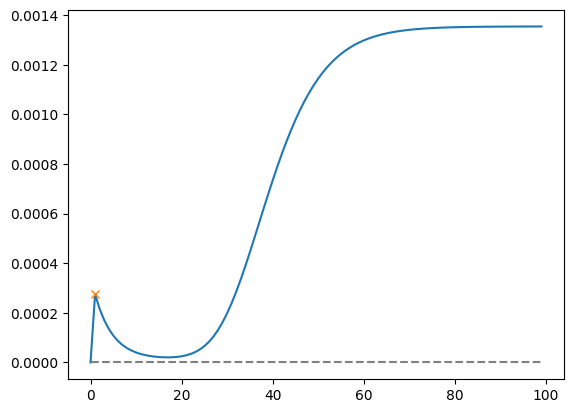

In [25]:
from scipy.signal import find_peaks
x = array
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [26]:
len(peaks)

1

# END

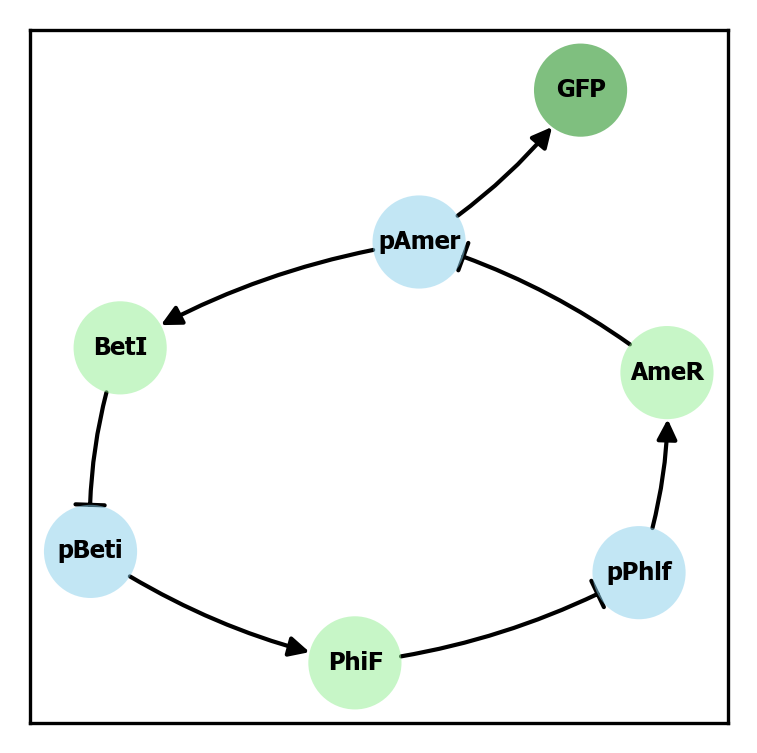

In [6]:
rep = lc.GeneticNetwork(vector=0)

rep.add_regulator([amer, beti, phif])

gfp_rep = lc.Reporter(name='GFP', degradation_rate=0, signal_id=0, color='green')
rep.add_reporter(gfp_rep)

amer_not_beti_gfp = lc.Hill1(name='pAmer', input=NOT_F1_AmeR[0], output=[NOT_E1_BetI[0], gfp_rep], alpha=[NOT_F1_AmeR[1]*1000,NOT_F1_AmeR[2]*1000], K=NOT_F1_AmeR[3]*1000, n=NOT_F1_AmeR[4] )
beti_not_phif = lc.Hill1(name='pBeti', input=NOT_E1_BetI[0], output=NOT_P3_PhlF[0], alpha=[NOT_E1_BetI[1]*1000,NOT_E1_BetI[2]*1000], K=NOT_E1_BetI[3]*1000, n=NOT_E1_BetI[4])
phlf_not_amer = lc.Hill1(name='pPhlf', input=NOT_P3_PhlF[0], output=NOT_F1_AmeR[0], alpha=[NOT_P3_PhlF[1]*1000,NOT_P3_PhlF[2]*1000], K=NOT_P3_PhlF[3]*1000, n=NOT_P3_PhlF[4])
rep.add_operator([amer_not_beti_gfp, beti_not_phif, phlf_not_amer])

plt.figure(figsize=(3,3), dpi=300)
rep.draw()

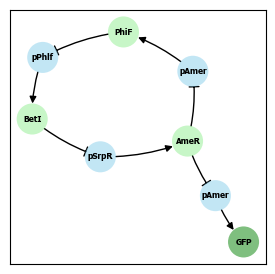

In [9]:
rep = lc.GeneticNetwork(vector=0)

rep.add_regulator([amer, beti, phif])

gfp_rep = lc.Reporter(name='GFP', degradation_rate=0, signal_id=0, color='green')
rep.add_reporter(gfp_rep)

amer_not_beti = lc.Hill1(name='pAmer', input=NOT_F1_AmeR[0], output=[NOT_P2_PhlF[0]], alpha=[NOT_F1_AmeR[1]*1000,NOT_F1_AmeR[2]*1000], K=NOT_F1_AmeR[3]*1000, n=NOT_F1_AmeR[4] )
beti_not_phif = lc.Hill1(name='pPhlf', input=NOT_P2_PhlF[0], output=NOT_E1_BetI[0], alpha=[NOT_P2_PhlF[1]*1000,NOT_P2_PhlF[2]*1000], K=NOT_P2_PhlF[3]*1000, n=NOT_P2_PhlF[4] )
phlf_not_amer = lc.Hill1(name='pSrpR', input=NOT_E1_BetI[0], output=NOT_F1_AmeR[0], alpha=[NOT_E1_BetI[1]*1000,NOT_E1_BetI[2]*1000], K=NOT_E1_BetI[3]*1000, n=NOT_E1_BetI[4])
phlf_not_gfp = lc.Hill1(name='pAmer', input=NOT_F1_AmeR[0], output=gfp_rep, alpha=[NOT_F1_AmeR[1]*1000,NOT_F1_AmeR[2]*1000], K=NOT_F1_AmeR[3]*1000, n=NOT_F1_AmeR[4])
rep.add_operator([amer_not_beti, beti_not_phif, phlf_not_amer, phlf_not_gfp])

plt.figure(figsize=(3.3,3.3), dpi=100)
rep.draw()

In [34]:
def growth_rate(t):
    return lc.gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 4)

metab = lc.SimulatedMetabolism('LOICA metab', biomass, growth_rate)

sample = lc.Sample(genetic_network=rep, 
                metabolism=metab,
                media=0,
                strain=0
               )
assay = lc.Assay([sample], 
              n_measurements=100, 
              interval=0.25,
              name='LOICA repressilator SEED2023',
              description='Simulated repressilator generated by LOICA',
              biomass_signal_id=0
             )
assay.run() #assay.run(nsr=1e-3)

100%|██████████| 100.0/100 [00:00<00:00, 156.12it/s]


<AxesSubplot:xlabel='Time'>

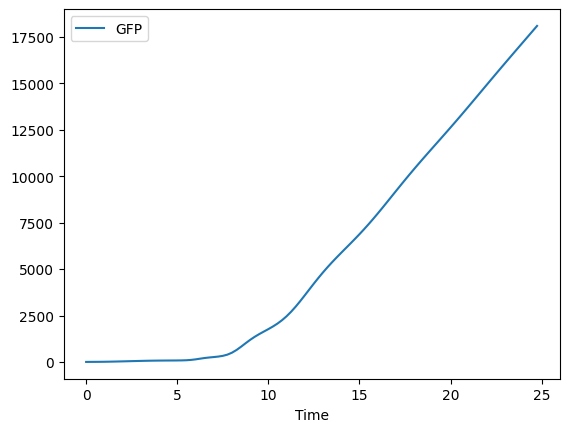

In [35]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='GFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{gfp_rep}')

In [51]:

NOT_F1_AmeR = ([amer, 3.468235830, 0.206243141, 0.034613400, 1.314222122])

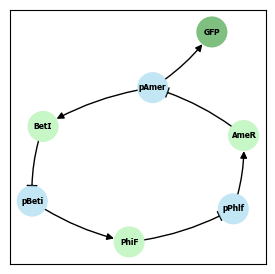

In [27]:
rep = lc.GeneticNetwork(vector=0)

rep.add_regulator([amer, beti, phif])

gfp_rep = lc.Reporter(name='GFP', degradation_rate=0, signal_id=0, color='green')
rep.add_reporter(gfp_rep)

amer_not_beti_gfp = lc.Hill1(name='pAmer', input=NOT_F1_AmeR[0], output=[NOT_E1_BetI[0], gfp_rep], alpha=[NOT_F1_AmeR[1]*1000,NOT_F1_AmeR[2]*1000], K=NOT_F1_AmeR[3]*1000, n=NOT_F1_AmeR[4] )
beti_not_phif = lc.Hill1(name='pBeti', input=NOT_E1_BetI[0], output=NOT_P3_PhlF[0], alpha=[NOT_E1_BetI[1]*1000,NOT_E1_BetI[2]*1000], K=NOT_E1_BetI[3]*1000, n=NOT_E1_BetI[4])
phlf_not_amer = lc.Hill1(name='pPhlf', input=NOT_P3_PhlF[0], output=NOT_F1_AmeR[0], alpha=[NOT_P3_PhlF[1]*1000,NOT_P3_PhlF[2]*1000], K=NOT_P3_PhlF[3]*1000, n=NOT_P3_PhlF[4])
rep.add_operator([amer_not_beti_gfp, beti_not_phif, phlf_not_amer])

plt.figure(figsize=(3.3,3.3), dpi=100)
rep.draw()

In [28]:
def growth_rate(t):
    return lc.gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 4)

metab = lc.SimulatedMetabolism('LOICA metab', biomass, growth_rate)

sample = lc.Sample(genetic_network=rep, 
                metabolism=metab,
                media=0,
                strain=0
               )
assay = lc.Assay([sample], 
              n_measurements=100, 
              interval=0.25,
              name='LOICA repressilator SEED2022',
              description='Simulated repressilator generated by LOICA',
              biomass_signal_id=0
             )
assay.run() #assay.run(nsr=1e-3)

100%|██████████| 100.0/100 [00:00<00:00, 160.58it/s]


<AxesSubplot:xlabel='Time'>

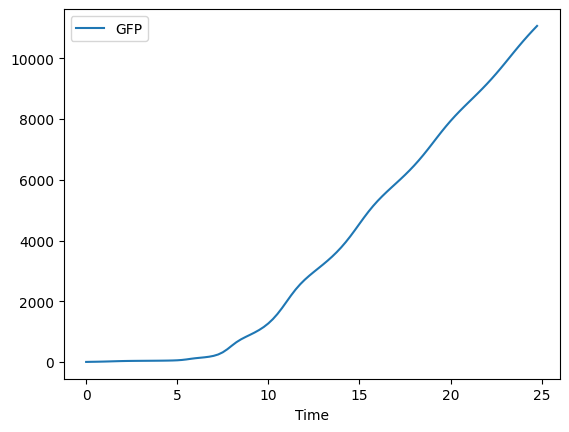

In [29]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='GFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{gfp_rep}')

In [42]:
NOT_F1_AmeR = [amer, 4.276875167, 0.289281104, 0.121548379, 1.542139516]
NOT_E1_BetI = [beti, 2.797014815, 0.040842627, 0.277844523, 2.880416695]


In [46]:
#Cello
NOT_amer_f1 = [amer, 3.8, 0.2, 0.09, 1.4]
NOT_beti_e1 = [beti, 3.8, 0.07, 0.41, 2.4]

In [55]:
perms = []
perm = permutations([NOT_F1_AmeR, 
                     NOT_F2_AmeR, 
                     NOT_N1_LmrA,
                     NOT_A1_AmtR,
                     NOT_H1_HlyIIR,
                     NOT_P1_PhlF,
                     NOT_P2_PhlF,
                     NOT_P3_PhlF,
                     NOT_S1_SrpR,
                     NOT_S2_SrpR,
                     NOT_S3_SrpR,
                     NOT_S4_SrpR,
                     NOT_E1_BetI,
                     NOT_B1_BM3R1,
                     NOT_B2_BM3R1,
                     NOT_B3_BM3R1,
                     NOT_C1_CymR,
                     NOT_V1_VanR],3)  #with a larger list then we can do ([NOT_1, NOT_2, NOT_3],3)
for i in list(perm):  
    perms.append(i) 

print(perms)

[([<loica.geneproduct.Regulator object at 0x7f8362c63ac0>, 3.46823583, 0.206243141, 0.0346134, 1.314222122], [<loica.geneproduct.Regulator object at 0x7f8362c63ac0>, 3.46823583, 0.206243141, 0.0346134, 1.314222122], [<loica.geneproduct.Regulator object at 0x7f8362c63a60>, 1.188165807, 0.077273193, 0.093521178, 1.754564179]), ([<loica.geneproduct.Regulator object at 0x7f8362c63ac0>, 3.46823583, 0.206243141, 0.0346134, 1.314222122], [<loica.geneproduct.Regulator object at 0x7f8362c63ac0>, 3.46823583, 0.206243141, 0.0346134, 1.314222122], [<loica.geneproduct.Regulator object at 0x7f8362c63af0>, 3.101389402, 0.035221608, 0.047427884, 1.656171138]), ([<loica.geneproduct.Regulator object at 0x7f8362c63ac0>, 3.46823583, 0.206243141, 0.0346134, 1.314222122], [<loica.geneproduct.Regulator object at 0x7f8362c63ac0>, 3.46823583, 0.206243141, 0.0346134, 1.314222122], [<loica.geneproduct.Regulator object at 0x7f8362c63a90>, 2.051723191, 0.004353486, 0.130693758, 2.588160165]), ([<loica.geneproduct.

In [10]:
amer = lc.Regulator(name='AmeR', degradation_rate=0)
phif = lc.Regulator(name='PhiF', degradation_rate=0)
srpr = lc.Regulator(name='SrpR', degradation_rate=0)

NOT_F1_AmeR = ([amer, 4.276875167, 0.289281104, 0.121548379, 1.542139516])
NOT_P1_PhlF = ([phif, 6.869075907, 0.004337295, 0.042126721, 3.804263913])
NOT_S1_SrpR = ([srpr, 1.365149567, 0.001354520, 0.016906016, 3.095316853])
NOT_S2_SrpR = ([srpr, 3.165616099, 0.002829301, 0.062531512, 2.655303675])
NOT_S3_SrpR = ([srpr, 3.051477031, 0.004054680, 0.087385601, 2.657349101])
NOT_S4_SrpR = ([srpr, 3.161638671, 0.004347046, 0.110327837, 2.654076554])

perms = []
perm = permutations([NOT_F1_AmeR, 
                     NOT_P2_PhlF,
                     NOT_S1_SrpR,
                     NOT_S2_SrpR,
                     NOT_S3_SrpR,
                    ],3)  #with a larger list then we can do ([NOT_1, NOT_2, NOT_3],3)
for i in list(perm):  
    perms.append(i) 

print(perms)

[([<loica.geneproduct.Regulator object at 0x7ff76fb0f0d0>, 4.276875167, 0.289281104, 0.121548379, 1.542139516], [<loica.geneproduct.Regulator object at 0x7ff76f395ee0>, 7.480185697, 0.006679767, 0.20384996, 4.481560106], [<loica.geneproduct.Regulator object at 0x7ff76fb0ffd0>, 1.365149567, 0.00135452, 0.016906016, 3.095316853]), ([<loica.geneproduct.Regulator object at 0x7ff76fb0f0d0>, 4.276875167, 0.289281104, 0.121548379, 1.542139516], [<loica.geneproduct.Regulator object at 0x7ff76f395ee0>, 7.480185697, 0.006679767, 0.20384996, 4.481560106], [<loica.geneproduct.Regulator object at 0x7ff76fb0ffd0>, 3.165616099, 0.002829301, 0.062531512, 2.655303675]), ([<loica.geneproduct.Regulator object at 0x7ff76fb0f0d0>, 4.276875167, 0.289281104, 0.121548379, 1.542139516], [<loica.geneproduct.Regulator object at 0x7ff76f395ee0>, 7.480185697, 0.006679767, 0.20384996, 4.481560106], [<loica.geneproduct.Regulator object at 0x7ff76fb0ffd0>, 3.051477031, 0.00405468, 0.087385601, 2.657349101]), ([<loica

In [11]:
def growth_rate(t):
    return lc.gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 4)

In [14]:
amer = lc.Regulator(name='AmeR', degradation_rate=0)
phif = lc.Regulator(name='PhiF', degradation_rate=0)
srpr = lc.Regulator(name='SrpR', degradation_rate=0)

perms = [[NOT_F1_AmeR, NOT_P2_PhlF, NOT_S1_SrpR], [NOT_F1_AmeR, NOT_P2_PhlF, NOT_S2_SrpR], [NOT_F1_AmeR, NOT_P2_PhlF, NOT_S3_SrpR]]
perms = [[NOT_F1_AmeR, NOT_P2_PhlF, NOT_S1_SrpR, 'Rep_Weak_RBS_plasmid', 'DNA1'], [NOT_F1_AmeR, NOT_P2_PhlF, NOT_S2_SrpR, 'Rep_Strong_RBS_plasmid', 'DNA3'], [NOT_F1_AmeR, NOT_P2_PhlF, NOT_S3_SrpR, 'Rep_Medium_RBS_plasmid', 'DNA2']]


In [15]:

gfp = lc.Reporter(name='GFP', degradation_rate=0, signal_id=gfps.id[0])

for op in perms:
  #GNC
  dna = flap.get('dna', name=f'{op[4]}')
  if len(dna)==0:
      dna = flap.create('dna', name=f'{op[4]}')
  vector = flap.get('vector', name=f'{op[3]}')    
  if len(vector)==0:
      vector = flap.create('vector', name=f'{op[3]}', dnas=dna.id[0])  

  rep = lc.GeneticNetwork(vector=vector.id[0]) #add a propoer and identifiable name
  rep.add_regulator([op[0][0],op[1][0], op[2][0]]) #add regulators
  rep.add_reporter(gfp)#[cfp, yfp, rfp]) 
  #build dynamics NOTs, 1000 times to do MEFL
  scalar = 500
  rep.add_operator([
                     lc.Hill1(input=op[0][0], output=op[1][0], alpha=[op[0][1]*scalar,op[0][2]]*scalar, K=op[0][3]*scalar, n=op[0][4]),
                     lc.Hill1(input=op[1][0], output=op[2][0], alpha=[op[1][1]*scalar,op[1][2]]*scalar, K=op[1][3]*scalar, n=op[1][4]),
                     lc.Hill1(input=op[2][0], output=op[0][0], alpha=[op[2][1]*scalar,op[2][2]]*scalar, K=op[2][3]*scalar, n=op[2][4])
                     ])
 
  #build reporter NOTs
  rep.add_operator([
                     lc.Hill1(input=op[0][0], output=gfp, alpha=[op[0][1]*scalar,op[0][2]]*scalar, K=op[0][3]*scalar, n=op[0][4]),
                     #lc.Hill1(input=op[1][0], output=yfp, alpha=[op[1][1]*scalar,op[1][2]]*scalar, K=op[1][3]*scalar, n=op[1][4]),
                     #lc.Hill1(input=op[2][0], output=rfp, alpha=[op[2][1]*scalar,op[2][2]]*scalar, K=op[2][3]*scalar, n=op[2][4])
                     ])
  
  #AS
  metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

  samples = []
  # Create 3 replicate samples for simulation
  for _ in range(3):
      sample = lc.Sample(genetic_network=rep, 
                      metabolism=metab,
                      media=media.id[0],
                      strain=strain.id[0])
      samples.append(sample)

  assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.25,
              name='Loica repressilator',
              description='Simulated repressilator generated by loica',
              biomass_signal_id=biomass_signal.id[0]
             )
  assay.run(stochastic=True)
  assay.upload(flap, study.id[0])


100%|█████████▉| 99.99999999999999/100 [00:09<00:00, 10.48it/s]
100%|█████████▉| 99.99999999999999/100 [00:11<00:00,  8.41it/s]
100%|█████████▉| 99.99999999999999/100 [00:08<00:00, 11.42it/s]
100%|█████████▉| 99.99999999999999/100 [00:05<00:00, 19.02it/s]
100%|█████████▉| 99.99999999999999/100 [00:07<00:00, 14.13it/s]
100%|█████████▉| 99.99999999999999/100 [00:05<00:00, 17.13it/s]


In [71]:
repgen_df

Measurement             Sample   Signal  Signal_id   Time
0        0.000000  rg_AmeR_PhiF_SrpR      GFP        0.0   0.00
1        0.010000  rg_AmeR_PhiF_SrpR  Biomass        0.0   0.00
2        5.130000  rg_AmeR_PhiF_SrpR      GFP        0.0   0.25
3        0.010000  rg_AmeR_PhiF_SrpR  Biomass        0.0   0.25
4       10.630000  rg_AmeR_PhiF_SrpR      GFP        0.0   0.50
...           ...                ...      ...        ...    ...
1795     0.999919  rg_AmeR_PhiF_SrpR  Biomass        0.0  24.25
1796  6430.552670  rg_AmeR_PhiF_SrpR      GFP        0.0  24.50
1797     0.999930  rg_AmeR_PhiF_SrpR  Biomass        0.0  24.50
1798  6692.598315  rg_AmeR_PhiF_SrpR      GFP        0.0  24.75
1799     0.999940  rg_AmeR_PhiF_SrpR  Biomass        0.0  24.75

[1800 rows x 5 columns]

In [68]:
repgen_df.to_csv('LOICARepressilators_GFP2.csv')

In [69]:
#Create the main df that will contain all the generated data
columns = {'Measurement':[], 'Sample':[], 'Signal':[], 'Signal_id':[], 'Time':[]}
repgen_df = pd.DataFrame(columns)

#build reporters
cfp = lc.Reporter(name='CFP', degradation_rate=1, signal_id=0)
yfp = lc.Reporter(name='YFP', degradation_rate=1, signal_id=0)
rfp = lc.Reporter(name='RFP', degradation_rate=1, signal_id=0)


for op in perms:
  #GNC
  rep = lc.GeneticNetwork(vector=0) #add a propoer and identifiable name
  rep.add_regulator([op[0][0],op[1][0], op[2][0]]) #add regulators
  rep.add_reporter([cfp, yfp, rfp]) 
  #build dynamics NOTs, 1000 times to do MEFL
  rep.add_operator([
                     lc.Hill1(input=op[0][0], output=op[1][0], alpha=[op[0][1]*1000,op[0][2]]*1000, K=op[0][3]*1000, n=op[0][4]),
                     lc.Hill1(input=op[1][0], output=op[2][0], alpha=[op[1][1]*1000,op[1][2]]*1000, K=op[1][3]*1000, n=op[1][4]),
                     lc.Hill1(input=op[2][0], output=op[0][0], alpha=[op[2][1]*1000,op[2][2]]*1000, K=op[2][3]*1000, n=op[2][4])
                     ])
 
  #build reporter NOTs
  rep.add_operator([
                     lc.Hill1(input=op[0][0], output=cfp, alpha=[op[0][1]*1000,op[0][2]]*1000, K=op[0][3]*1000, n=op[0][4]),
                     lc.Hill1(input=op[1][0], output=yfp, alpha=[op[1][1]*1000,op[1][2]]*1000, K=op[1][3]*1000, n=op[1][4]),
                     lc.Hill1(input=op[2][0], output=rfp, alpha=[op[2][1]*1000,op[2][2]]*1000, K=op[2][3]*1000, n=op[2][4])
                     ])
  
  #AS
  metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

  sample = lc.Sample(genetic_network=rep, 
                metabolism=metab,
                media=0,
                strain=0
               )
  assay = lc.Assay([sample], 
              n_measurements=100, 
              interval=0.25,
              name='Loica repressilator',
              description='Simulated repressilator generated by loica',
              biomass_signal_id=0
             )
  assay.run(stochastic=True)
  assay.measurements['Sample'] = f'rg_{op[0][0]}_{op[1][0]}_{op[2][0]}'
  repgen_df = repgen_df.append(assay.measurements, ignore_index=True)
  m = assay.measurements
  fig,ax = plt.subplots(1,1)
  m[m.Signal=='CFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{op[0][0]}_{op[0][1]}_cfp')
  m[m.Signal=='YFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{op[1][0]}_{op[1][1]}_yfp')
  m[m.Signal=='RFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{op[2][0]}_{op[2][1]}_rfp')
  plt.savefig(f'LOICARepressilator_{op[0][0]}_{op[1][0]}_{op[2][0]}.png', dpi=300)

100%|██████████| 100.0/100 [00:08<00:00, 12.38it/s]


IndexError: list index out of range

In [13]:
repgen_df.to_csv('repgen_MEFL.csv')

## Double inverters

### Cello characterized NOT

In [91]:
NOT_amer_f1 = [amer, 3.8, 0.2, 0.09, 1.4]
NOT_beti_e1 = [beti, 3.8, 0.07, 0.41, 2.4]

### Define metabolism

In [5]:
def growth_rate(t):
    return 1 #lc.gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return 1 #lc.gompertz(t, 0.01, 1, 1, 4)

### Receiver

## Receiver 1 alpha [0,10]

In [18]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec1=lc.Receiver(input=C4_supp, output=gfp, alpha=[0,10], K=0.01, n=2)
genetwork.add_operator(C4_Rec1)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec1.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()

100%|██████████| 100.0/100 [00:10<00:00,  9.45it/s]


<AxesSubplot:xlabel='Time'>

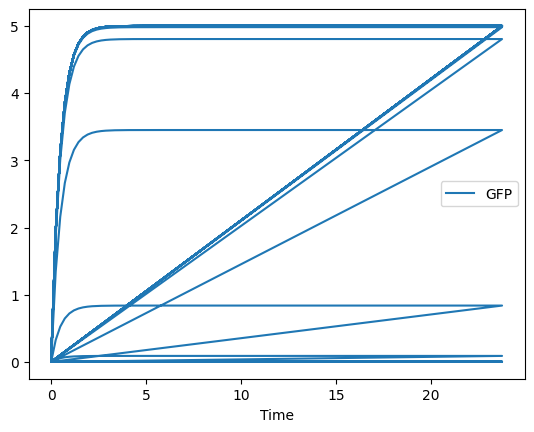

In [7]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='GFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{gfp}')

[Text(0.5, 1.0, 'Loica receiver, alpha=[0, 10]')]

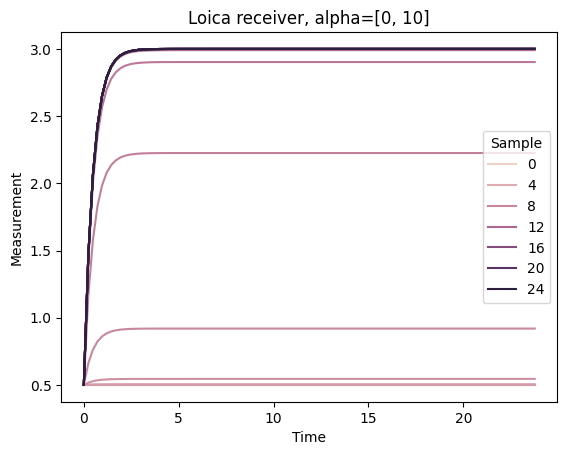

In [19]:
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

## Receiver 2 alpha [0,100]

In [20]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec2=lc.Receiver(input=C4_supp, output=gfp, alpha=[0,100], K=0.01, n=2)
genetwork.add_operator(C4_Rec2)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec2.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()

100%|██████████| 100.0/100 [00:10<00:00,  9.32it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[0, 100]')]

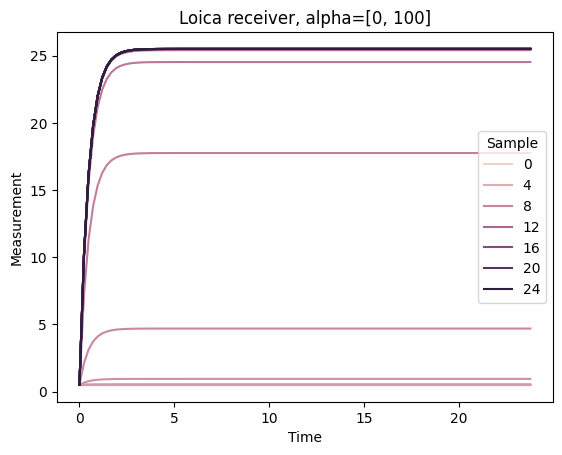

In [21]:
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

## Receiver 3 alpha [100,200]

In [22]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec3=lc.Receiver(input=C4_supp, output=gfp, alpha=[100,200], K=0.01, n=2)
genetwork.add_operator(C4_Rec3)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec3.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()

100%|██████████| 100.0/100 [00:11<00:00,  8.91it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[100, 200]')]

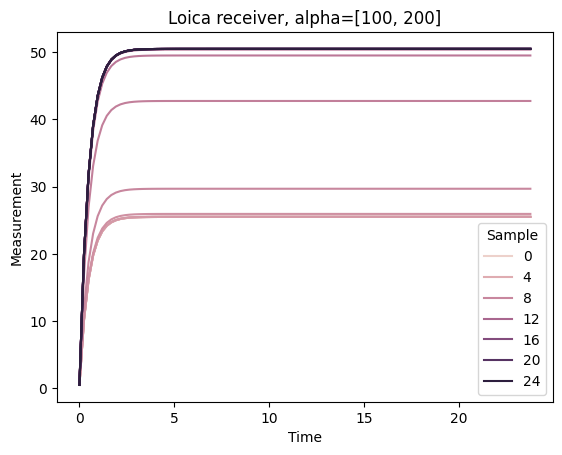

In [23]:
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

## Receiver 1 alpha [0,10] Gompertz

### Define metabolism

In [25]:
def growth_rate(t):
    return lc.gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 4)

100%|██████████| 100.0/100 [00:11<00:00,  8.67it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[0, 10]')]

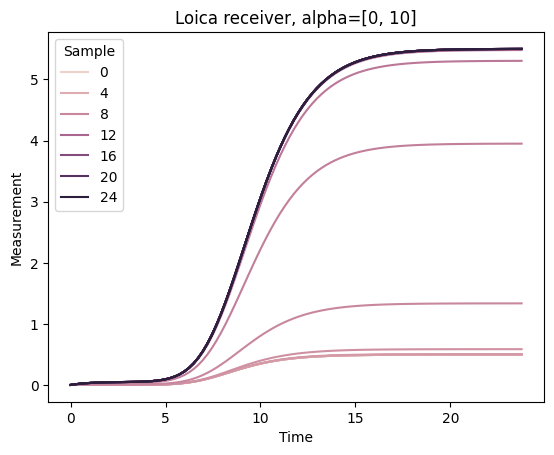

In [26]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec1=lc.Receiver(input=C4_supp, output=gfp, alpha=[0,10], K=0.01, n=2)
genetwork.add_operator(C4_Rec1)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec1.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

### rec not

100%|██████████| 100.0/100 [00:10<00:00,  9.50it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[0, 10]. not alpha=[4.276875167, 0.289281104]')]

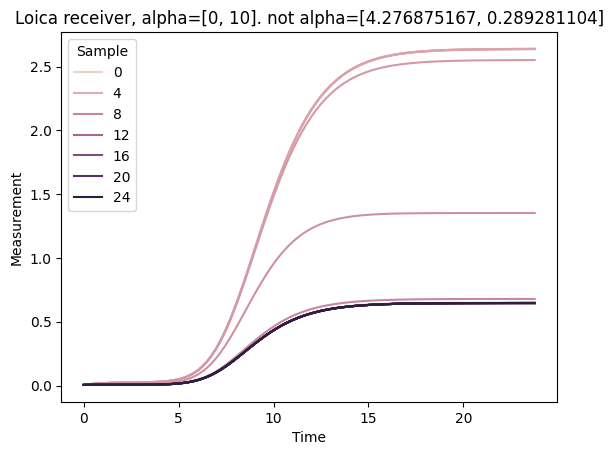

In [55]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec1=lc.Receiver(input=C4_supp, output=amer, alpha=[0,10], K=0.01, n=2)
genetwork.add_operator(C4_Rec1)
genetwork.add_regulator(amer)

Reg_amer_NOT_gfp=lc.Hill1(input=amer, output=gfp, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
genetwork.add_operator(Reg_amer_NOT_gfp)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec1.alpha}, not alpha={Reg_amer_NOT_gfp.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

### rec not not

100%|██████████| 100.0/100 [00:10<00:00,  9.46it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[0, 10]. not1 alpha=[4.276875167, 0.289281104], not2 alpha=[2.797014815, 0.040842627]')]

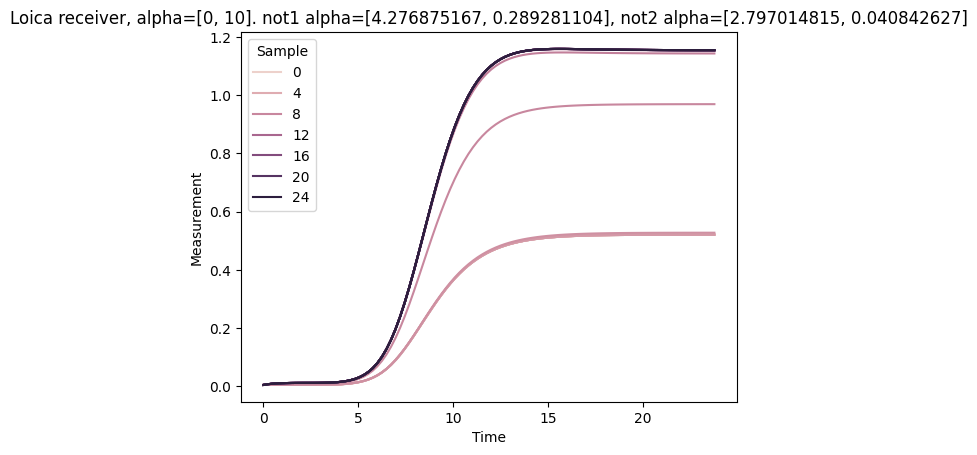

In [59]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec1=lc.Receiver(input=C4_supp, output=amer, alpha=[0,10], K=0.01, n=2)
genetwork.add_operator(C4_Rec1)
genetwork.add_regulator([amer, beti])

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=beti, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
Reg_beti_NOT_GFP=lc.Hill1(input=beti, output=gfp, alpha=[NOT_E1_BetI[1],NOT_E1_BetI[2]], K=NOT_E1_BetI[3], n=NOT_E1_BetI[4])
genetwork.add_operator([Reg_amer_NOT_beti, Reg_beti_NOT_GFP])

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec1.alpha}, not1 alpha={Reg_amer_NOT_beti.alpha}, not2 alpha={Reg_beti_NOT_GFP.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

## Receiver 2 alpha [0,100] Gompertz

100%|██████████| 100.0/100 [00:10<00:00,  9.16it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[0, 100]')]

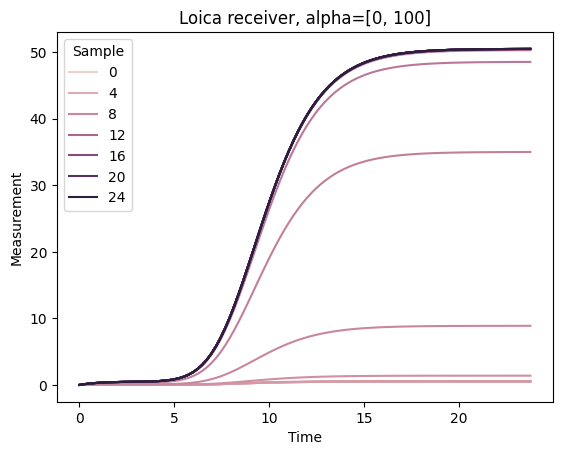

In [27]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec2=lc.Receiver(input=C4_supp, output=gfp, alpha=[0,100], K=0.01, n=2)
genetwork.add_operator(C4_Rec2)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec2.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

### rec not

100%|██████████| 100.0/100 [00:11<00:00,  8.76it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[0, 100]')]

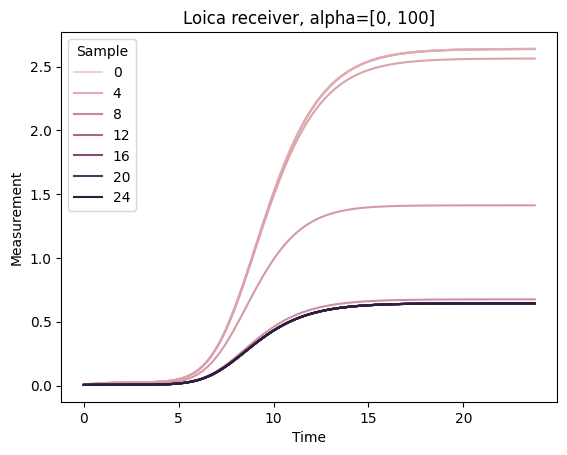

In [60]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec2=lc.Receiver(input=C4_supp, output=amer, alpha=[0,100], K=0.01, n=2)
genetwork.add_operator(C4_Rec2)
genetwork.add_regulator(amer)

Reg_amer_NOT_gfp=lc.Hill1(input=amer, output=gfp, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
genetwork.add_operator(Reg_amer_NOT_gfp)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec2.alpha}, not alpha={Reg_amer_NOT_gfp.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

### rec not not

100%|██████████| 100.0/100 [00:11<00:00,  8.43it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[0, 100], not1 alpha=[4.276875167, 0.289281104], not2 alpha=[2.797014815, 0.040842627]')]

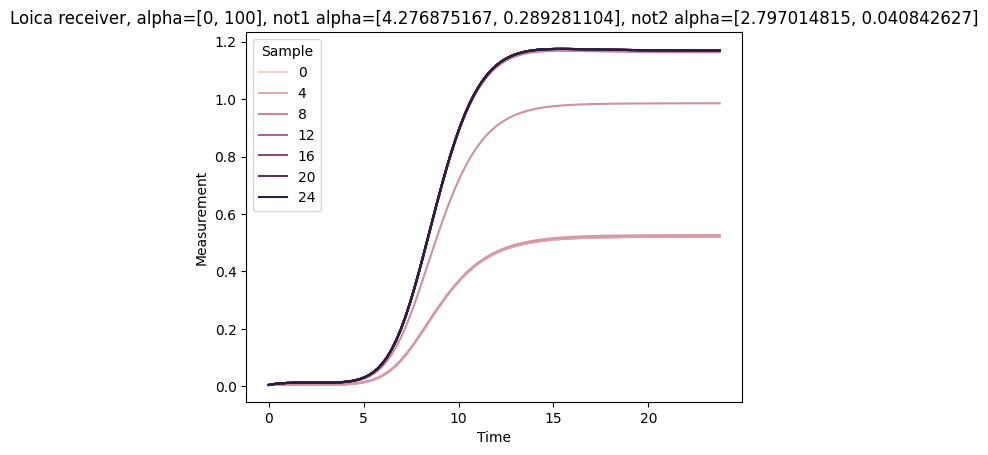

In [65]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec2=lc.Receiver(input=C4_supp, output=amer, alpha=[0,100], K=0.01, n=2)
genetwork.add_operator(C4_Rec2)
genetwork.add_regulator([amer, beti])

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=beti, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
Reg_beti_NOT_GFP=lc.Hill1(input=beti, output=gfp, alpha=[NOT_E1_BetI[1],NOT_E1_BetI[2]], K=NOT_E1_BetI[3], n=NOT_E1_BetI[4])
genetwork.add_operator([Reg_amer_NOT_beti, Reg_beti_NOT_GFP])

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec2.alpha}, not1 alpha={Reg_amer_NOT_beti.alpha}, not2 alpha={Reg_beti_NOT_GFP.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

## Receiver 3 alpha [100,200] Gompertz

100%|██████████| 100.0/100 [00:10<00:00,  9.28it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[100, 200]')]

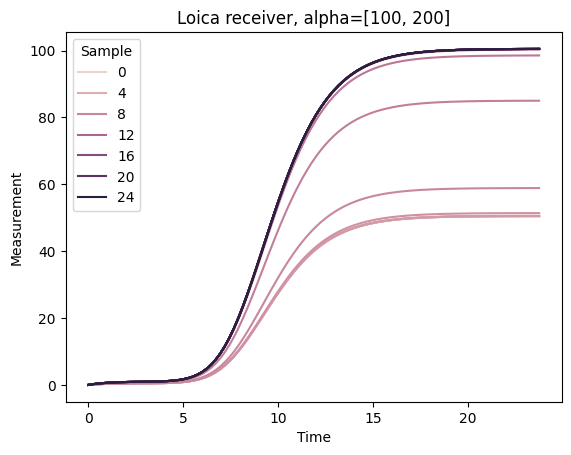

In [28]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec3=lc.Receiver(input=C4_supp, output=gfp, alpha=[100,200], K=0.01, n=2)
genetwork.add_operator(C4_Rec3)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec3.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

### rec not

100%|██████████| 100.0/100 [00:10<00:00,  9.51it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[100, 200], not alpha=[4.276875167, 0.289281104]')]

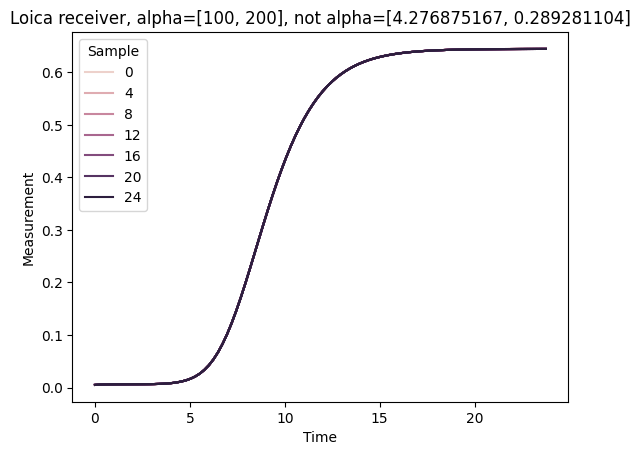

In [64]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec3=lc.Receiver(input=C4_supp, output=amer, alpha=[100,200], K=0.01, n=2)
genetwork.add_operator(C4_Rec3)
genetwork.add_regulator(amer)

Reg_amer_NOT_gfp=lc.Hill1(input=amer, output=gfp, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
genetwork.add_operator(Reg_amer_NOT_gfp)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec3.alpha}, not alpha={Reg_amer_NOT_gfp.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

### rec not not

100%|██████████| 100.0/100 [00:10<00:00,  9.28it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[100, 200], not1 alpha=[4.276875167, 0.289281104], not2 alpha=[2.797014815, 0.040842627]')]

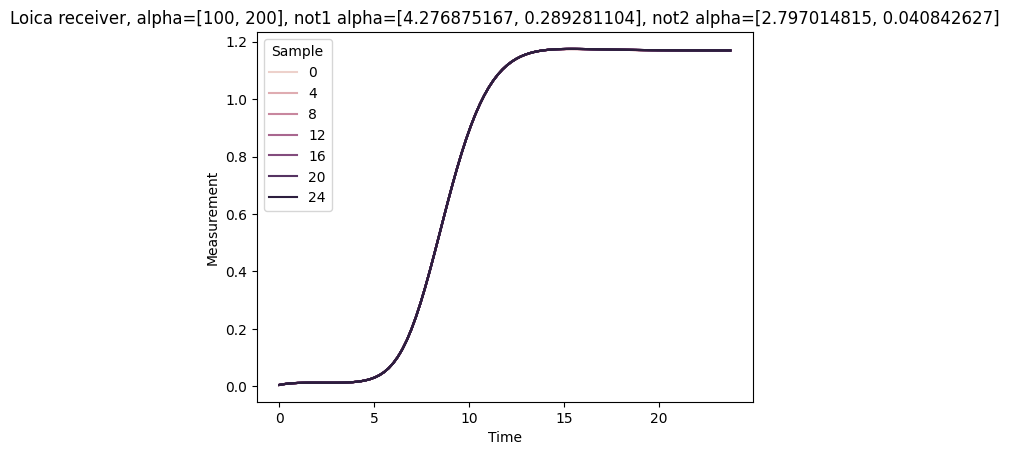

In [66]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec3=lc.Receiver(input=C4_supp, output=amer, alpha=[100,200], K=0.01, n=2)
genetwork.add_operator(C4_Rec3)
genetwork.add_regulator([amer, beti])

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=beti, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
Reg_beti_NOT_GFP=lc.Hill1(input=beti, output=gfp, alpha=[NOT_E1_BetI[1],NOT_E1_BetI[2]], K=NOT_E1_BetI[3], n=NOT_E1_BetI[4])
genetwork.add_operator([Reg_amer_NOT_beti, Reg_beti_NOT_GFP])

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec3.alpha}, not1 alpha={Reg_amer_NOT_beti.alpha}, not2 alpha={Reg_beti_NOT_GFP.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

BetI not GFP

100%|██████████| 100.0/100 [00:11<00:00,  8.79it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[100, 200], not1 alpha=[4.276875167, 0.289281104], not2 alpha=[2.797014815, 0.040842627]')]

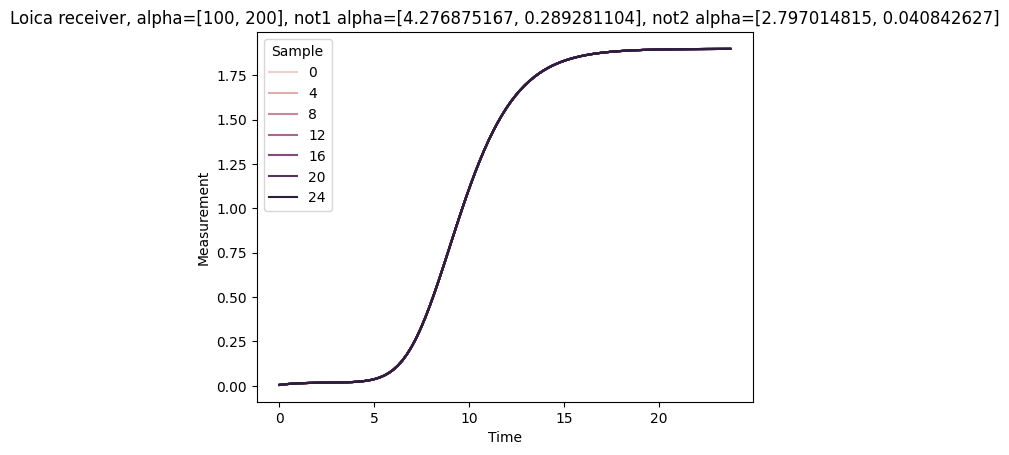

In [69]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)
genetwork.add_regulator([amer, beti])

Reg_beti_NOT_GFP=lc.Hill1(input=beti, output=gfp, alpha=[NOT_E1_BetI[1],NOT_E1_BetI[2]], K=NOT_E1_BetI[3], n=NOT_E1_BetI[4])
genetwork.add_operator(Reg_beti_NOT_GFP)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica receiver, alpha={C4_Rec3.alpha}, not1 alpha={Reg_amer_NOT_beti.alpha}, not2 alpha={Reg_beti_NOT_GFP.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

AmeR not GFP

100%|██████████| 100.0/100 [00:10<00:00,  9.74it/s]


[Text(0.5, 1.0, 'Loica receiver, alpha=[100, 200], not1 alpha=[4.276875167, 0.289281104], not2 alpha=[2.797014815, 0.040842627]')]

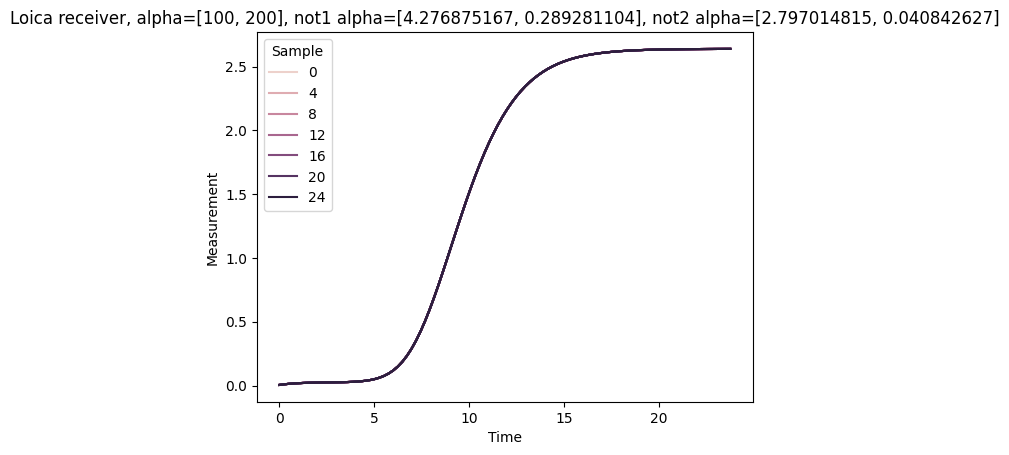

In [68]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)
genetwork.add_regulator([amer, beti])

Reg_amer_NOT_gfp=lc.Hill1(input=amer, output=gfp, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
genetwork.add_operator(Reg_amer_NOT_gfp)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica not1 alpha={Reg_amer_NOT_gfp.alpha}',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=assay.measurements, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

## Inverter AmeR NOT GFP

In [51]:
def growth_rate(t):
    return lc.gompertz_growth_rate(t, 0.01, 1, 1, 4)

def biomass(t):
    return lc.gompertz(t, 0.01, 1, 1, 4)

100%|██████████| 100.0/100 [00:10<00:00,  9.34it/s]


[Text(0.5, 1.0, 'Loica Inverter AmeR NOT BetI alpha=[3.8, 0.2]')]

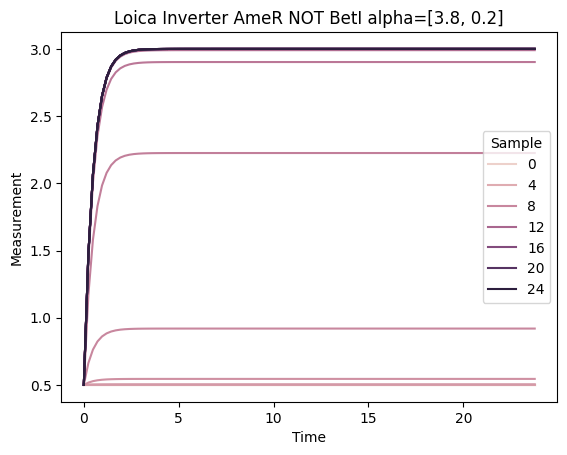

In [52]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
amer = lc.Regulator(name='AmeR', degradation_rate=1)
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec=lc.Receiver(input=C4_supp, output=amer, alpha=[0,10], K=0.01, n=2)
genetwork.add_operator(C4_Rec)
genetwork.add_regulator(amer)

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=gfp, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
genetwork.add_operator(Reg_amer_NOT_beti)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica Inverter AmeR NOT BetI alpha={Reg_amer_NOT_beti.alpha}',
              description='Simulated inverter generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=m, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

### Cello parameters

100%|██████████| 100.0/100 [00:10<00:00,  9.34it/s]


[Text(0.5, 1.0, 'Loica Inverter AmeR NOT BetI alpha=[3.8, 0.2]')]

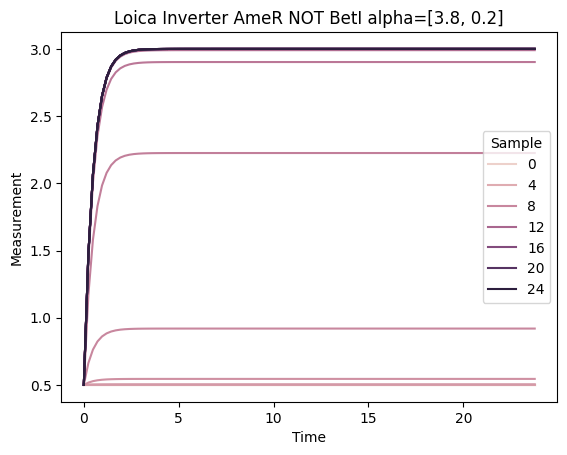

In [47]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
amer = lc.Regulator(name='AmeR', degradation_rate=1)
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec=lc.Receiver(input=C4_supp, output=amer, alpha=[0,10], K=0.01, n=2)
genetwork.add_operator(C4_Rec)
genetwork.add_regulator(amer)

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=gfp, alpha=[NOT_amer_f1[1],NOT_amer_f1[2]], K=NOT_amer_f1[3], n=NOT_amer_f1[4])
genetwork.add_operator(Reg_amer_NOT_beti)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica Inverter AmeR NOT BetI alpha={Reg_amer_NOT_beti.alpha}',
              description='Simulated inverter generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=m, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

<AxesSubplot:xlabel='Time', ylabel='Measurement'>

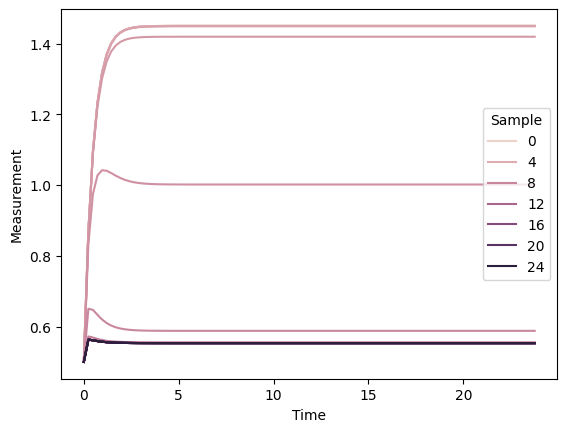

In [130]:
sns.lineplot(data=m, x='Time', y='Measurement', hue='Sample', errorbar=None)

100%|██████████| 100.0/100 [00:11<00:00,  8.42it/s]


[Text(0.5, 1.0, 'Loica Inverter AmeR NOT BetI alpha=[4.276875167, 0.289281104]')]

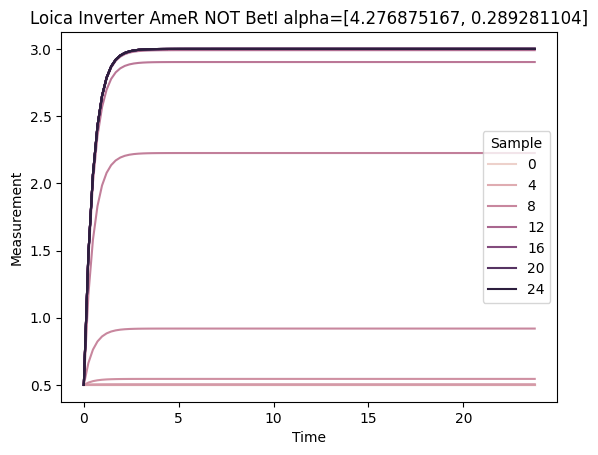

In [35]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
amer = lc.Regulator(name='AmeR', degradation_rate=1)
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec2=lc.Receiver(input=C4_supp, output=amer, alpha=[0,100], K=0.01, n=2)
genetwork.add_operator(C4_Rec2)
genetwork.add_regulator(amer)

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=gfp, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
genetwork.add_operator(Reg_amer_NOT_beti)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica Inverter AmeR NOT BetI alpha={Reg_amer_NOT_beti.alpha}',
              description='Simulated inverter generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=m, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

100%|██████████| 100.0/100 [00:10<00:00,  9.54it/s]


[Text(0.5, 1.0, 'Loica Inverter AmeR NOT BetI alpha=[4.276875167, 0.289281104]')]

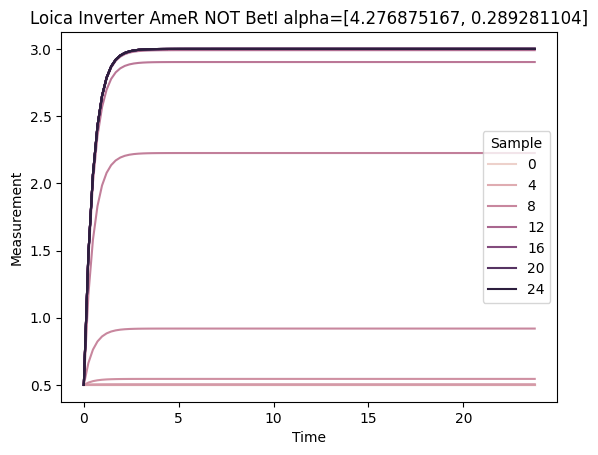

In [36]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
amer = lc.Regulator(name='AmeR', degradation_rate=1)
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec3=lc.Receiver(input=C4_supp, output=amer, alpha=[100,200], K=0.01, n=2)
genetwork.add_operator(C4_Rec3)
genetwork.add_regulator(amer)

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=gfp, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
genetwork.add_operator(Reg_amer_NOT_beti)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica Inverter AmeR NOT BetI alpha={Reg_amer_NOT_beti.alpha}',
              description='Simulated inverter generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=m, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

### Double inverter AmeR BetI

100%|██████████| 100.0/100 [00:10<00:00,  9.39it/s]


[Text(0.5, 1.0, 'Loica double inverter AmeR BetI')]

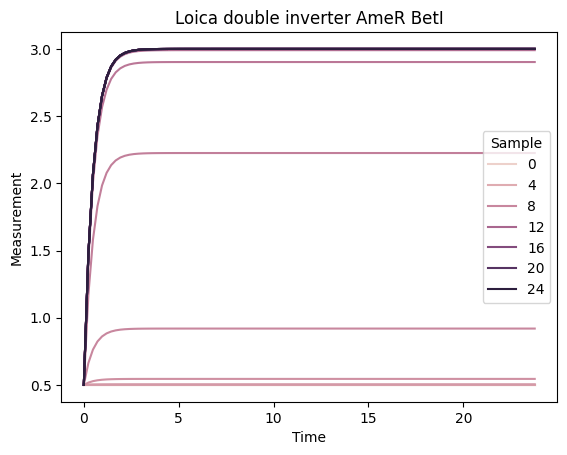

In [37]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec=lc.Receiver(input=C4_supp, output=amer, alpha=[0,10], K=0.01, n=2)
genetwork.add_operator(C4_Rec)
genetwork.add_regulator([amer, beti])

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=beti, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
Reg_beti_NOT_GFP=lc.Hill1(input=beti, output=gfp, alpha=[NOT_E1_BetI[1],NOT_E1_BetI[2]], K=NOT_E1_BetI[3], n=NOT_E1_BetI[4])
genetwork.add_operator([Reg_amer_NOT_beti, Reg_beti_NOT_GFP])

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name='Loica double inverter AmeR BetI',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=m, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

100%|██████████| 100.0/100 [00:12<00:00,  8.33it/s]


[Text(0.5, 1.0, 'Loica double inverter AmeR BetI')]

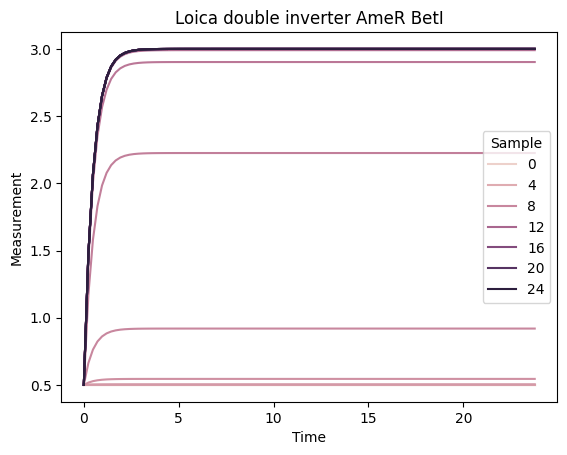

In [38]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec=lc.Receiver(input=C4_supp, output=amer, alpha=[0,100], K=0.01, n=2)
genetwork.add_operator(C4_Rec)
genetwork.add_regulator([amer, beti])

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=beti, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
Reg_beti_NOT_GFP=lc.Hill1(input=beti, output=gfp, alpha=[NOT_E1_BetI[1],NOT_E1_BetI[2]], K=NOT_E1_BetI[3], n=NOT_E1_BetI[4])
genetwork.add_operator([Reg_amer_NOT_beti, Reg_beti_NOT_GFP])

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name='Loica double inverter AmeR BetI',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=m, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

100%|██████████| 100.0/100 [00:10<00:00,  9.40it/s]


[Text(0.5, 1.0, 'Loica double inverter AmeR BetI')]

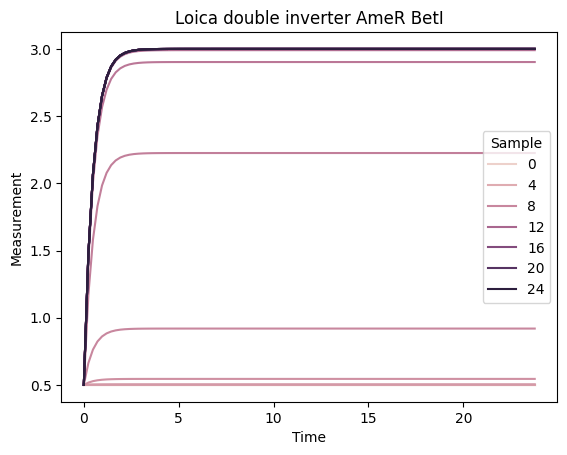

In [39]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec=lc.Receiver(input=C4_supp, output=amer, alpha=[1000,200], K=0.01, n=2)
genetwork.add_operator(C4_Rec)
genetwork.add_regulator([amer, beti])

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=beti, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
Reg_beti_NOT_GFP=lc.Hill1(input=beti, output=gfp, alpha=[NOT_E1_BetI[1],NOT_E1_BetI[2]], K=NOT_E1_BetI[3], n=NOT_E1_BetI[4])
genetwork.add_operator([Reg_amer_NOT_beti, Reg_beti_NOT_GFP])

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name='Loica double inverter AmeR BetI',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=m, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

<AxesSubplot:xlabel='Time'>

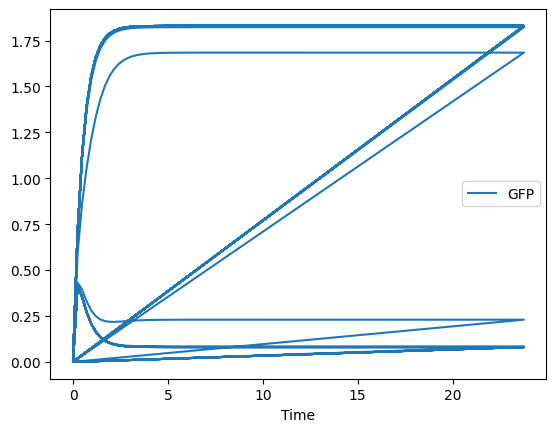

In [114]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='GFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{gfp}')

In [115]:
m

Time  Signal_id   Signal  Measurement  Sample
0      0.00        0.0      GFP     0.000000     0.0
1      0.00        0.0  Biomass     1.000000     0.0
2      0.24        0.0      GFP     0.415870     0.0
3      0.24        0.0  Biomass     1.000000     0.0
4      0.48        0.0      GFP     0.352673     0.0
...     ...        ...      ...          ...     ...
4995  23.28        0.0  Biomass     1.000000    24.0
4996  23.52        0.0      GFP     1.829430    24.0
4997  23.52        0.0  Biomass     1.000000    24.0
4998  23.76        0.0      GFP     1.829430    24.0
4999  23.76        0.0  Biomass     1.000000    24.0

[5000 rows x 5 columns]

<AxesSubplot:xlabel='Time', ylabel='Measurement'>

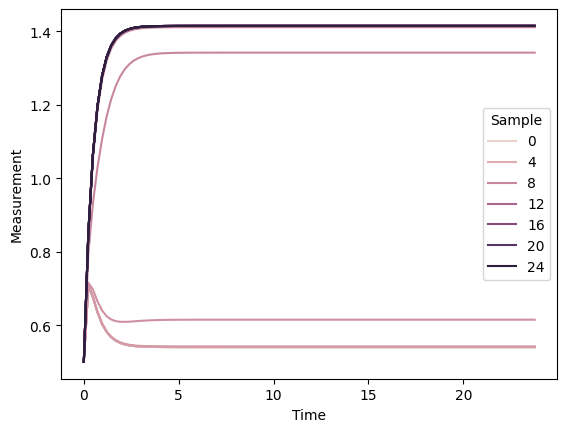

In [124]:
sns.lineplot(data=m, x='Time', y='Measurement', hue='Sample', errorbar=None)

## Double inverter 2

100%|██████████| 100.0/100 [00:10<00:00,  9.43it/s]


[Text(0.5, 1.0, 'Loica receiver1')]

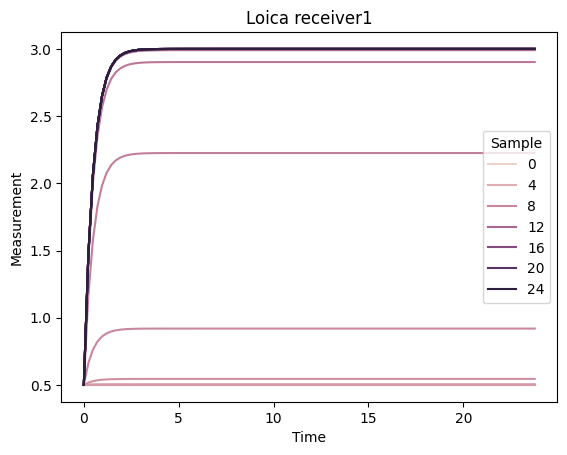

In [49]:
genetwork = lc.GeneticNetwork(vector=0)
C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

C4_Rec=lc.Receiver(input=C4_supp, output=amer, alpha=[0,10], K=0.01, n=2)
genetwork.add_operator(C4_Rec)
genetwork.add_regulator([amer, beti])

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=beti, alpha=[NOT_amer_f1[1],NOT_amer_f1[2]], K=NOT_amer_f1[3], n=NOT_amer_f1[4])
Reg_beti_NOT_GFP=lc.Hill1(input=beti, output=gfp, alpha=[NOT_beti_e1[1],NOT_beti_e1[2]], K=NOT_beti_e1[3], n=NOT_beti_e1[4])
genetwork.add_operator([Reg_amer_NOT_beti, Reg_beti_NOT_GFP])

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-6, 6, 24))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name='Loica receiver1',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()
sns.lineplot(data=m, x='Time', y='Measurement', hue='Sample', errorbar=None).set(title=assay.name)

In [34]:
genetwork = lc.GeneticNetwork(vector=0)

C4_Rec=lc.Receiver(input=C4_supp, output=gfp, alpha=[0.001,1000], K=1, n=2)
genetwork.add_operator(C4_Rec)

Reg_amer_NOT_beti=lc.Hill1(input=amer, output=beti, alpha=[NOT_F1_AmeR[1],NOT_F1_AmeR[2]], K=NOT_F1_AmeR[3], n=NOT_F1_AmeR[4])
Reg_beti_NOT_GFP=lc.Hill1(input=beti, output=amer, alpha=[NOT_E1_BetI[1],NOT_E1_BetI[2]], K=NOT_E1_BetI[3], n=NOT_E1_BetI[4])
genetwork.add_operator([Reg_amer_NOT_beti,Reg_beti_NOT_GFP])
genetwork.add_regulator([amer,beti])

C4_supp = lc.Supplement(name='C4')
gfp = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0)
genetwork.add_reporter(gfp)

metab = lc.SimulatedMetabolism('SimMetab',biomass, growth_rate)

# Create list of samples    
samples = []
concs = np.append(0, np.logspace(-3, 3, 12))
for conc in concs:
    for _ in range(1):
        sample = lc.Sample(genetic_network=genetwork, 
                    metabolism=metab,
                    media=0,
                    strain=0)
        # Add AHL to samples at given concentration
        sample.set_supplement(C4_supp, conc)
        samples.append(sample)

assay = lc.Assay(samples, 
              n_measurements=100, 
              interval=0.24,
              name='Loica receiver1',
              description='Simulated receiver generated by loica',
              biomass_signal_id=0
             )
assay.run()

100%|██████████| 100.0/100 [00:06<00:00, 16.34it/s]             


<AxesSubplot:xlabel='Time'>

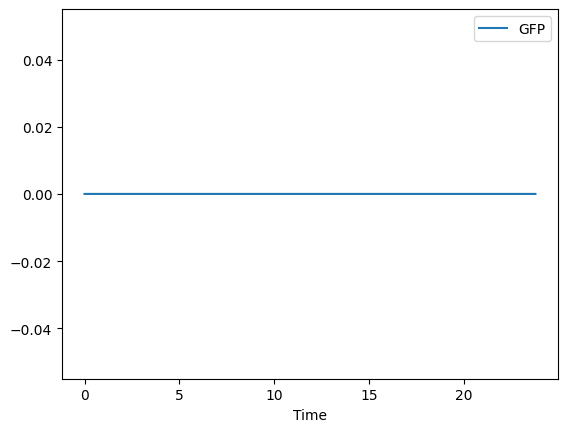

In [35]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='GFP'].plot(x='Time', y='Measurement', ax=ax, label=f'{gfp}')

In [ ]:
Reg_betl_NOT_phif=lc.Hill1(input=amtr, output=NOT_N1_LmrA, alpha=[op[2][1],op[2][2]]*1000, K=op[2][3]*1000, n=op[2][4])
Reg_phif_NOT_gfp=


In [ ]:
Reg_phif_NOT_amer=lc.Hill1(input=beti, output=NOT_E2_BetI, alpha=[op[3][1],op[3][2]]*1000, K=op[3][3]*1000, n=op[3][4])
Reg_amer_NOT_gfp=


In [ ]:
Reg_amtr_NOT_phif=lc.Hill1(input=phif, output=NOT_P2_PhlF, alpha=[op[4][1],op[4][2]]*1000, K=op[4][3]*1000, n=op[4][4])
Reg_phif_NOT_gfp=

In [ ]:
Reg_phif_NOT_betl=lc.Hill1(input=phif, output=NOT_P2_PhlF, alpha=[op[4][1],op[4][2]]*1000, K=op[4][3]*1000, n=op[4][4])
Reg_betl_NOT_GFP=

In [ ]:
Reg_betl_NOT_amtr=lc.Hill1(input=phif, output=NOT_P2_PhlF, alpha=[op[4][1],op[4][2]]*1000, K=op[4][3]*1000, n=op[4][4])
Reg_amtr_NOT_GFP=